## Бинарная классификация

In [72]:
import pandas as pd
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)     

### Скачиваем данные

In [73]:
df = pd.read_csv('../data/12-01.csv')
display(df)
df.columns

id_courier           date_group courier_type             status  is_back  pools_count  order_count  shift_num  delivery_time_shift  count_pool_shift  time_shift  returned_time  count_shift  order_counts  order_weight       N  hour  minute  weekday  time_since_last_tt  orders_last_hour  pools_last_hour        date
0           65709895  2024-12-08 10:15:00         Авто  Готов взять заказ        0            1            1        1.0             0.116667               1.0    0.116667            0.0          1.0           1.0      1.021333  8141.0    10      15        6                 0.0               0.0              0.0  2024-12-08
1           65709895  2024-12-08 10:30:00         Авто        Не работает        0            1            1        1.0             0.116667               1.0    0.116667            0.0          1.0           1.0      1.021333  8141.0    10      30        6                15.0               0.0              0.0  2024-12-08
2           65709895  2024-12-08 10:45:00         Авто        Не работает        0            1            1        1.0             0.116667               1.0    0.116667            0.0          1.0           1.0      1.021333  8141.0    10      45        6                15.0               0.0              0.0  2024-12-08
3           65709895  2024-12-08 11:00:00         Авто        Не работает        0            1            1        1.0             0.116667               1.0    0.116667            0.0          1.0           1.0      1.021333  8141.0    11       0        6                15.0               0.0              0.0  2024-12-08
4           65709895  2024-12-08 11:15:00         Авто        Не работает        0            1            1        1.0             0.116667               1.0    0.116667            0.0          1.0           1.0      1.021333  8141.0    11      15        6                15.0               0.0              0.0  2024-12-08
...              ...                  ...          ...                ...      ...          ...          ...        ...                  ...               ...         ...            ...          ...           ...           ...     ...   ...     ...      ...                 ...               ...              ...         ...
24652988  1799997361  2025-01-31 20:00:00         Авто        Не работает        0            2            6        1.0             1.500000               2.0    2.233333           44.0          1.0           6.0     13.618000  5562.0    20       0        4                15.0               0.0              0.0  2025-01-31
24652989  1799997361  2025-01-31 20:15:00         Авто        Не работает        0            2            6        1.0             1.500000               2.0    2.233333           44.0          1.0           6.0     13.618000  5562.0    20      15        4                15.0               0.0              0.0  2025-01-31
24652990  1799997361  2025-01-31 20:30:00         Авто        Не работает        0            2            6        1.0             1.500000               2.0    2.233333           44.0          1.0           6.0     13.618000  5562.0    20      30        4                15.0               0.0              0.0  2025-01-31
24652991  1799997361  2025-01-31 20:45:00         Авто        Не работает        0            2            6        1.0             1.500000               2.0    2.233333           44.0          1.0           6.0     13.618000  5562.0    20      45        4                15.0               0.0              0.0  2025-01-31
24652992  1799997361  2025-01-31 21:00:00         Авто        Не работает        0            2            6        1.0             1.500000               2.0    2.233333           44.0          1.0           6.0     13.618000  5562.0    21       0        4                15.0               0.0              0.0  2025-01-31

[24652993 rows x 23 columns]

Index(['id_courier', 'date_group', 'courier_type', 'status', 'is_back', 'pools_count', 'order_count', 'shift_num', 'delivery_time_shift', 'count_pool_shift', 'time_shift', 'returned_time', 'count_shift', 'order_counts', 'order_weight', 'N', 'hour', 'minute', 'weekday', 'time_since_last_tt', 'orders_last_hour', 'pools_last_hour', 'date'], dtype='object')

In [74]:
df['N'] = pd.to_numeric(df['N'], errors='coerce').fillna(0).astype(int)
df['N'].nunique()
ds_df=pd.read_csv('../data/DS_M_MO.csv')
ds_df['N'] = ds_df['N'].astype(int)  # или .astype(int)
df = df.merge(ds_df, on='N', how='left')
df.drop(columns='Unnamed: 0', inplace=True)
df.sort_values('date')
df=df[(~(df['name_TT'].isna())) & (df['region_tt']=='Москва')]
df=df.drop(columns=['time_since_last_tt', 'orders_last_hour', 'pools_last_hour'])
df = df.drop_duplicates()
display(df)


id_courier           date_group courier_type             status  is_back  pools_count  order_count  shift_num  delivery_time_shift  count_pool_shift  time_shift  returned_time  count_shift  order_counts  order_weight     N  hour  minute  weekday        date                name_TT  city_tt region_tt
60          94477626  2024-12-05 05:30:00         Авто  Готов взять заказ        0            1            4        1.0             6.444828         13.310345   13.296552      35.915461     1.068966      59.62069     17.965441  5981     5      30        3  2024-12-05  5981ДС_Лухмановская37  Москва     Москва
64          94477626  2024-12-05 05:45:00         Авто         Доставляет        0            1            4        1.0             6.444828         13.310345   13.296552      35.915461     1.068966      59.62069     17.965441  5981     5      45        3  2024-12-05  5981ДС_Лухмановская37  Москва     Москва
65          94477626  2024-12-05 06:00:00         Авто         Доставляет        1            1            4        1.0             6.444828         13.310345   13.296552      35.915461     1.068966      59.62069     17.965441  5981     6       0        3  2024-12-05  5981ДС_Лухмановская37  Москва     Москва
66          94477626  2024-12-05 06:15:00         Авто  Готов взять заказ        0            2           11        1.0             6.444828         13.310345   13.296552      35.915461     1.068966      59.62069     17.965441  5981     6      15        3  2024-12-05  5981ДС_Лухмановская37  Москва     Москва
73          94477626  2024-12-05 06:30:00         Авто         Доставляет        0            2           11        1.0             6.444828         13.310345   13.296552      35.915461     1.068966      59.62069     17.965441  5981     6      30        3  2024-12-05  5981ДС_Лухмановская37  Москва     Москва
...              ...                  ...          ...                ...      ...          ...          ...        ...                  ...               ...         ...            ...          ...           ...           ...   ...   ...     ...      ...         ...                    ...      ...       ...
24652988  1799997361  2025-01-31 20:00:00         Авто        Не работает        0            2            6        1.0             1.500000          2.000000    2.233333      44.000000     1.000000       6.00000     13.618000  5562    20       0        4  2025-01-31     5562ДС_1йДорожный1  Москва     Москва
24652989  1799997361  2025-01-31 20:15:00         Авто        Не работает        0            2            6        1.0             1.500000          2.000000    2.233333      44.000000     1.000000       6.00000     13.618000  5562    20      15        4  2025-01-31     5562ДС_1йДорожный1  Москва     Москва
24652990  1799997361  2025-01-31 20:30:00         Авто        Не работает        0            2            6        1.0             1.500000          2.000000    2.233333      44.000000     1.000000       6.00000     13.618000  5562    20      30        4  2025-01-31     5562ДС_1йДорожный1  Москва     Москва
24652991  1799997361  2025-01-31 20:45:00         Авто        Не работает        0            2            6        1.0             1.500000          2.000000    2.233333      44.000000     1.000000       6.00000     13.618000  5562    20      45        4  2025-01-31     5562ДС_1йДорожный1  Москва     Москва
24652992  1799997361  2025-01-31 21:00:00         Авто        Не работает        0            2            6        1.0             1.500000          2.000000    2.233333      44.000000     1.000000       6.00000     13.618000  5562    21       0        4  2025-01-31     5562ДС_1йДорожный1  Москва     Москва

[12685861 rows x 23 columns]

#### Добавим фичи

In [75]:

import pandas as pd
import numpy as np

# Предположим, ваш датафрейм называется df
# 1. Сортируем данные по ключам: id_courier и date_group
df = df.sort_values(["id_courier", "date_group"]).reset_index(drop=True)

# 2. Определяем список признаков, для которых хотим добавить лаги
# Смысл имеет брать те, что потенциально влияют на целевую переменную "is_back".
# "pools_count",

lag_features = [ "order_count", "time_shift", "order_weight"]

# 3. Добавляем лаговые признаки, например лаг на 1 и 2 шага назад
for col in lag_features:
    df[f"{col}_lag1"] = df.groupby("id_courier")[col].shift(1)
    #df[f"{col}_lag2"] = df.groupby("id_courier")[col].shift(2)
    #df[f"{col}_lag3"] = df.groupby("id_courier")[col].shift(3)
    # При прогнозе на час мы не сможем использовать shift(1,2,3) так как это вызовет переобучение
    # df[f"{col}_lag4"] = df.groupby("id_courier")[col].shift(4)


# 4. При желании можно добавить скользящее среднее (rolling mean)
#    например, среднее за 4 предыдущих шага, исключая текущий ( 1 час )
for col in lag_features:
    df[f"{col}_rolling1"] = (
        df.groupby("id_courier")[col]
        .shift(1)                # сдвигаем, чтобы не включать текущую строку
        .rolling(window=1)      # окно в 4 шага
        .mean()
        .reset_index(level=0, drop=True)  # rolling создает многоуровневый индекс
    )
df.fillna(0)
display(df)


id_courier           date_group courier_type             status  is_back  pools_count  order_count  shift_num  delivery_time_shift  count_pool_shift  time_shift  returned_time  count_shift  order_counts  order_weight     N  hour  minute  weekday        date                name_TT  city_tt region_tt  order_count_lag1  time_shift_lag1  order_weight_lag1  order_count_rolling1  time_shift_rolling1  order_weight_rolling1
0           94477626  2024-12-05 05:30:00         Авто  Готов взять заказ        0            1            4        1.0             6.444828         13.310345   13.296552      35.915461     1.068966      59.62069     17.965441  5981     5      30        3  2024-12-05  5981ДС_Лухмановская37  Москва     Москва               NaN              NaN                NaN                   NaN                  NaN                    NaN
1           94477626  2024-12-05 05:45:00         Авто         Доставляет        0            1            4        1.0             6.444828         13.310345   13.296552      35.915461     1.068966      59.62069     17.965441  5981     5      45        3  2024-12-05  5981ДС_Лухмановская37  Москва     Москва               4.0        13.296552          17.965441                   4.0            13.296552              17.965441
2           94477626  2024-12-05 06:00:00         Авто         Доставляет        1            1            4        1.0             6.444828         13.310345   13.296552      35.915461     1.068966      59.62069     17.965441  5981     6       0        3  2024-12-05  5981ДС_Лухмановская37  Москва     Москва               4.0        13.296552          17.965441                   4.0            13.296552              17.965441
3           94477626  2024-12-05 06:15:00         Авто  Готов взять заказ        0            2           11        1.0             6.444828         13.310345   13.296552      35.915461     1.068966      59.62069     17.965441  5981     6      15        3  2024-12-05  5981ДС_Лухмановская37  Москва     Москва               4.0        13.296552          17.965441                   4.0            13.296552              17.965441
4           94477626  2024-12-05 06:30:00         Авто         Доставляет        0            2           11        1.0             6.444828         13.310345   13.296552      35.915461     1.068966      59.62069     17.965441  5981     6      30        3  2024-12-05  5981ДС_Лухмановская37  Москва     Москва              11.0        13.296552          17.965441                  11.0            13.296552              17.965441
...              ...                  ...          ...                ...      ...          ...          ...        ...                  ...               ...         ...            ...          ...           ...           ...   ...   ...     ...      ...         ...                    ...      ...       ...               ...              ...                ...                   ...                  ...                    ...
12685856  1799997361  2025-01-31 20:00:00         Авто        Не работает        0            2            6        1.0             1.500000          2.000000    2.233333      44.000000     1.000000       6.00000     13.618000  5562    20       0        4  2025-01-31     5562ДС_1йДорожный1  Москва     Москва               6.0         2.233333          13.618000                   6.0             2.233333              13.618000
12685857  1799997361  2025-01-31 20:15:00         Авто        Не работает        0            2            6        1.0             1.500000          2.000000    2.233333      44.000000     1.000000       6.00000     13.618000  5562    20      15        4  2025-01-31     5562ДС_1йДорожный1  Москва     Москва               6.0         2.233333          13.618000                   6.0             2.233333              13.618000
12685858  1799997361  2025-01-31 20:30:00         Авто        Не работает        0            2            6        1.0             1.500000

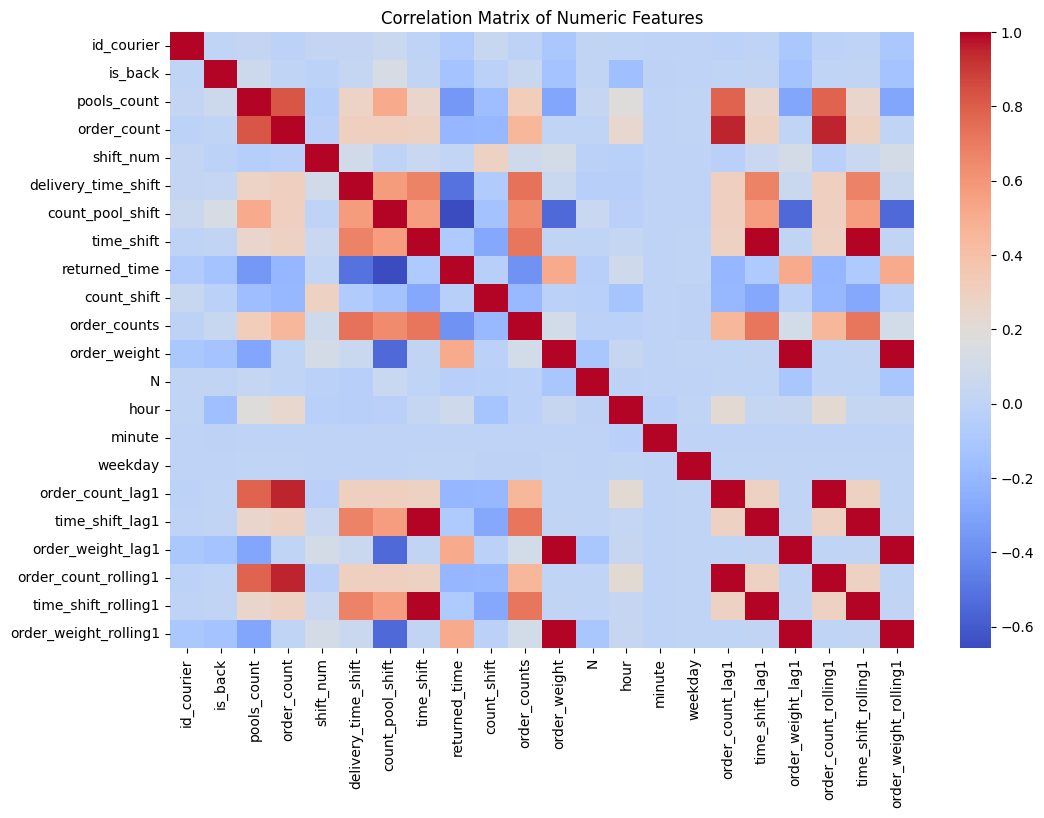

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Выбираем только числовые колонки (включая созданные лаговые)
numeric_cols = df.select_dtypes(include=[np.number]).columns

# 2. Считаем корреляцию
corr_matrix = df[numeric_cols].corr()

# 3. Визуализация
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


### Строим прогнозные модели 

#### Базовая часть для всех моделей 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score, 
    f1_score, precision_recall_curve, auc
)
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import optuna

# Разделение данных на тренировочную, валидационную и тестовую выборки
def first_step_for_models(df, features):
    df = df.sort_values(by="date_group")  # сортировка для удобства разделения временного ряда

    # 2. Определяем размеры выборок:
    train_size = int(len(df) * 0.7)
    val_size = int(len(df) * 0.1)

    # 3. "Ручное" разбиение на три части по индексам:
    X_train, X_val, X_test = (
        df.iloc[:train_size][features],
        df.iloc[train_size:train_size+val_size][features],
        df.iloc[train_size+val_size:][features]
    )
    y_train, y_val, y_test = (
        df.iloc[:train_size]['is_back'],
        df.iloc[train_size:train_size+val_size]['is_back'],
        df.iloc[train_size+val_size:]['is_back']
    )

    # 4. Оптимизация типов данных
    def optimize_dfframe(df):
        for col in df.select_dtypes(include=['int64', 'float64']).columns:
            df[col] = df[col].astype(np.float32 if df[col].dtype == 'float64' else np.int32)
        return df
    X_train, X_val, X_test = map(optimize_dfframe, [X_train, X_val, X_test])


    # 5. Категориальные и числовые признаки
    categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

    # 6. Преобразование категориальных признаков в "category"
    for col in categorical_features:
        X_train[col] = X_train[col].astype('category')
        X_val[col] = X_val[col].astype('category')
        X_test[col] = X_test[col].astype('category')

    # 7. Вычисление `scale_pos_weight` для дисбаланса классов
    class_counts = y_train.value_counts()
    scale_pos_weight = class_counts[0] / class_counts[1]
    print(class_counts)
    print(scale_pos_weight)


    return X_train, X_test, X_val, y_train, y_test, y_val, categorical_features, scale_pos_weight


# Оценка модели и сохранение результатов
# Заменяем append на pd.concat
def evaluate_model(model, X_test, y_test, model_name, results_df=None):
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]  # Вероятности положительного класса

    # Вычисление метрик
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_proba)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Рассчитываем Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc = auc(recall, precision)

    # Строим PR-кривую
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.4f})')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} - Precision-Recall (PR) Curve")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

    # Если DataFrame не передан, создаем его
    if results_df is None:
        results_df = pd.DataFrame(columns=["Model", "Accuracy", "ROC AUC", "Test Precision", "Recall", "F1", "PR AUC"])

    # Добавляем результаты модели в DataFrame с использованием pd.concat
    new_row = pd.DataFrame({
        "Model": [model_name],
        "Accuracy": [test_accuracy],
        "ROC AUC": [test_roc_auc],
        "Test Precision": [test_precision],
        "Recall": [test_recall],
        "F1": [test_f1],
        "PR AUC": [pr_auc]
    })

    results_df = pd.concat([results_df, new_row], ignore_index=True)

    return results_df


#### Логистическая Регрессия и деревья решений

In [78]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

def base_LogReg(X_train, X_test, y_train, y_test, categorical_features, results_df=None):
    """
    Базовая модель логистической регрессии для бинарной классификации
    с использованием One-Hot Encoding для категориальных признаков.
    """
    # Кодируем категориальные признаки в тренировочной выборке
    X_train_enc = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)

    # Аналогично кодируем тестовую выборку
    X_test_enc = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

    # Выровняем столбцы (в тесте могут отсутствовать некоторые категории из train и наоборот)
    X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1)
    # Заполним пропущенные столбцы в X_test_enc нулями (категория не встречалась)
    X_test_enc = X_test_enc.fillna(0)

    model = LogisticRegression(
        max_iter=1000,  # увеличенный лимит итераций для сходимости
        random_state=42,
        class_weight="balanced"
    )
    model.fit(X_train_enc, y_train)

    # Оцениваем модель
    results_df = evaluate_model(model, X_test_enc, y_test, "Base_LogisticRegression", results_df)

    
    return results_df




def base_DecisionTree(X_train, X_test, y_train, y_test, categorical_features, results_df=None):
    """
    Базовая модель решающего дерева для бинарной классификации.
    Если X_train/X_test содержат строковые признаки, их тоже нужно 
    кодировать или преобразовать, иначе модель не сможет обучиться.
    """
    # Кодируем категориальные признаки в тренировочной выборке
    X_train_enc = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
    # Аналогично кодируем тестовую выборку
    X_test_enc = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)
    # Выровняем столбцы (в тесте могут отсутствовать некоторые категории из train и наоборот)
    X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1)
    # Заполним пропущенные столбцы в X_test_enc нулями (категория не встречалась)
    X_test_enc = X_test_enc.fillna(0)
    
    model = DecisionTreeClassifier(
        max_depth=None,
        random_state=42,
         class_weight="balanced"
    )
    # Обратите внимание: здесь обучаемся на X_train_enc, а не на X_train
    model.fit(X_train_enc, y_train)

    # Аналогично оцениваем на X_test_enc
    results_df = evaluate_model(model, X_test_enc, y_test, "Base_DecisionTree", results_df)
    return results_df



import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

def base_LogReg_pipeline(X_train, X_test, y_train, y_test, categorical_features, results_df=None):
    """
    Базовая модель логистической регрессии для бинарной классификации
    с использованием ColumnTransformer и Pipeline и учётом дисбаланса классов.
    """
    numeric_features = list(set(X_train.columns) - set(categorical_features))

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'
    )

    model = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', LogisticRegression(
            max_iter=1000, 
            random_state=42,
            class_weight="balanced"  # <-- указываем здесь
        ))
    ])

    model.fit(X_train, y_train)
    results_df = evaluate_model(model, X_test, y_test, "Base_LogReg_pipeline", results_df)
    return results_df


def base_DecisionTree_pipeline(X_train, X_test, y_train, y_test, categorical_features, results_df=None):
    """
    Базовая модель решающего дерева для бинарной классификации
    с использованием ColumnTransformer и Pipeline и учётом дисбаланса классов.
    """
    numeric_features = list(set(X_train.columns) - set(categorical_features))

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'
    )

    model = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', DecisionTreeClassifier(
            random_state=42,
            class_weight="balanced"  # <-- и здесь
        ))
    ])

    model.fit(X_train, y_train)
    results_df = evaluate_model(model, X_test, y_test, "Base_DecisionTree_pipeline", results_df)
    return results_df


#### CatBoostClassifier

In [ ]:
# Базовая модель CatBoost
def base_CatBoost(X_train, X_test, y_train, y_test, categorical_features,scale_pos_weight, results_df=None):
    model = CatBoostClassifier(
        iterations=1000, depth=6, learning_rate=0.1, cat_features=categorical_features, verbose=100, scale_pos_weight=scale_pos_weight
    )

    model.fit(X_train, y_train)

    # Используем функцию для оценки модели
    results_df = evaluate_model(model, X_test, y_test, "Base_CatBoost", results_df)

    return results_df


# Модель CatBoost с подбором гиперпараметров через Optuna
def hard_CatBoost(X_train, X_test, y_train, y_test, categorical_features, scale_pos_weight, X_val, y_val, results_df=None):
    def objective(trial):
        params = {
            "iterations": trial.suggest_int("iterations", 300, 750, step=150),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
            "depth": trial.suggest_int("depth", 4, 6),
            "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 5),
            "border_count": trial.suggest_int("border_count", 32, 64),
            "random_strength": trial.suggest_float("random_strength", 0.1, 1.5),
            "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 0.8),
            "subsample": trial.suggest_float("subsample", 0.7, 1.0),
            "verbose": 0,
            "random_seed": 42,
            "cat_features": categorical_features,
            "thread_count": -1,
            "scale_pos_weight": scale_pos_weight
        }

        X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train, random_state=42)
        model = CatBoostClassifier(**params)
        model.fit(X_train_sample, y_train_sample, eval_set=(X_val, y_val), early_stopping_rounds=20, use_best_model=False)
        y_val_proba = model.predict_proba(X_val)[:, 1]
        return roc_auc_score(y_val, y_val_proba)

    # Запуск Optuna
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=1, n_jobs=1)

    best_params = study.best_params
    best_params.update({
        "cat_features": categorical_features,
        "scale_pos_weight": scale_pos_weight
    })

    model = CatBoostClassifier(**best_params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, use_best_model=True)

    # Используем функцию для оценки модели
    results_df = evaluate_model(model, X_test, y_test, "Hard_CatBoost", results_df)

    return results_df

#### LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def base_LGBM(X_train, X_test, y_train, y_test, categorical_features, results_df=None):
    # Инициализация базового классификатора LGBM
    model = LGBMClassifier(objective="binary", class_weight="balanced", random_state=42)

    # Гиперпараметры для GridSearchCV
    param_grid = {
        "learning_rate": [0.05, 0.1],
        "n_estimators": [100, 500],
        "max_depth": [5, 10, -1],
        "num_leaves": [31, 50]
    }

    # Настройка GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=2, scoring="roc_auc", verbose=1, n_jobs=1)

    # Обучение модели с подбором гиперпараметров
    grid_search.fit(X_train, y_train, categorical_feature=categorical_features)

    # Лучшие параметры и оценка модели
    best_model = grid_search.best_estimator_
    y_test_pred = best_model.predict(X_test)
    y_test_proba = best_model.predict_proba(X_test)[:, 1]

    # Оценка модели
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_proba)

    print(f"LightGBM - Accuracy: {test_accuracy:.4f}, ROC AUC: {test_roc_auc:.4f}")
    print(f"Best Hyperparameters: {grid_search.best_params_}")

    # Добавление результатов в DataFrame
    results_df = evaluate_model(best_model, X_test, y_test, model_name="LightGBM", results_df=results_df)

    return results_df



def hard_LGBM(X_train, X_test, y_train, y_test, categorical_features, scale_pos_weight, X_val, y_val, results_df=None):
    
    # Определение пространства гиперпараметров для Hyperopt
    param_space = {
        "num_leaves": hp.quniform("num_leaves", 16, 64, 1),
        "max_depth": hp.quniform("max_depth", 4, 10, 1),
        "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(0.2)),
        "n_estimators": hp.quniform("n_estimators", 300, 750, 50),
        "min_child_weight": hp.loguniform("min_child_weight", np.log(0.001), np.log(10)),
        "colsample_bytree": hp.uniform("colsample_bytree", 0.6, 1.0),
        "subsample": hp.uniform("subsample", 0.7, 1.0),
        "lambda_l1": hp.uniform("lambda_l1", 0.0, 5.0),
        "lambda_l2": hp.uniform("lambda_l2", 0.0, 5.0),
    }

    # Определение функции для поиска гиперпараметров
    def objective(params):
        params["num_leaves"] = int(params["num_leaves"])
        params["max_depth"] = int(params["max_depth"])
        params["n_estimators"] = int(params["n_estimators"])
        params["scale_pos_weight"] = scale_pos_weight

        # Стратифицированное уменьшение данных для гиперпараметров
        X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train, random_state=42)
        X_val_sample, _, y_val_sample, _ = train_test_split(X_val, y_val, test_size=0.7, stratify=y_val, random_state=42)

        # Модель LGBM
        model = LGBMClassifier(**params, objective="binary", metric="auc", random_state=42, verbosity=-1)
        
        # Обучение модели с ранней остановкой
        model.fit(X_train_sample, y_train_sample, eval_set=[(X_val_sample, y_val_sample)], early_stopping_rounds=20, verbose=False)

        y_val_proba = model.predict_proba(X_val_sample)[:, 1]
        roc_auc = roc_auc_score(y_val_sample, y_val_proba)

        return {"loss": -roc_auc, "status": STATUS_OK}

    # Запуск Hyperopt
    trials = Trials()
    best_params = fmin(fn=objective, space=param_space, algo=tpe.suggest, max_evals=10, trials=trials)

    # Преобразование числовых гиперпараметров в целые числа
    best_params["num_leaves"] = int(best_params["num_leaves"])
    best_params["max_depth"] = int(best_params["max_depth"])
    best_params["n_estimators"] = int(best_params["n_estimators"])
    best_params["scale_pos_weight"] = scale_pos_weight

    # Обучение модели с лучшими гиперпараметрами
    best_params.update({"objective": "binary", "metric": "auc", "random_state": 42, "verbosity": -1})
    model = LGBMClassifier(**best_params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=20, verbose=False)

    # Оценка модели
    results_df = evaluate_model(model, X_test, y_test, model_name="LightGBM (Hyperopt)", results_df=results_df)

    return results_df


#### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score

def base_XGBoost(X_train, X_test, y_train, y_test, categorical_features,scale_pos_weight, results_df=None):
    # Инициализация базового классификатора XGBoost
    model = xgb.XGBClassifier(
        objective="binary:logistic", 
        eval_metric="auc", 
        random_state=42,
        use_label_encoder=False, 
        enable_categorical=True,  # Обработка категориальных признаков
        max_depth=6,
        learning_rate=0.1,
        n_estimators=100,
        verbosity=0,
        scale_pos_weight=scale_pos_weight
    )

    # Обучение модели на тренировочных данных
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)],  verbose=False)

    # Оценка модели на тестовых данных
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Вычисление метрик
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_proba)

    print(f"XGBoost - Accuracy: {test_accuracy:.4f}, ROC AUC: {test_roc_auc:.4f}")
    
    # Добавление результатов в DataFrame
    results_df = evaluate_model(model, X_test, y_test, model_name="XGBoost", results_df=results_df)

    return results_df

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

def hard_XGBoost(X_train, X_test, y_train, y_test, categorical_features, scale_pos_weight, X_val, y_val, results_df=None):
    
    # Определение пространства гиперпараметров для Hyperopt
    param_space = {
        "max_depth": hp.quniform("max_depth", 3, 10, 1),
        "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(0.2)),
        "n_estimators": hp.quniform("n_estimators", 300, 750, 50),
        "min_child_weight": hp.loguniform("min_child_weight", np.log(0.001), np.log(10)),
        "colsample_bytree": hp.uniform("colsample_bytree", 0.6, 1.0),
        "subsample": hp.uniform("subsample", 0.7, 1.0),
        "gamma": hp.uniform("gamma", 0.0, 5.0),
        "reg_alpha": hp.uniform("reg_alpha", 0.0, 5.0),
        "reg_lambda": hp.uniform("reg_lambda", 0.0, 5.0),
    }

    # Определение функции для поиска гиперпараметров
    def objective(params):
        params["max_depth"] = int(params["max_depth"])
        params["n_estimators"] = int(params["n_estimators"])
        params["scale_pos_weight"] = scale_pos_weight

        # Стратифицированное уменьшение данных для гиперпараметров
        X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train, random_state=42)
        X_val_sample, _, y_val_sample, _ = train_test_split(X_val, y_val, test_size=0.7, stratify=y_val, random_state=42)

        # Модель XGBoost
        model = xgb.XGBClassifier(
            **params, 
            objective="binary:logistic", 
            eval_metric="auc", 
            use_label_encoder=False,
            enable_categorical=True, 
            random_state=42,
            verbosity=0
        )
        
        # Обучение модели с ранней остановкой
        model.fit(
            X_train_sample, 
            y_train_sample, 
            eval_set=[(X_val_sample, y_val_sample)], 
            verbose=False
        )

        y_val_proba = model.predict_proba(X_val_sample)[:, 1]
        roc_auc = roc_auc_score(y_val_sample, y_val_proba)

        return {"loss": -roc_auc, "status": STATUS_OK}  # Минус, потому что Hyperopt минимизирует loss

    # Запуск Hyperopt
    trials = Trials()
    best_params = fmin(fn=objective, space=param_space, algo=tpe.suggest, max_evals=10, trials=trials)

    # Преобразование числовых гиперпараметров в целые числа
    best_params["max_depth"] = int(best_params["max_depth"])
    best_params["n_estimators"] = int(best_params["n_estimators"])
    best_params["scale_pos_weight"] = scale_pos_weight

    # Обучение модели с лучшими гиперпараметрами
    best_params.update({
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "random_state": 42,
        "verbosity": 0,
        "enable_categorical": True
    })

    model = xgb.XGBClassifier(**best_params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

    # Оценка модели
    results_df = evaluate_model(model, X_test, y_test, model_name="XGBoost (Hyperopt)", results_df=results_df)

    return results_df


### Итоговый результат

[5981 5921 4755 7901 7164 6038 4835 7498 8578 8443 8317 6694 4795 5469
 7315 8110 8065 5656 6859 5814 8781 4801 7406 7450 5485 6783 5562 5017
 8122 4900 5818 8411 8877 4799 8175 5689 8222 5531 4827 5005 5508 6571
 7626 5834 5563 5355 4786 7266 8320 6850 6097 7649 7394 8548 8464 6098
 7461 7356 8319 7745 4811 8856 7368 7482 4896 5980 8047 6036 4785 8145
 8042 5791 6965 8386 8483 5480 4723 6028 8092 7369 5668 7854 7316 8263
 8479 8253 4743 5848 8664 5069 8889 4923 8296]
[5981 5921 4755 7901 7164 6038 4835 7498 8578 8443 8317 6694 4795 5469
 7315 8110 8065 5656 6859 5814 8781 4801 7406 7450 5485 6783 5562 5017
 8122 4900 5818 8411 8877 4799 8175 5689 8222 5531 4827 5005 5508 6571
 7626 5834 5563 5355 4786 7266 8320 6850 6097 7649 7394 8548 8464 6098
 7461 7356 8319 7745 4811 8856 7368 7482 4896 5980 8047 6036 4785 8145
 8042 5791 6965 8386 8483 5480 4723 6028 8092 7369 5668 7854 7316 8263
 8479 8253 4743 5848 8664 5069 8889 4923 8296]
Выбран ТТ: 5981ДС_Лухмановская37
is_back
0    33873
1 

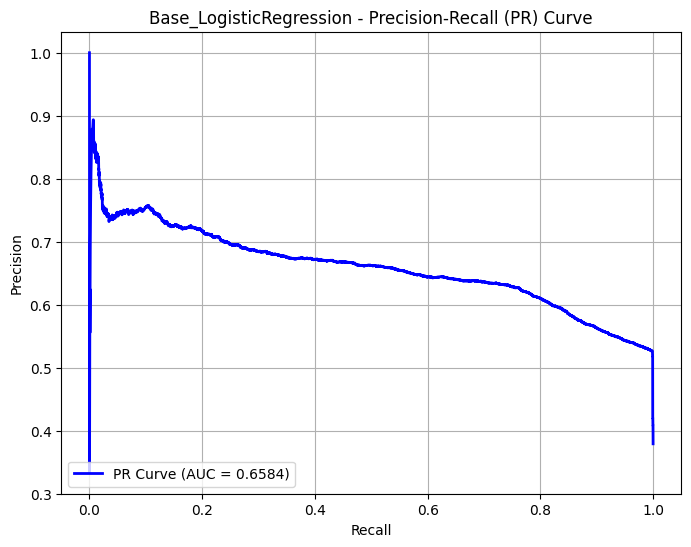

C:\Users\111\AppData\Local\Temp\ipykernel_22392\2544303988.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


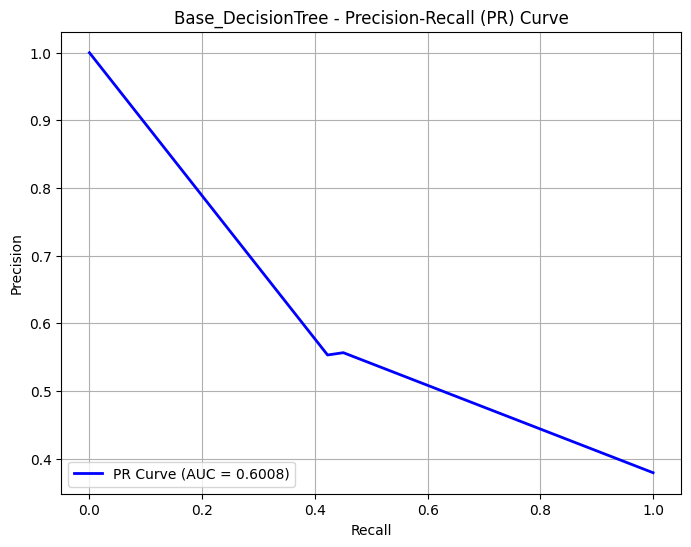

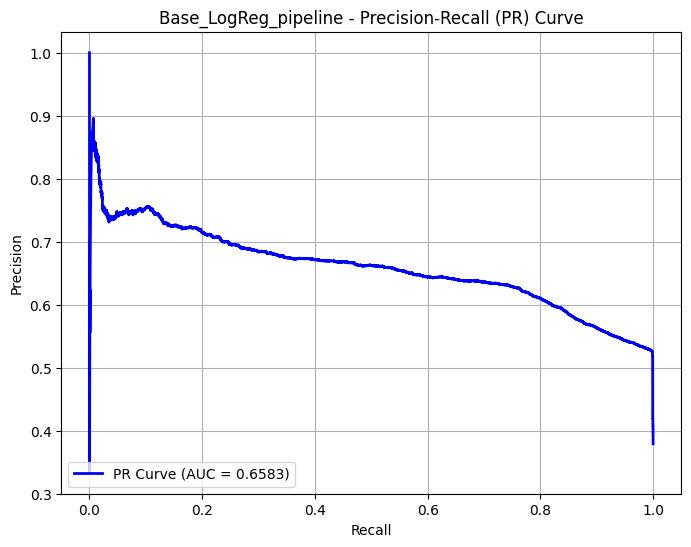

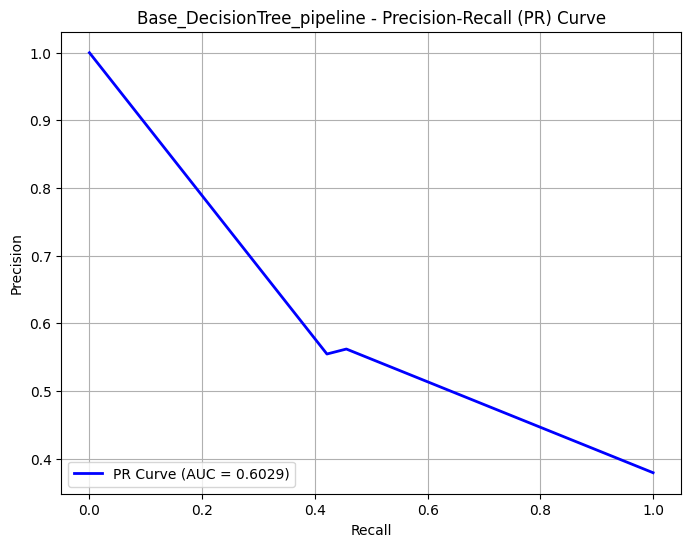

0:	learn: 0.6133206	total: 232ms	remaining: 3m 51s
100:	learn: 0.4062631	total: 4.72s	remaining: 42s
200:	learn: 0.3896532	total: 8.92s	remaining: 35.5s
300:	learn: 0.3786746	total: 13.1s	remaining: 30.4s
400:	learn: 0.3699670	total: 17.3s	remaining: 25.8s
500:	learn: 0.3631519	total: 22.7s	remaining: 22.6s
600:	learn: 0.3573770	total: 27.9s	remaining: 18.5s
700:	learn: 0.3520885	total: 32.9s	remaining: 14s
800:	learn: 0.3472776	total: 37.9s	remaining: 9.41s
900:	learn: 0.3430309	total: 43.1s	remaining: 4.74s
999:	learn: 0.3388784	total: 48.5s	remaining: 0us


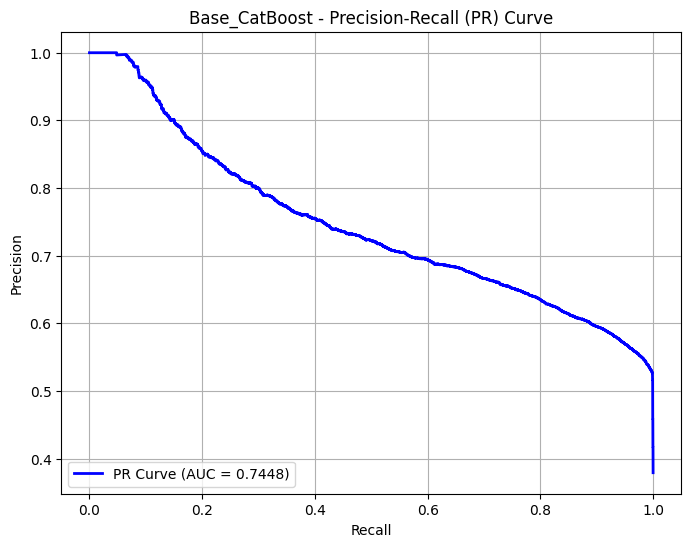

[I 2025-03-04 11:57:02,883] A new study created in memory with name: no-name-136e0e9b-c7b1-4556-943f-e8f001a0ef6e
[I 2025-03-04 11:57:05,994] Trial 0 finished with value: 0.8573845780631532 and parameters: {'iterations': 750, 'learning_rate': 0.10689030099918699, 'depth': 5, 'l2_leaf_reg': 1.8528349989572352, 'border_count': 63, 'random_strength': 0.2757451121646989, 'bagging_temperature': 0.30804461406391515, 'subsample': 0.8628386886980495}. Best is trial 0 with value: 0.8573845780631532.


0:	learn: 0.6167965	test: 0.6197512	best: 0.6197512 (0)	total: 42.4ms	remaining: 31.8s
1:	learn: 0.5662424	test: 0.5721895	best: 0.5721895 (1)	total: 85.7ms	remaining: 32s
2:	learn: 0.5349332	test: 0.5427031	best: 0.5427031 (2)	total: 128ms	remaining: 31.9s
3:	learn: 0.5119497	test: 0.5177086	best: 0.5177086 (3)	total: 167ms	remaining: 31.1s
4:	learn: 0.4978253	test: 0.5036472	best: 0.5036472 (4)	total: 204ms	remaining: 30.4s
5:	learn: 0.4906064	test: 0.4983037	best: 0.4983037 (5)	total: 245ms	remaining: 30.4s
6:	learn: 0.4845956	test: 0.4928778	best: 0.4928778 (6)	total: 290ms	remaining: 30.7s
7:	learn: 0.4790697	test: 0.4870146	best: 0.4870146 (7)	total: 330ms	remaining: 30.6s
8:	learn: 0.4721454	test: 0.4807804	best: 0.4807804 (8)	total: 370ms	remaining: 30.5s
9:	learn: 0.4691499	test: 0.4795664	best: 0.4795664 (9)	total: 415ms	remaining: 30.7s
10:	learn: 0.4658505	test: 0.4764380	best: 0.4764380 (10)	total: 456ms	remaining: 30.6s
11:	learn: 0.4635868	test: 0.4746532	best: 0.4746532

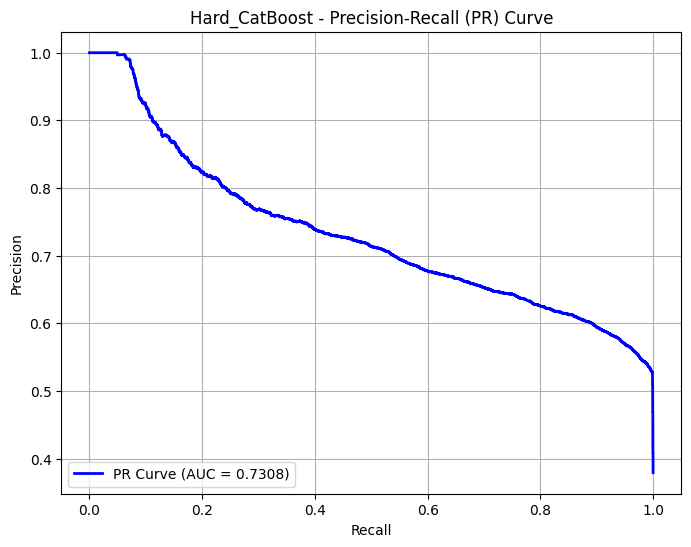

Fitting 2 folds for each of 24 candidates, totalling 48 fits


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in D

LightGBM - Accuracy: 0.7398, ROC AUC: 0.8342
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}


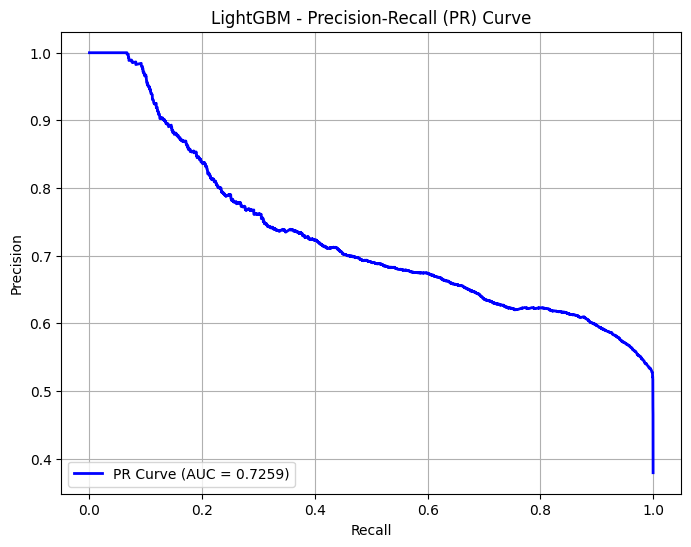

[LightGBM] [Warning] lambda_l1 is set=0.6449384656421314, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6449384656421314
[LightGBM] [Warning] lambda_l2 is set=3.153434497261613, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.153434497261613
[LightGBM] [Warning] lambda_l1 is set=2.6670089681612246, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6670089681612246
[LightGBM] [Warning] lambda_l2 is set=3.6532004449375934, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6532004449375934
 10%|█         | 1/10 [00:00<00:01,  4.87trial/s, best loss: -0.8448870733255522]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.566415486282788, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.566415486282788
[LightGBM] [Warning] lambda_l2 is set=3.9230346318799425, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9230346318799425
 20%|██        | 2/10 [00:02<00:11,  1.46s/trial, best loss: -0.8757137689320256]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.8097702925539152, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8097702925539152
[LightGBM] [Warning] lambda_l2 is set=2.4636733307404275, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4636733307404275
 30%|███       | 3/10 [00:03<00:06,  1.01trial/s, best loss: -0.8757137689320256]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.872020156641925, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.872020156641925
[LightGBM] [Warning] lambda_l2 is set=0.37040265214497436, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.37040265214497436
 40%|████      | 4/10 [00:04<00:06,  1.01s/trial, best loss: -0.8757137689320256]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.738676956654586, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.738676956654586
[LightGBM] [Warning] lambda_l2 is set=4.767831961555221, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.767831961555221
 50%|█████     | 5/10 [00:04<00:04,  1.23trial/s, best loss: -0.8757137689320256]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=1.4525813602533684, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4525813602533684
[LightGBM] [Warning] lambda_l2 is set=1.582240407572365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.582240407572365
 60%|██████    | 6/10 [00:04<00:02,  1.52trial/s, best loss: -0.8757137689320256]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.379588304961806, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.379588304961806
[LightGBM] [Warning] lambda_l2 is set=4.336304726395479, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.336304726395479
 80%|████████  | 8/10 [00:05<00:00,  2.11trial/s, best loss: -0.8757137689320256]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.0293963071062207, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0293963071062207
[LightGBM] [Warning] lambda_l2 is set=2.508705167727725, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.508705167727725
[LightGBM] [Warning] lambda_l1 is set=2.9385590396495105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9385590396495105
[LightGBM] [Warning] lambda_l2 is set=4.233065599606158, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.233065599606158
 90%|█████████ | 9/10 [00:05<00:00,  2.62trial/s, best loss: -0.8757137689320256]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



100%|██████████| 10/10 [00:06<00:00,  1.62trial/s, best loss: -0.8770208380258137]
[LightGBM] [Warning] lambda_l1 is set=2.9385590396495105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9385590396495105
[LightGBM] [Warning] lambda_l2 is set=4.233065599606158, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.233065599606158


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


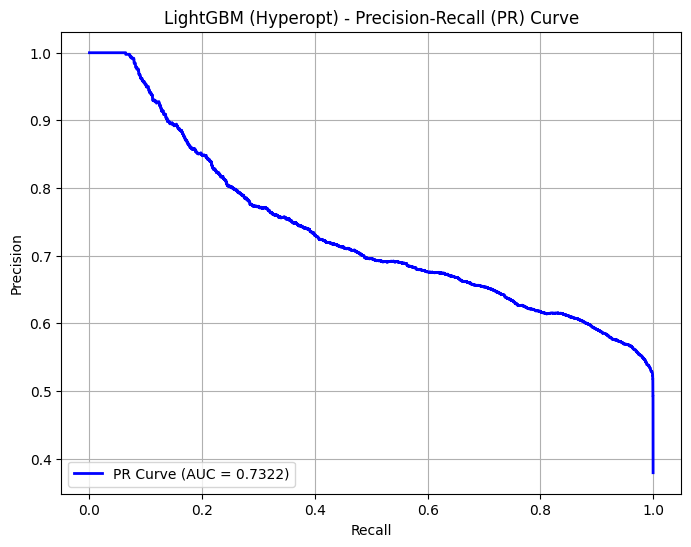

XGBoost - Accuracy: 0.7424, ROC AUC: 0.8393


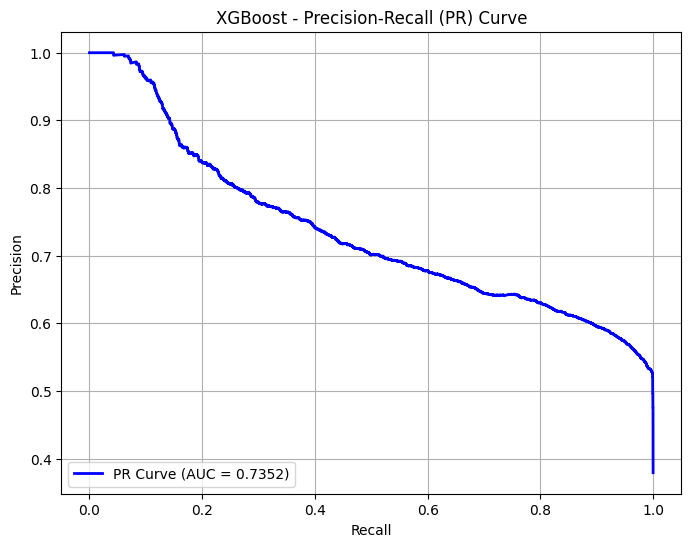

100%|██████████| 10/10 [00:13<00:00,  1.37s/trial, best loss: -0.8780883346642915]


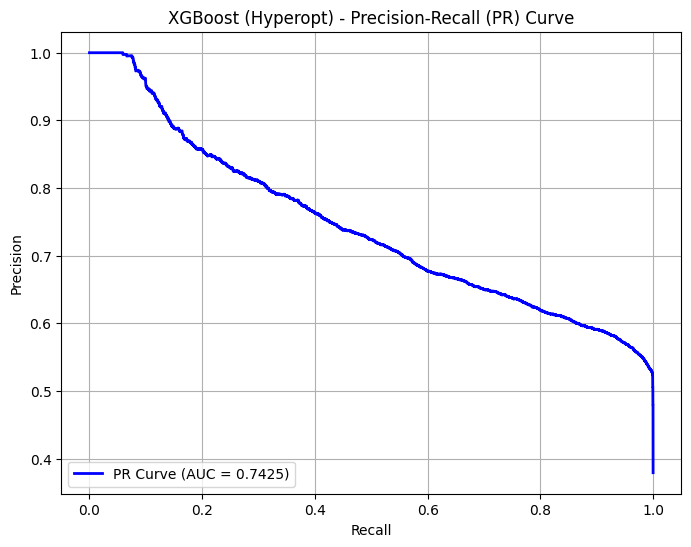

                        Model  Accuracy   ROC AUC  Test Precision    Recall        F1    PR AUC
0     Base_LogisticRegression  0.730568  0.811763        0.610717  0.798440  0.692075  0.658444
1           Base_DecisionTree  0.655551  0.614991        0.556649  0.450423  0.497934  0.600769
2        Base_LogReg_pipeline  0.730629  0.811698        0.610711  0.798927  0.692254  0.658311
3  Base_DecisionTree_pipeline  0.658941  0.618029        0.562036  0.455787  0.503366  0.602875
4               Base_CatBoost  0.753745  0.845044        0.678885  0.665312  0.672030  0.744838
5               Hard_CatBoost  0.742341  0.839014        0.627423  0.789174  0.699064  0.730824
6                    LightGBM  0.739814  0.834159        0.622759  0.796164  0.698866  0.725891
7         LightGBM (Hyperopt)  0.736609  0.836980        0.619911  0.789499  0.694502  0.732154
8                     XGBoost  0.742403  0.839291        0.662333  0.654259  0.658271  0.735195
9          XGBoost (Hyperopt)  0.743697 

Model             Base_CatBoost
Accuracy               0.753745
ROC AUC                0.845044
Test Precision         0.678885
Recall                 0.665312
F1                      0.67203
PR AUC                 0.744838
Name: 4, dtype: object

Выбран ТТ: 5921ДС_Ткацкая5
is_back
0    83911
1    41742
Name: count, dtype: int64
2.010229505054861
Оценка моделей для DS: 5921


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


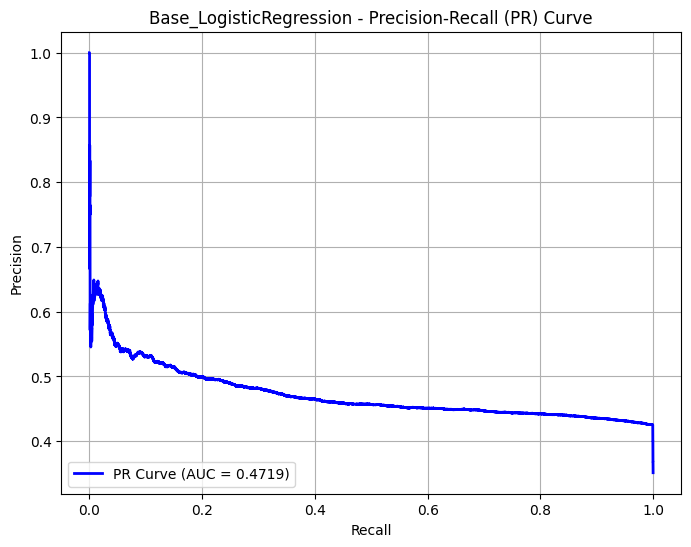

C:\Users\111\AppData\Local\Temp\ipykernel_22392\2544303988.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


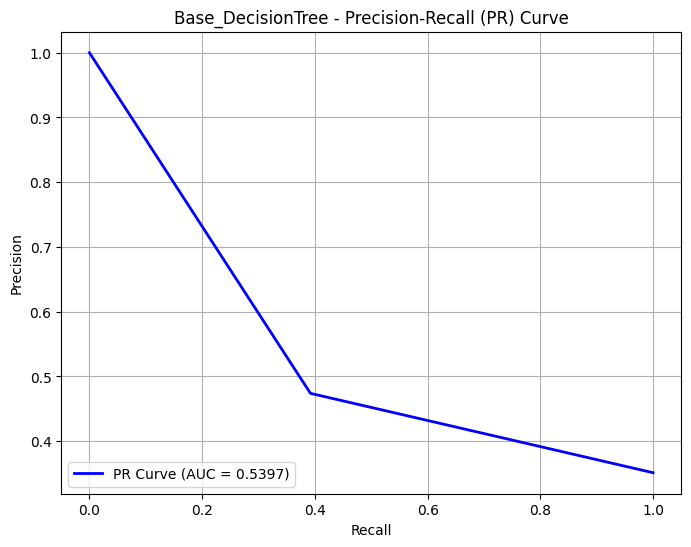

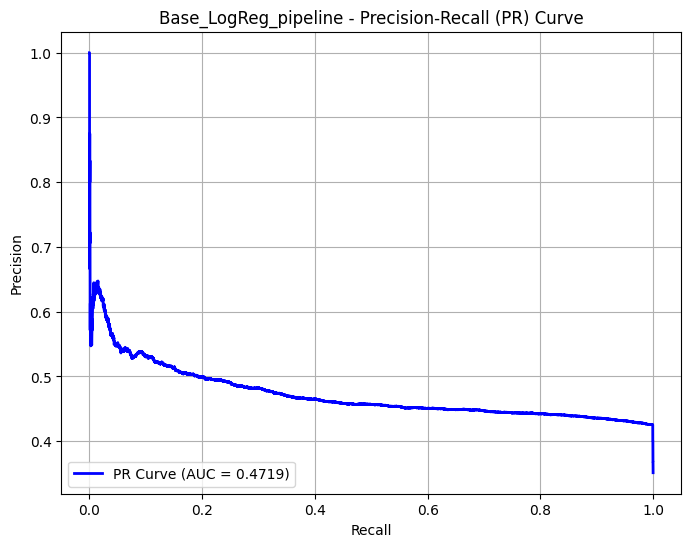

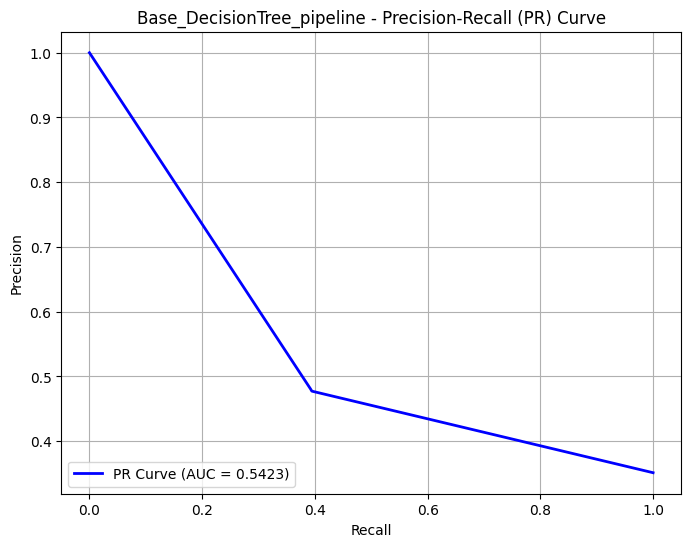

0:	learn: 0.6359782	total: 79ms	remaining: 1m 18s
100:	learn: 0.5086455	total: 9.58s	remaining: 1m 25s
200:	learn: 0.4957302	total: 18.5s	remaining: 1m 13s
300:	learn: 0.4869542	total: 27.8s	remaining: 1m 4s
400:	learn: 0.4802604	total: 37.3s	remaining: 55.7s
500:	learn: 0.4749847	total: 46.4s	remaining: 46.2s
600:	learn: 0.4700865	total: 56.3s	remaining: 37.4s
700:	learn: 0.4660934	total: 1m 5s	remaining: 28s
800:	learn: 0.4623052	total: 1m 16s	remaining: 19.1s
900:	learn: 0.4588985	total: 1m 26s	remaining: 9.5s
999:	learn: 0.4556531	total: 1m 36s	remaining: 0us


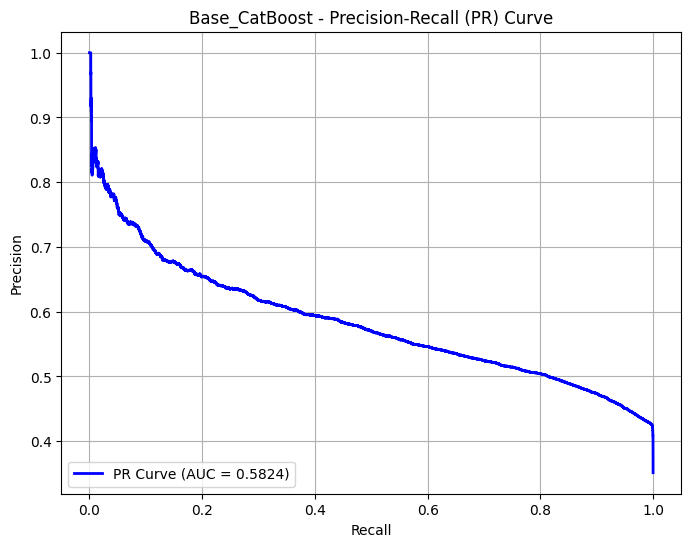

[I 2025-03-04 12:00:39,920] A new study created in memory with name: no-name-9ec67f6f-a016-40aa-bbaf-5c0e157c11b2
[I 2025-03-04 12:00:55,274] Trial 0 finished with value: 0.7379932386741134 and parameters: {'iterations': 300, 'learning_rate': 0.05226688629476295, 'depth': 4, 'l2_leaf_reg': 3.5210469575600336, 'border_count': 37, 'random_strength': 0.2946035975406971, 'bagging_temperature': 0.22407824529301257, 'subsample': 0.7085063459616562}. Best is trial 0 with value: 0.7379932386741134.


0:	learn: 0.6708026	test: 0.6739584	best: 0.6739584 (0)	total: 150ms	remaining: 44.9s
1:	learn: 0.6529917	test: 0.6586257	best: 0.6586257 (1)	total: 231ms	remaining: 34.4s
2:	learn: 0.6384850	test: 0.6459749	best: 0.6459749 (2)	total: 303ms	remaining: 30s
3:	learn: 0.6273892	test: 0.6357365	best: 0.6357365 (3)	total: 380ms	remaining: 28.1s
4:	learn: 0.6189703	test: 0.6277158	best: 0.6277158 (4)	total: 463ms	remaining: 27.3s
5:	learn: 0.6115599	test: 0.6206347	best: 0.6206347 (5)	total: 525ms	remaining: 25.7s
6:	learn: 0.6055840	test: 0.6154702	best: 0.6154702 (6)	total: 598ms	remaining: 25s
7:	learn: 0.6006185	test: 0.6113035	best: 0.6113035 (7)	total: 678ms	remaining: 24.7s
8:	learn: 0.5966315	test: 0.6073426	best: 0.6073426 (8)	total: 740ms	remaining: 23.9s
9:	learn: 0.5938724	test: 0.6050125	best: 0.6050125 (9)	total: 807ms	remaining: 23.4s
10:	learn: 0.5911806	test: 0.6023905	best: 0.6023905 (10)	total: 894ms	remaining: 23.5s
11:	learn: 0.5889102	test: 0.6004422	best: 0.6004422 (11

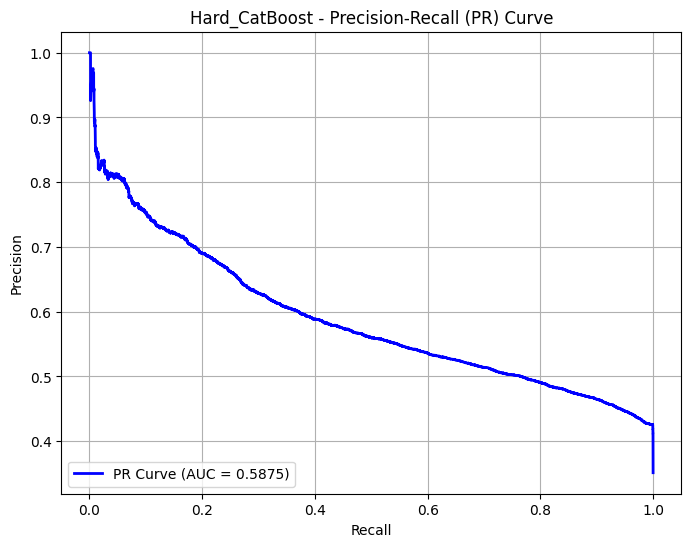

Fitting 2 folds for each of 24 candidates, totalling 48 fits


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in D

LightGBM - Accuracy: 0.6643, ROC AUC: 0.7627
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 50}


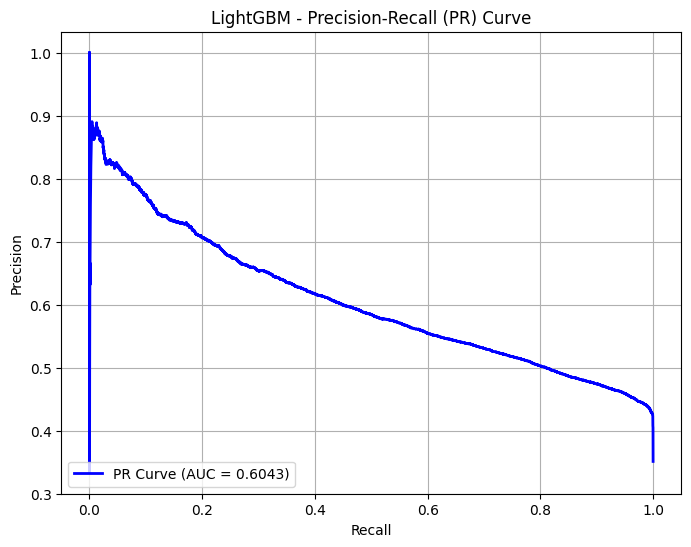

[LightGBM] [Warning] lambda_l1 is set=4.83361832397955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.83361832397955
[LightGBM] [Warning] lambda_l2 is set=3.0283955151296453, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0283955151296453
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=1.4794877705561227, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4794877705561227
[LightGBM] [Warning] lambda_l2 is set=4.421680757834403, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.421680757834403
 10%|█         | 1/10 [00:00<00:05,  1.69trial/s, best loss: -0.684721776577395]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.9102575591568685, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9102575591568685
[LightGBM] [Warning] lambda_l2 is set=1.0428962102610644, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0428962102610644
 20%|██        | 2/10 [00:02<00:09,  1.19s/trial, best loss: -0.7436340101519753]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.30885972244634075, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.30885972244634075
[LightGBM] [Warning] lambda_l2 is set=2.3310036834684795, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3310036834684795
 30%|███       | 3/10 [00:03<00:07,  1.11s/trial, best loss: -0.7436340101519753]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.9338304268648218, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9338304268648218
[LightGBM] [Warning] lambda_l2 is set=1.8207751275422828, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8207751275422828
 40%|████      | 4/10 [00:04<00:06,  1.09s/trial, best loss: -0.7436340101519753]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.9220588931301787, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9220588931301787
[LightGBM] [Warning] lambda_l2 is set=1.166791518381984, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.166791518381984
 50%|█████     | 5/10 [00:05<00:05,  1.17s/trial, best loss: -0.7436340101519753]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.16728176681112872, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16728176681112872
[LightGBM] [Warning] lambda_l2 is set=1.16950342053658, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.16950342053658
 60%|██████    | 6/10 [00:08<00:06,  1.58s/trial, best loss: -0.7436340101519753]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.329591753719159, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.329591753719159
[LightGBM] [Warning] lambda_l2 is set=1.837394721120185, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.837394721120185
 80%|████████  | 8/10 [00:10<00:02,  1.38s/trial, best loss: -0.7436340101519753]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.78950150553285, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.78950150553285
[LightGBM] [Warning] lambda_l2 is set=4.644976591324433, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.644976591324433
 90%|█████████ | 9/10 [00:11<00:01,  1.04s/trial, best loss: -0.7436340101519753]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.676390425297187, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.676390425297187
[LightGBM] [Warning] lambda_l2 is set=0.3028102761490886, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3028102761490886
 90%|█████████ | 9/10 [00:11<00:01,  1.04s/trial, best loss: -0.7436340101519753]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



100%|██████████| 10/10 [00:14<00:00,  1.41s/trial, best loss: -0.7508919661552119]
[LightGBM] [Warning] lambda_l1 is set=4.676390425297187, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.676390425297187
[LightGBM] [Warning] lambda_l2 is set=0.3028102761490886, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3028102761490886


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


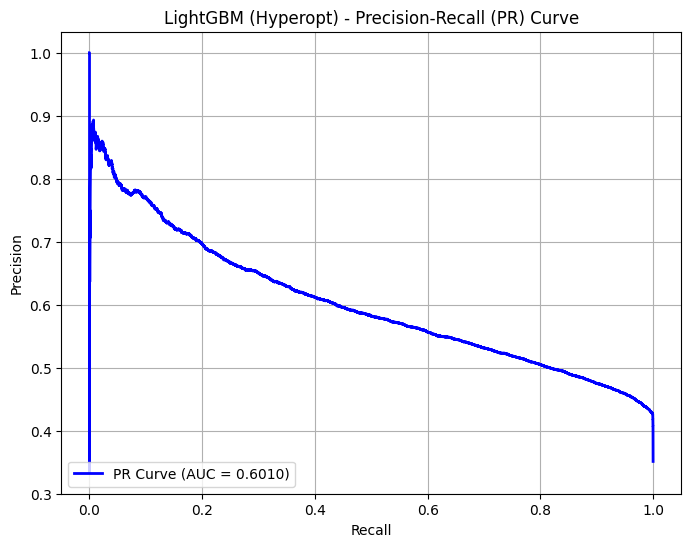

XGBoost - Accuracy: 0.6921, ROC AUC: 0.7580


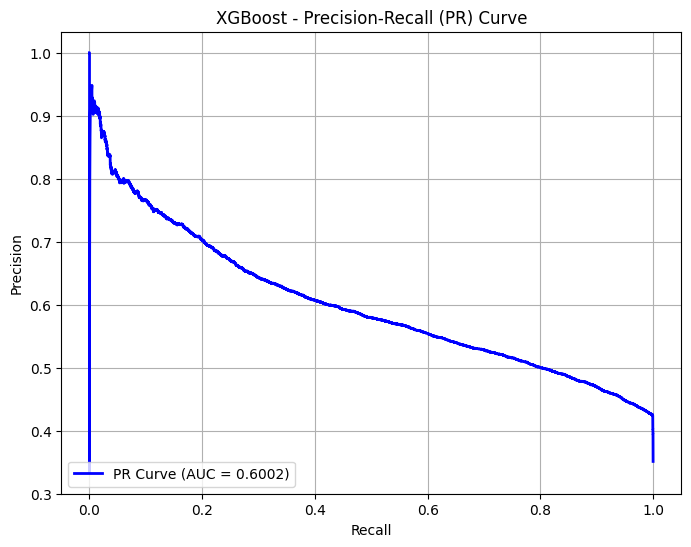

100%|██████████| 10/10 [00:34<00:00,  3.41s/trial, best loss: -0.7450585683851881]


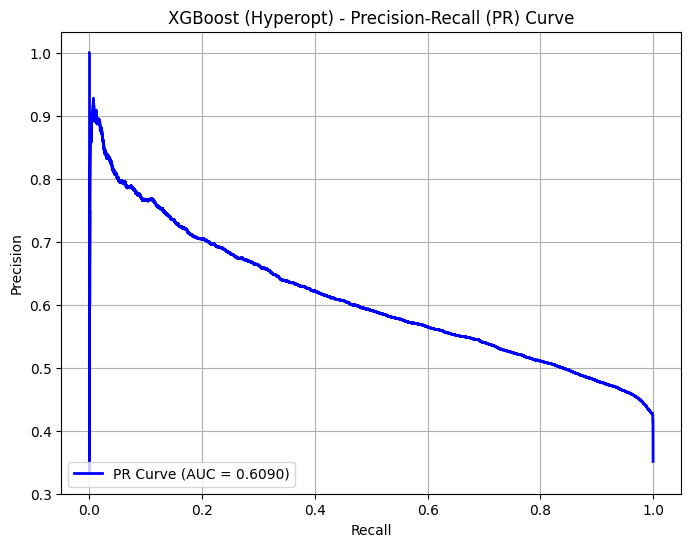

                        Model  Accuracy   ROC AUC  Test Precision    Recall        F1    PR AUC
0     Base_LogisticRegression  0.545429  0.669143        0.432300  0.939021  0.592041  0.471909
1           Base_DecisionTree  0.633530  0.578945        0.473846  0.392197  0.429173  0.539738
2        Base_LogReg_pipeline  0.545847  0.669133        0.432428  0.937277  0.591814  0.471890
3  Base_DecisionTree_pipeline  0.635536  0.580975        0.477268  0.394576  0.432001  0.542310
4               Base_CatBoost  0.692301  0.753622        0.602625  0.364127  0.453957  0.582393
5               Hard_CatBoost  0.635285  0.747195        0.488423  0.807945  0.608807  0.587496
6                    LightGBM  0.664253  0.762719        0.514921  0.762112  0.614593  0.604279
7         LightGBM (Hyperopt)  0.675868  0.762532        0.528671  0.712077  0.606818  0.601048
8                     XGBoost  0.692051  0.757950        0.679271  0.233606  0.347652  0.600182
9          XGBoost (Hyperopt)  0.682970 

Model             XGBoost (Hyperopt)
Accuracy                     0.68297
ROC AUC                     0.768446
Test Precision               0.53675
Recall                       0.71168
F1                           0.61196
PR AUC                      0.608984
Name: 9, dtype: object

Выбран ТТ: 4755ДС_Пятницкое29
is_back
0    87406
1    56460
Name: count, dtype: int64
1.5481048529932695
Оценка моделей для DS: 4755


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


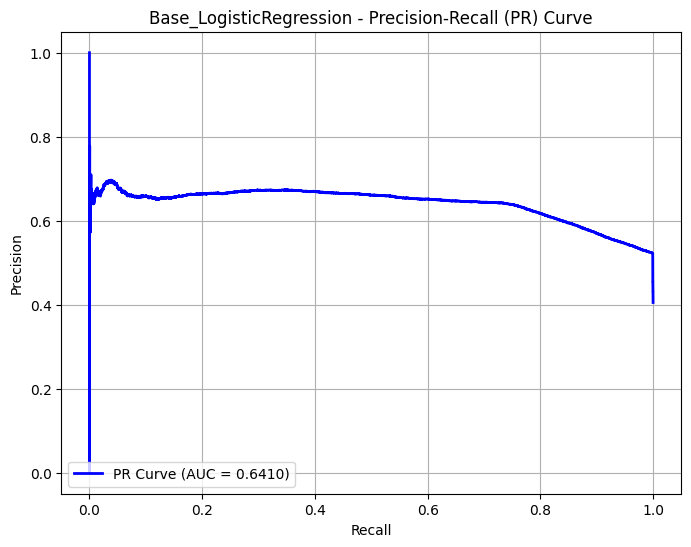

C:\Users\111\AppData\Local\Temp\ipykernel_22392\2544303988.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


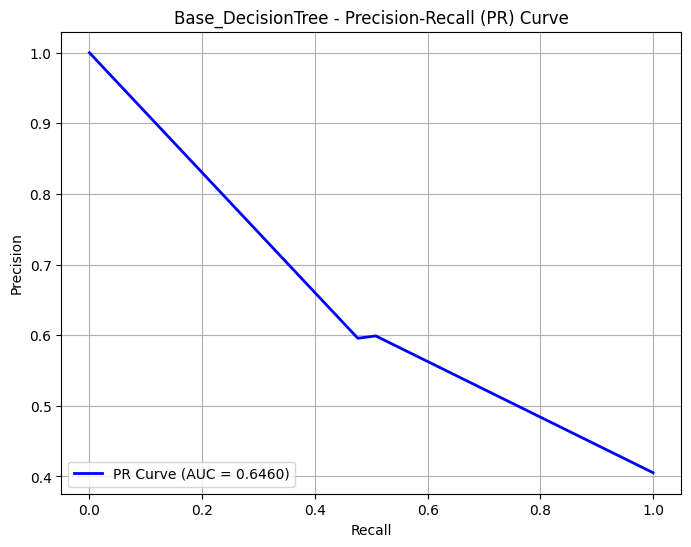

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


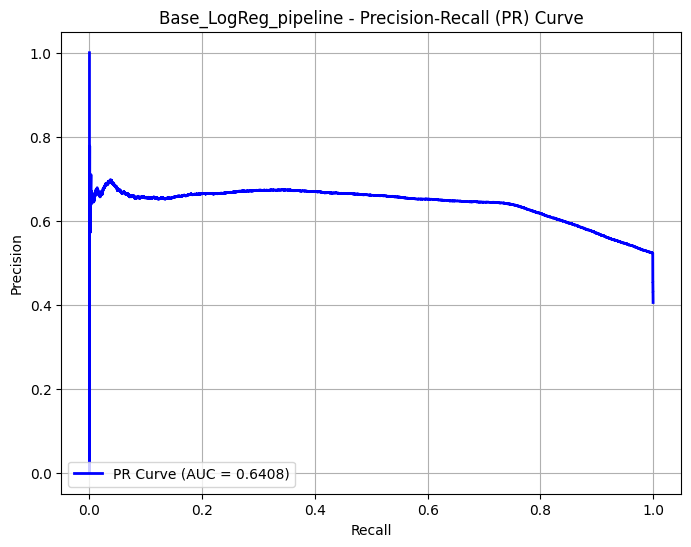

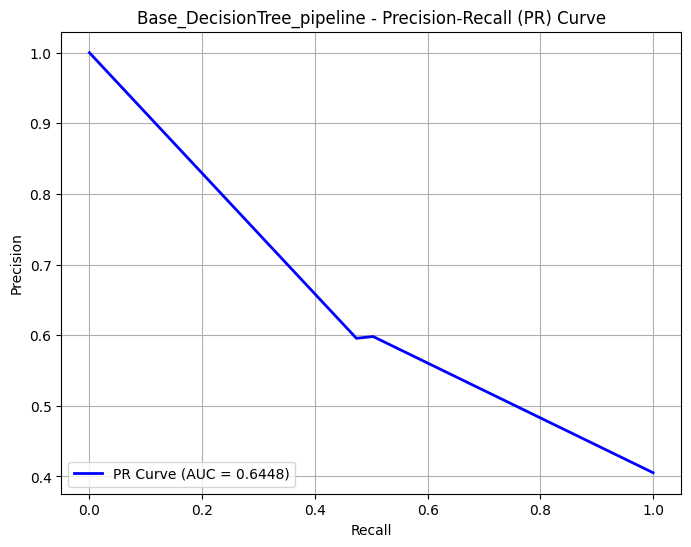

0:	learn: 0.6202404	total: 88.8ms	remaining: 1m 28s
100:	learn: 0.4501730	total: 9.8s	remaining: 1m 27s
200:	learn: 0.4366009	total: 20.8s	remaining: 1m 22s
300:	learn: 0.4293450	total: 32s	remaining: 1m 14s
400:	learn: 0.4239694	total: 42.8s	remaining: 1m 3s
500:	learn: 0.4192629	total: 54.3s	remaining: 54.1s
600:	learn: 0.4152672	total: 1m 5s	remaining: 43.5s
700:	learn: 0.4118999	total: 1m 16s	remaining: 32.7s
800:	learn: 0.4089657	total: 1m 28s	remaining: 22.1s
900:	learn: 0.4061239	total: 1m 42s	remaining: 11.3s
999:	learn: 0.4036606	total: 1m 55s	remaining: 0us


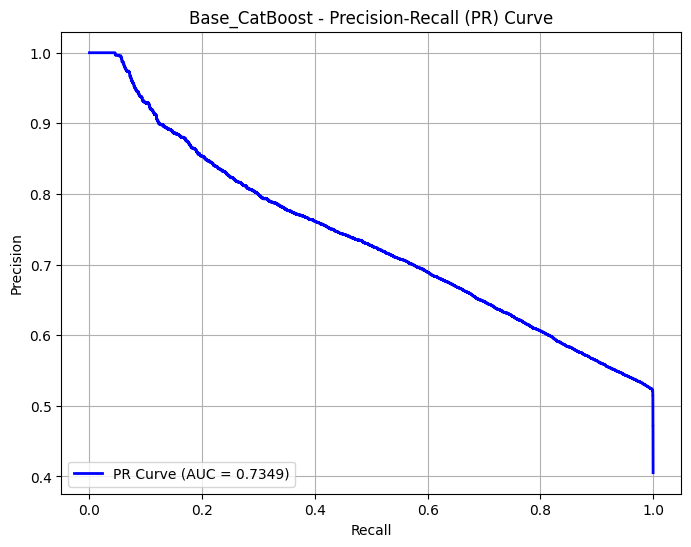

[I 2025-03-04 12:05:54,607] A new study created in memory with name: no-name-3b278202-cc11-4714-ad1b-63367c0f25b3
[I 2025-03-04 12:06:22,441] Trial 0 finished with value: 0.8502202537874345 and parameters: {'iterations': 300, 'learning_rate': 0.06315798247654095, 'depth': 5, 'l2_leaf_reg': 1.5299302428454413, 'border_count': 48, 'random_strength': 1.2737133306851078, 'bagging_temperature': 0.6366549185800738, 'subsample': 0.9495015529052719}. Best is trial 0 with value: 0.8502202537874345.


0:	learn: 0.6512991	test: 0.6532088	best: 0.6532088 (0)	total: 145ms	remaining: 43.4s
1:	learn: 0.6200679	test: 0.6227022	best: 0.6227022 (1)	total: 286ms	remaining: 42.6s
2:	learn: 0.5957874	test: 0.5989800	best: 0.5989800 (2)	total: 428ms	remaining: 42.3s
3:	learn: 0.5768486	test: 0.5794546	best: 0.5794546 (3)	total: 565ms	remaining: 41.8s
4:	learn: 0.5623185	test: 0.5641909	best: 0.5641909 (4)	total: 719ms	remaining: 42.4s
5:	learn: 0.5508726	test: 0.5525580	best: 0.5525580 (5)	total: 881ms	remaining: 43.1s
6:	learn: 0.5413237	test: 0.5427660	best: 0.5427660 (6)	total: 1.03s	remaining: 43.3s
7:	learn: 0.5342654	test: 0.5344870	best: 0.5344870 (7)	total: 1.18s	remaining: 43.1s
8:	learn: 0.5297560	test: 0.5295595	best: 0.5295595 (8)	total: 1.32s	remaining: 42.8s
9:	learn: 0.5244118	test: 0.5238741	best: 0.5238741 (9)	total: 1.47s	remaining: 42.7s
10:	learn: 0.5199031	test: 0.5191926	best: 0.5191926 (10)	total: 1.61s	remaining: 42.2s
11:	learn: 0.5171734	test: 0.5159596	best: 0.5159596

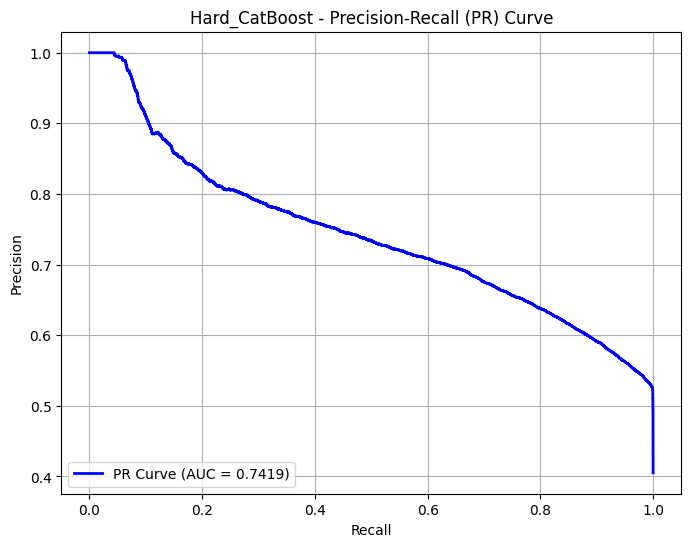

Fitting 2 folds for each of 24 candidates, totalling 48 fits


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in D

LightGBM - Accuracy: 0.7211, ROC AUC: 0.8192
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 50}


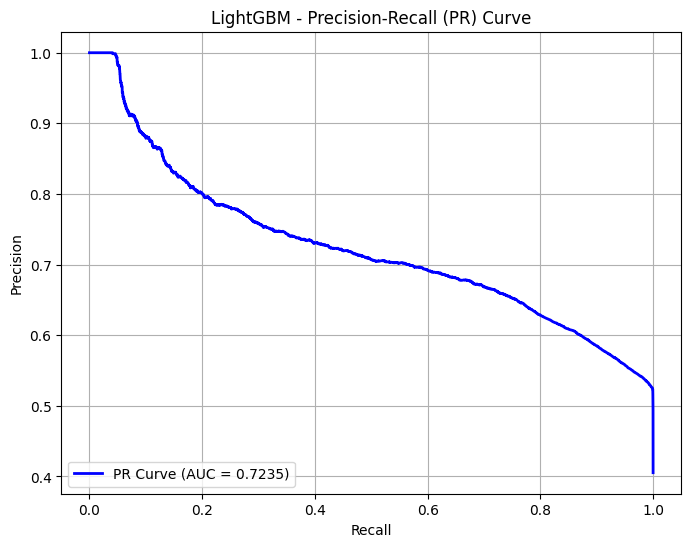

[LightGBM] [Warning] lambda_l1 is set=1.2898724108991122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2898724108991122
[LightGBM] [Warning] lambda_l2 is set=3.515545687649065, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.515545687649065
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.628175513032209, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.628175513032209
[LightGBM] [Warning] lambda_l2 is set=3.201601967572315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.201601967572315
 10%|█         | 1/10 [00:01<00:15,  1.73s/trial, best loss: -0.8575659931121943]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=1.2767074653223487, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2767074653223487
[LightGBM] [Warning] lambda_l2 is set=2.4148803596968587, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4148803596968587
 20%|██        | 2/10 [00:03<00:13,  1.69s/trial, best loss: -0.8586597070235527]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.491797680568228, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.491797680568228
[LightGBM] [Warning] lambda_l2 is set=1.826588035792649, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.826588035792649
 40%|████      | 4/10 [00:04<00:05,  1.02trial/s, best loss: -0.8586597070235527]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.6197813875469196, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6197813875469196
[LightGBM] [Warning] lambda_l2 is set=3.0430605195011093, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0430605195011093
 40%|████      | 4/10 [00:04<00:05,  1.02trial/s, best loss: -0.8586597070235527]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.982062304928546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.982062304928546
[LightGBM] [Warning] lambda_l2 is set=1.118244776537497, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.118244776537497
 50%|█████     | 5/10 [00:05<00:04,  1.16trial/s, best loss: -0.8586597070235527]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.680778856493545, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.680778856493545
[LightGBM] [Warning] lambda_l2 is set=2.0754605319653625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0754605319653625
 60%|██████    | 6/10 [00:07<00:04,  1.13s/trial, best loss: -0.8586597070235527]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.6993988227958967, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6993988227958967
[LightGBM] [Warning] lambda_l2 is set=3.093646400674192, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.093646400674192
 70%|███████   | 7/10 [00:08<00:03,  1.13s/trial, best loss: -0.8586597070235527]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.6780637449973232, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6780637449973232
[LightGBM] [Warning] lambda_l2 is set=4.083283568913894, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.083283568913894
 80%|████████  | 8/10 [00:09<00:02,  1.11s/trial, best loss: -0.8592892861221275]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.9184006390388405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9184006390388405
[LightGBM] [Warning] lambda_l2 is set=4.534164064907738, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.534164064907738
 90%|█████████ | 9/10 [00:10<00:01,  1.10s/trial, best loss: -0.8592892861221275]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



100%|██████████| 10/10 [00:12<00:00,  1.22s/trial, best loss: -0.8592892861221275]
[LightGBM] [Warning] lambda_l1 is set=3.6993988227958967, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6993988227958967
[LightGBM] [Warning] lambda_l2 is set=3.093646400674192, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.093646400674192


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


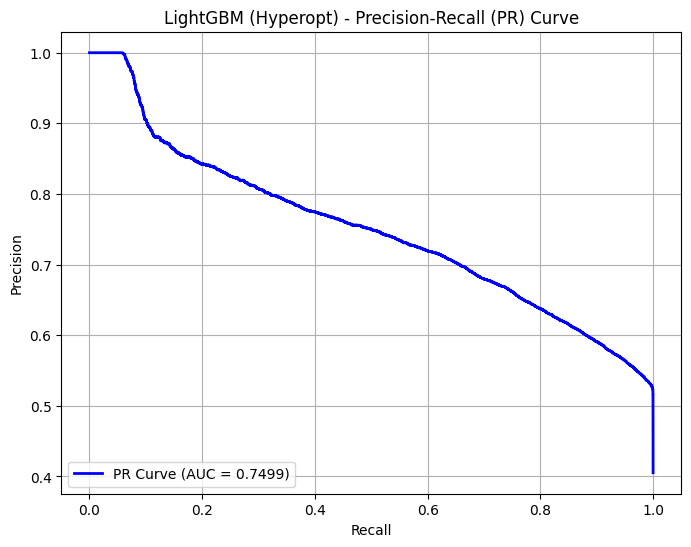

XGBoost - Accuracy: 0.7436, ROC AUC: 0.8313


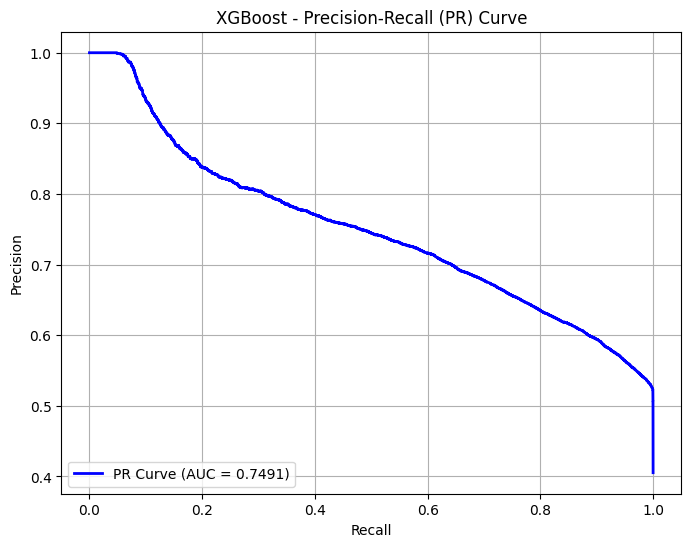

100%|██████████| 10/10 [00:45<00:00,  4.52s/trial, best loss: -0.8594411535657833]


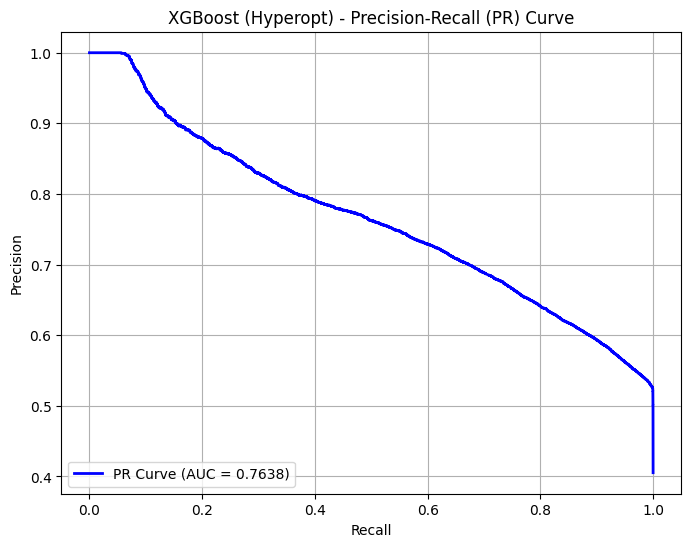

                        Model  Accuracy   ROC AUC  Test Precision    Recall        F1    PR AUC
0     Base_LogisticRegression  0.719304  0.790383        0.620048  0.793865  0.696273  0.640968
1           Base_DecisionTree  0.662766  0.637342        0.598995  0.507954  0.549730  0.645960
2        Base_LogReg_pipeline  0.719061  0.790382        0.619858  0.793325  0.695945  0.640768
3  Base_DecisionTree_pipeline  0.661647  0.635834        0.598145  0.503211  0.546587  0.644762
4               Base_CatBoost  0.723172  0.813580        0.719780  0.518999  0.603118  0.734852
5               Hard_CatBoost  0.732636  0.828598        0.632422  0.812594  0.711276  0.741863
6                    LightGBM  0.721129  0.819165        0.614956  0.834264  0.708016  0.723497
7         LightGBM (Hyperopt)  0.734728  0.832606        0.638508  0.796266  0.708714  0.749905
8                     XGBoost  0.743608  0.831315        0.683541  0.684075  0.683808  0.749054
9          XGBoost (Hyperopt)  0.741516 

Model             XGBoost (Hyperopt)
Accuracy                    0.741516
ROC AUC                     0.837811
Test Precision              0.651837
Recall                      0.777478
F1                          0.709135
PR AUC                      0.763805
Name: 9, dtype: object

Выбран ТТ: 7901ДС_Смольная34
is_back
0    67769
1    30413
Name: count, dtype: int64
2.228290533653372
Оценка моделей для DS: 7901


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


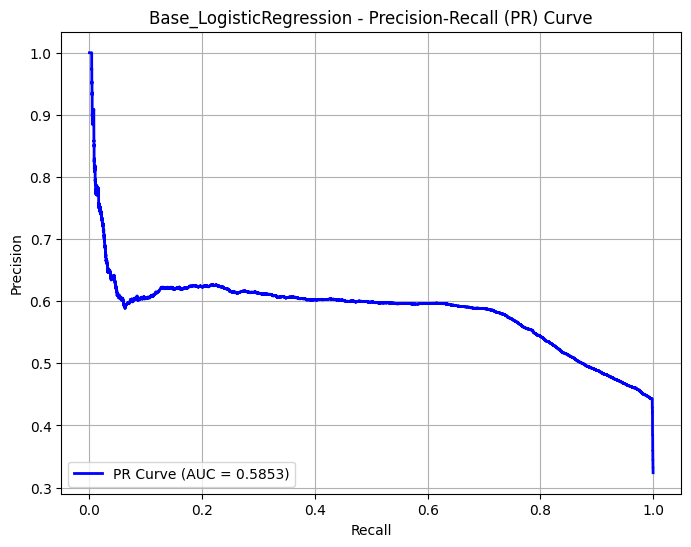

C:\Users\111\AppData\Local\Temp\ipykernel_22392\2544303988.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


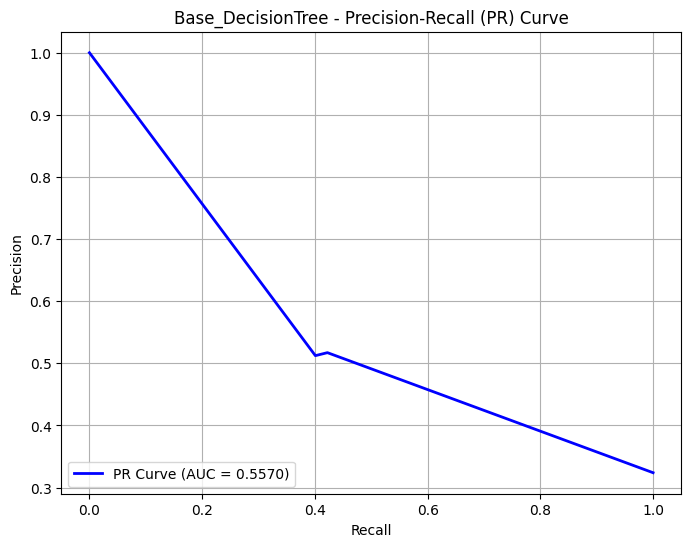

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


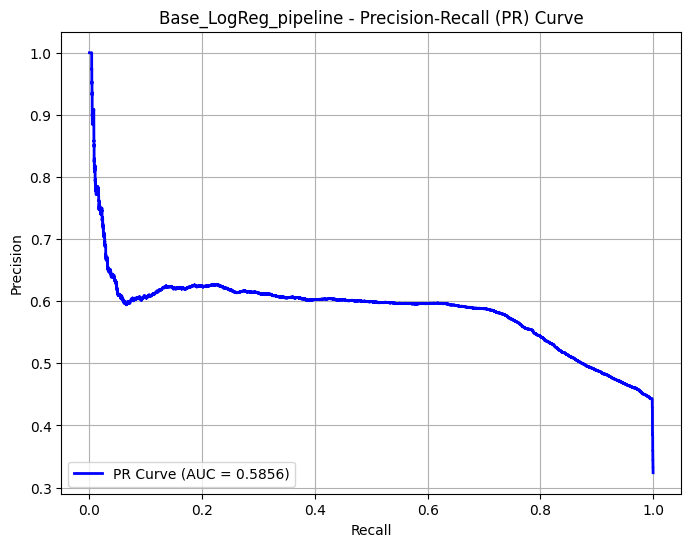

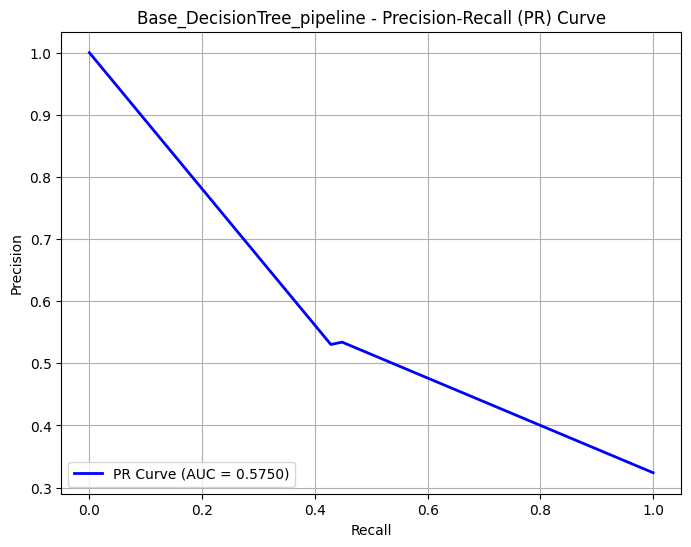

0:	learn: 0.6046856	total: 80ms	remaining: 1m 19s
100:	learn: 0.4117331	total: 10.4s	remaining: 1m 32s
200:	learn: 0.3966126	total: 19.2s	remaining: 1m 16s
300:	learn: 0.3878349	total: 28.3s	remaining: 1m 5s
400:	learn: 0.3812202	total: 38.7s	remaining: 57.9s
500:	learn: 0.3756387	total: 49.3s	remaining: 49.1s
600:	learn: 0.3706704	total: 1m	remaining: 40.2s
700:	learn: 0.3665724	total: 1m 10s	remaining: 30.1s
800:	learn: 0.3626620	total: 1m 20s	remaining: 20s
900:	learn: 0.3592892	total: 1m 29s	remaining: 9.79s
999:	learn: 0.3560140	total: 1m 37s	remaining: 0us


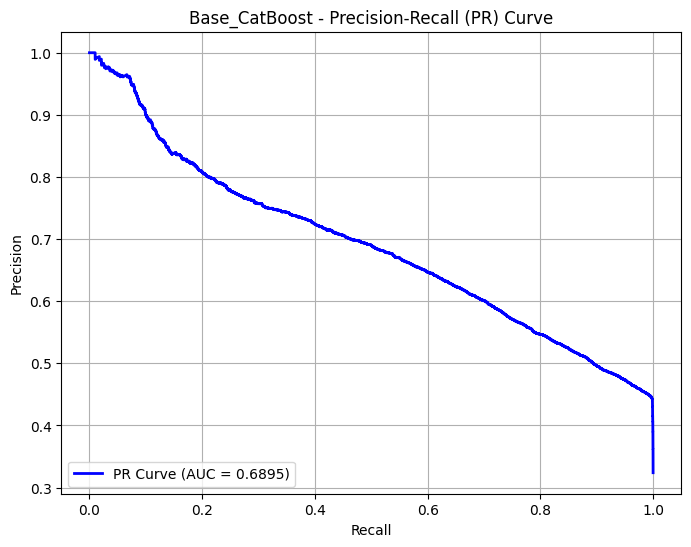

[I 2025-03-04 12:11:43,727] A new study created in memory with name: no-name-ee19d658-7bd8-4108-8cab-bbb5e516c6b7
[I 2025-03-04 12:12:00,940] Trial 0 finished with value: 0.8393557079669492 and parameters: {'iterations': 300, 'learning_rate': 0.033891413081998494, 'depth': 6, 'l2_leaf_reg': 2.572638882715078, 'border_count': 55, 'random_strength': 0.27988036329805754, 'bagging_temperature': 0.08213665721305895, 'subsample': 0.904814197876641}. Best is trial 0 with value: 0.8393557079669492.


0:	learn: 0.6668633	test: 0.6667153	best: 0.6667153 (0)	total: 80.8ms	remaining: 24.1s
1:	learn: 0.6470373	test: 0.6468014	best: 0.6468014 (1)	total: 169ms	remaining: 25.2s
2:	learn: 0.6277827	test: 0.6267332	best: 0.6267332 (2)	total: 253ms	remaining: 25.1s
3:	learn: 0.6111821	test: 0.6096384	best: 0.6096384 (3)	total: 332ms	remaining: 24.6s
4:	learn: 0.5971847	test: 0.5957211	best: 0.5957211 (4)	total: 473ms	remaining: 27.9s
5:	learn: 0.5843796	test: 0.5830210	best: 0.5830210 (5)	total: 572ms	remaining: 28s
6:	learn: 0.5734855	test: 0.5718670	best: 0.5718670 (6)	total: 658ms	remaining: 27.5s
7:	learn: 0.5641764	test: 0.5621155	best: 0.5621155 (7)	total: 739ms	remaining: 27s
8:	learn: 0.5562529	test: 0.5540734	best: 0.5540734 (8)	total: 822ms	remaining: 26.6s
9:	learn: 0.5488215	test: 0.5466626	best: 0.5466626 (9)	total: 934ms	remaining: 27.1s
10:	learn: 0.5425558	test: 0.5405183	best: 0.5405183 (10)	total: 1.15s	remaining: 30.3s
11:	learn: 0.5378054	test: 0.5358327	best: 0.5358327 (1

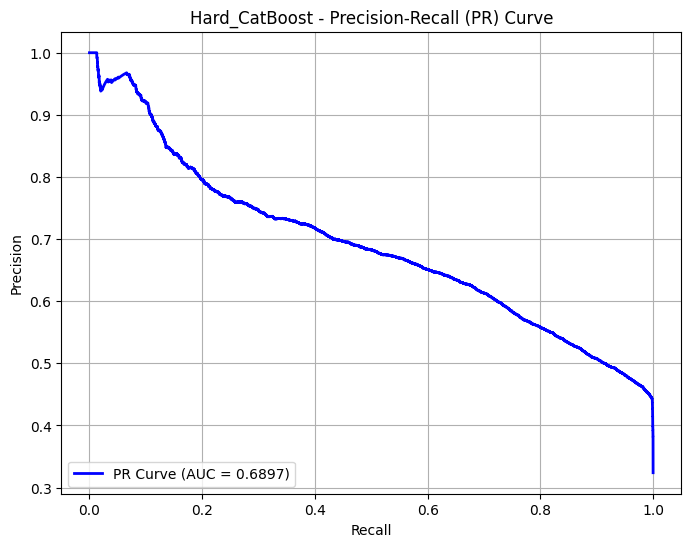

Fitting 2 folds for each of 24 candidates, totalling 48 fits


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in D

LightGBM - Accuracy: 0.7398, ROC AUC: 0.8371
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31}


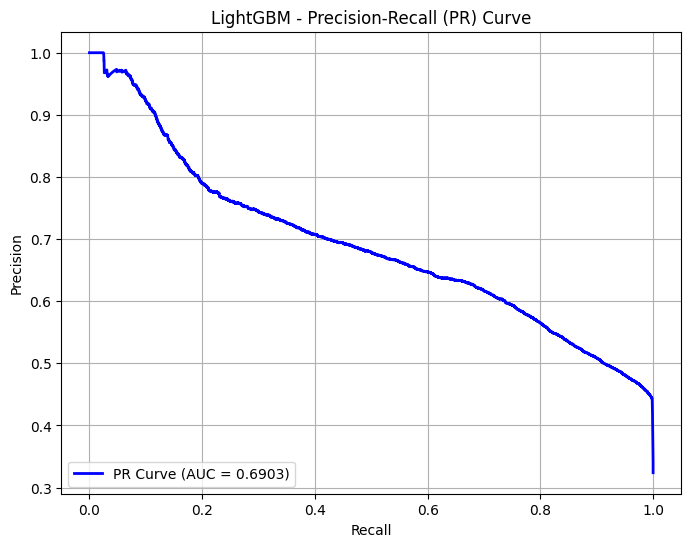

[LightGBM] [Warning] lambda_l1 is set=0.21326253841128462, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21326253841128462
[LightGBM] [Warning] lambda_l2 is set=0.07021602177413266, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07021602177413266
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.5718143138915686, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.5718143138915686
[LightGBM] [Warning] lambda_l2 is set=4.107574409282704, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.107574409282704
 20%|██        | 2/10 [00:01<00:04,  1.67trial/s, best loss: -0.8292387361124608]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.2624724417949302, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2624724417949302
[LightGBM] [Warning] lambda_l2 is set=0.5473827963786204, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5473827963786204
 20%|██        | 2/10 [00:01<00:04,  1.67trial/s, best loss: -0.8292387361124608]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.581385102202563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.581385102202563
[LightGBM] [Warning] lambda_l2 is set=3.697495228457938, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.697495228457938
 30%|███       | 3/10 [00:02<00:05,  1.20trial/s, best loss: -0.8365544596681027]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.48752901397737525, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.48752901397737525
[LightGBM] [Warning] lambda_l2 is set=2.224861004640673, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.224861004640673
 40%|████      | 4/10 [00:03<00:04,  1.35trial/s, best loss: -0.8365544596681027]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.6860150243642715, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6860150243642715
[LightGBM] [Warning] lambda_l2 is set=2.9592748055184233, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9592748055184233
 50%|█████     | 5/10 [00:04<00:04,  1.05trial/s, best loss: -0.8385606624990553]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.24190922695008, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.24190922695008
[LightGBM] [Warning] lambda_l2 is set=0.855502597856973, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.855502597856973
 60%|██████    | 6/10 [00:04<00:03,  1.28trial/s, best loss: -0.8385606624990553]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=1.6819109370015861, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6819109370015861
[LightGBM] [Warning] lambda_l2 is set=2.6360636156005994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6360636156005994
 70%|███████   | 7/10 [00:05<00:02,  1.43trial/s, best loss: -0.8385606624990553]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.5006096862141685, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.5006096862141685
[LightGBM] [Warning] lambda_l2 is set=0.260176511753486, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.260176511753486
 80%|████████  | 8/10 [00:06<00:01,  1.07trial/s, best loss: -0.8418083762510932]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.44098729950799387, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.44098729950799387
[LightGBM] [Warning] lambda_l2 is set=4.867924675155727, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.867924675155727
 90%|█████████ | 9/10 [00:07<00:00,  1.24trial/s, best loss: -0.8418083762510932]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



100%|██████████| 10/10 [00:08<00:00,  1.20trial/s, best loss: -0.8418083762510932]
[LightGBM] [Warning] lambda_l1 is set=1.6819109370015861, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6819109370015861
[LightGBM] [Warning] lambda_l2 is set=2.6360636156005994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6360636156005994


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


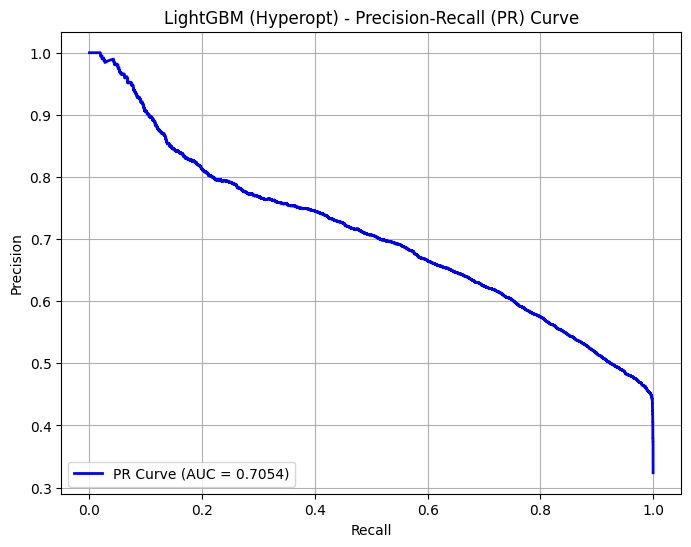

XGBoost - Accuracy: 0.7590, ROC AUC: 0.8346


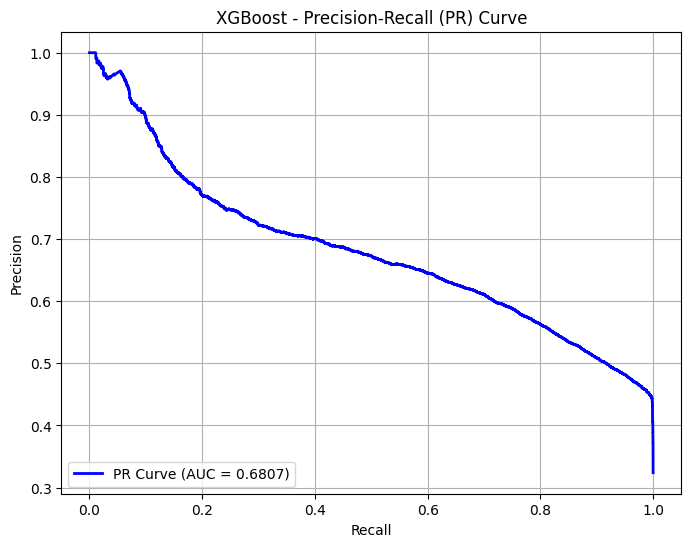

100%|██████████| 10/10 [00:27<00:00,  2.77s/trial, best loss: -0.841869243891642]


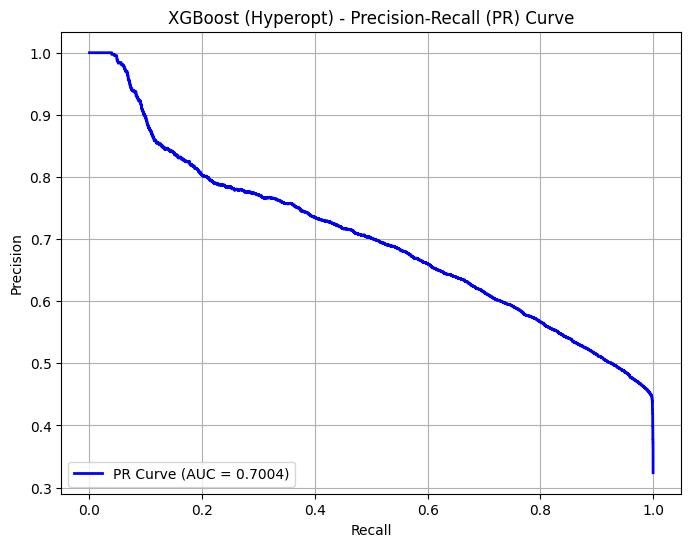

                        Model  Accuracy   ROC AUC  Test Precision    Recall        F1    PR AUC
0     Base_LogisticRegression  0.725938  0.803863        0.554531  0.781374  0.648693  0.585279
1           Base_DecisionTree  0.685227  0.615953        0.517125  0.422171  0.464848  0.557034
2        Base_LogReg_pipeline  0.725938  0.803942        0.554489  0.781924  0.648854  0.585643
3  Base_DecisionTree_pipeline  0.694674  0.629902        0.534024  0.448371  0.487463  0.574993
4               Base_CatBoost  0.761193  0.832816        0.703186  0.454315  0.551996  0.689537
5               Hard_CatBoost  0.732425  0.836825        0.561641  0.791391  0.657010  0.689701
6                    LightGBM  0.739840  0.837117        0.571167  0.788970  0.662629  0.690339
7         LightGBM (Hyperopt)  0.748182  0.845745        0.582991  0.781044  0.667639  0.705442
8                     XGBoost  0.758983  0.834556        0.670533  0.502752  0.574646  0.680728
9          XGBoost (Hyperopt)  0.752602 

Model             LightGBM (Hyperopt)
Accuracy                     0.748182
ROC AUC                      0.845745
Test Precision               0.582991
Recall                       0.781044
F1                           0.667639
PR AUC                       0.705442
Name: 7, dtype: object

Выбран ТТ: 7164ДС_Чермянская5
is_back
0    62128
1    33745
Name: count, dtype: int64
1.8411023855385984
Оценка моделей для DS: 7164


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


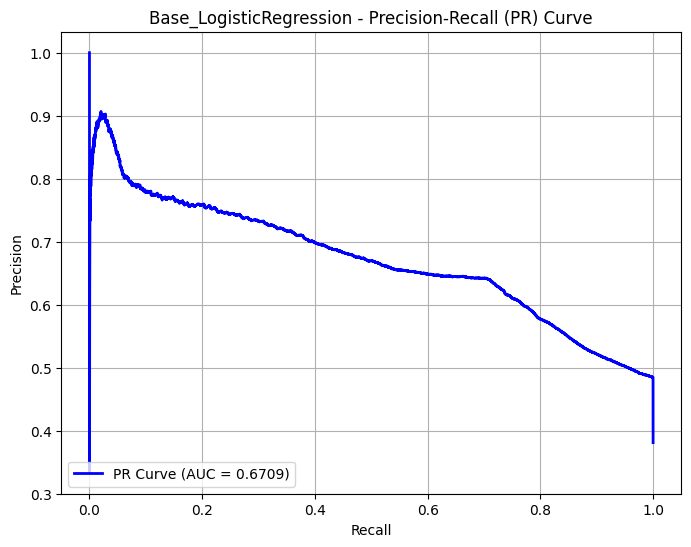

C:\Users\111\AppData\Local\Temp\ipykernel_22392\2544303988.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


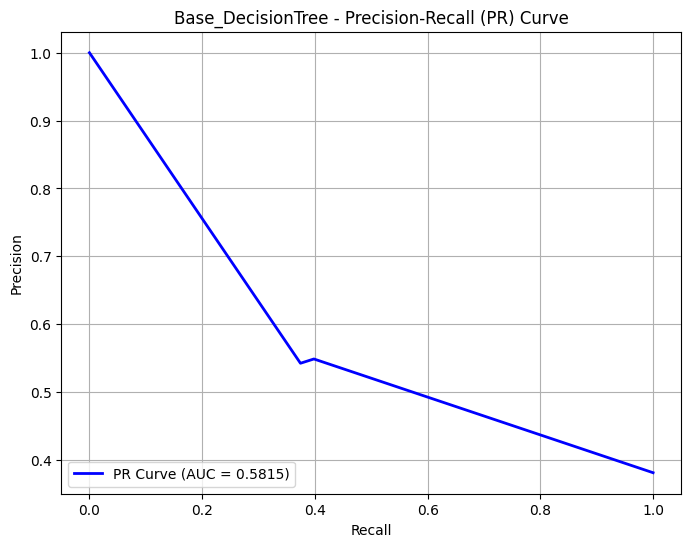

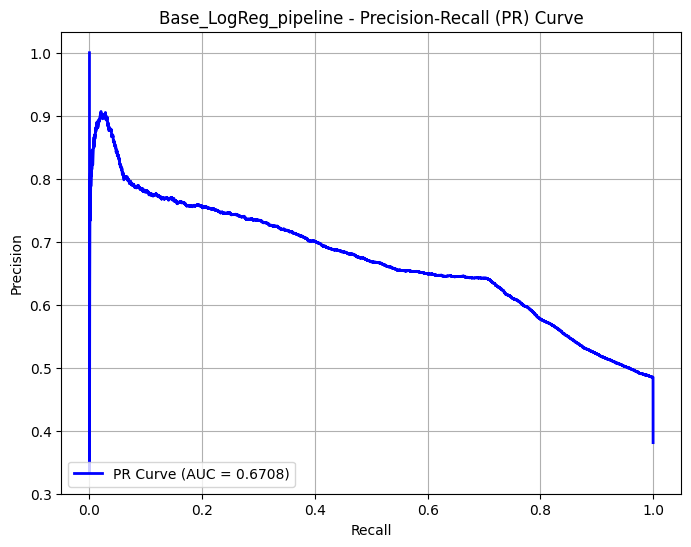

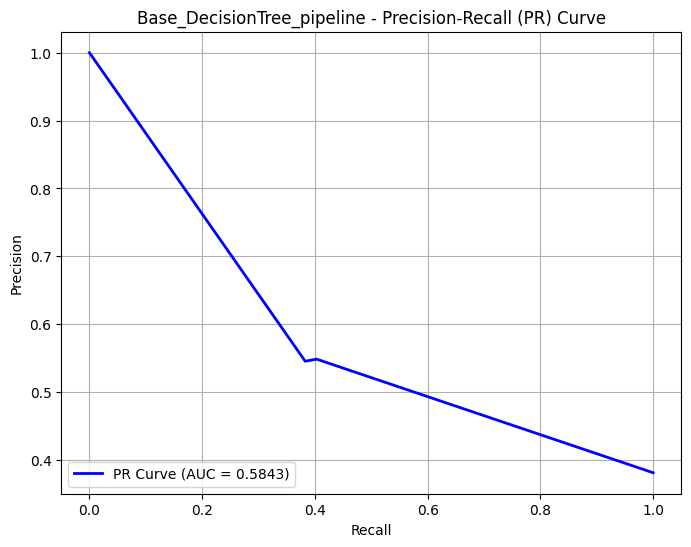

0:	learn: 0.6163875	total: 78.2ms	remaining: 1m 18s
100:	learn: 0.4404786	total: 8.3s	remaining: 1m 13s
200:	learn: 0.4247752	total: 15.8s	remaining: 1m 2s
300:	learn: 0.4144952	total: 24.6s	remaining: 57s
400:	learn: 0.4071042	total: 31.8s	remaining: 47.5s
500:	learn: 0.4015049	total: 39.4s	remaining: 39.3s
600:	learn: 0.3965918	total: 48s	remaining: 31.9s
700:	learn: 0.3921085	total: 57.2s	remaining: 24.4s
800:	learn: 0.3882724	total: 1m 7s	remaining: 16.8s
900:	learn: 0.3848112	total: 1m 17s	remaining: 8.57s
999:	learn: 0.3811642	total: 1m 26s	remaining: 0us


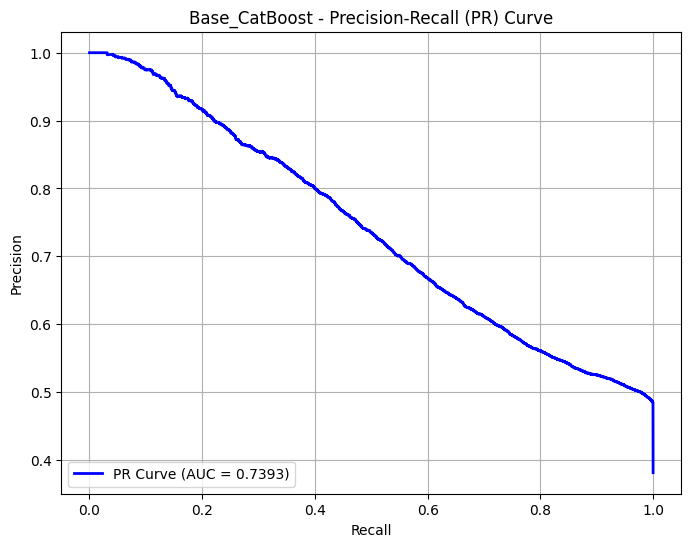

[I 2025-03-04 12:15:58,399] A new study created in memory with name: no-name-f87acc9f-acfb-49df-831c-8a7ccd903b5b
[I 2025-03-04 12:16:05,147] Trial 0 finished with value: 0.8479364027309233 and parameters: {'iterations': 450, 'learning_rate': 0.10014940638334094, 'depth': 5, 'l2_leaf_reg': 2.406291044019712, 'border_count': 62, 'random_strength': 0.924139349984236, 'bagging_temperature': 0.5618085218044085, 'subsample': 0.8334179855889576}. Best is trial 0 with value: 0.8479364027309233.


0:	learn: 0.6329694	test: 0.6299028	best: 0.6299028 (0)	total: 71ms	remaining: 31.9s
1:	learn: 0.5945158	test: 0.5895923	best: 0.5895923 (1)	total: 136ms	remaining: 30.5s
2:	learn: 0.5678895	test: 0.5590077	best: 0.5590077 (2)	total: 203ms	remaining: 30.2s
3:	learn: 0.5512512	test: 0.5387342	best: 0.5387342 (3)	total: 264ms	remaining: 29.4s
4:	learn: 0.5396328	test: 0.5258985	best: 0.5258985 (4)	total: 333ms	remaining: 29.6s
5:	learn: 0.5350380	test: 0.5196712	best: 0.5196712 (5)	total: 380ms	remaining: 28.1s
6:	learn: 0.5273459	test: 0.5102119	best: 0.5102119 (6)	total: 449ms	remaining: 28.4s
7:	learn: 0.5240676	test: 0.5065496	best: 0.5065496 (7)	total: 512ms	remaining: 28.3s
8:	learn: 0.5213202	test: 0.5027349	best: 0.5027349 (8)	total: 579ms	remaining: 28.4s
9:	learn: 0.5178611	test: 0.4965806	best: 0.4965806 (9)	total: 651ms	remaining: 28.6s
10:	learn: 0.5156763	test: 0.4944947	best: 0.4944947 (10)	total: 716ms	remaining: 28.6s
11:	learn: 0.5136974	test: 0.4919844	best: 0.4919844 

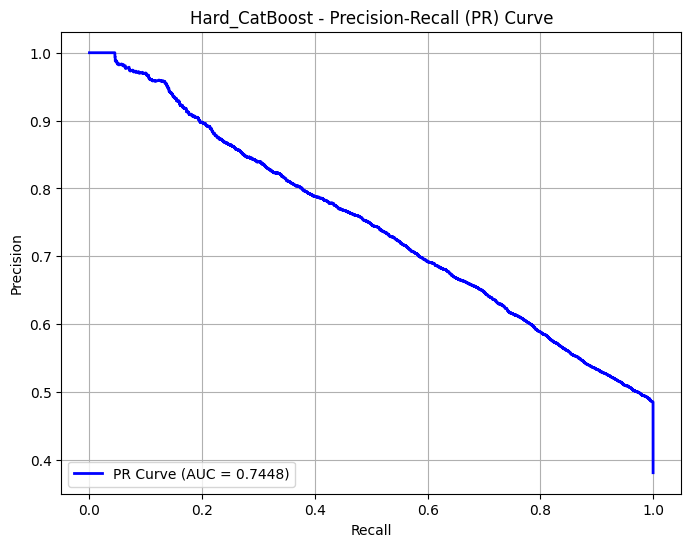

Fitting 2 folds for each of 24 candidates, totalling 48 fits


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in D

LightGBM - Accuracy: 0.7573, ROC AUC: 0.8297
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31}


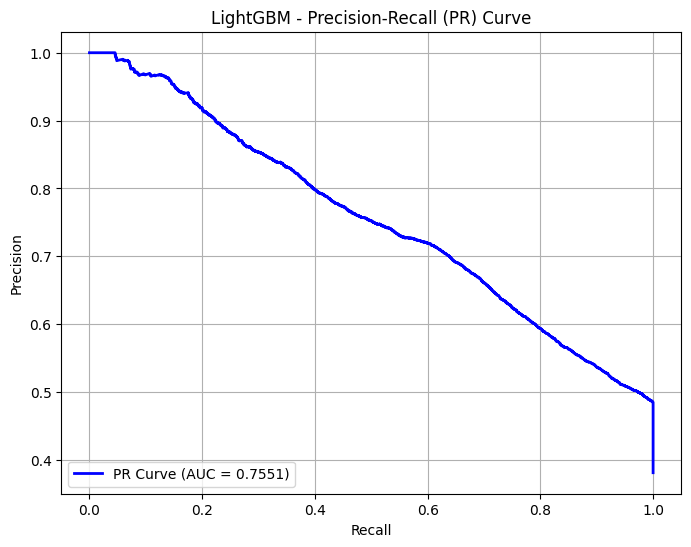

[LightGBM] [Warning] lambda_l1 is set=3.9117518697662375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9117518697662375
[LightGBM] [Warning] lambda_l2 is set=2.3019414988690694, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3019414988690694
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.844465706357334, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.844465706357334
[LightGBM] [Warning] lambda_l2 is set=3.910725201860654, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.910725201860654
 10%|█         | 1/10 [00:00<00:04,  2.19trial/s, best loss: -0.8614248392282959]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.24740196076529108, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.24740196076529108
[LightGBM] [Warning] lambda_l2 is set=1.217650643375992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.217650643375992
 30%|███       | 3/10 [00:01<00:03,  2.25trial/s, best loss: -0.8618546802429439]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=1.545979816251184, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.545979816251184
[LightGBM] [Warning] lambda_l2 is set=2.3658711701798545, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3658711701798545
 30%|███       | 3/10 [00:01<00:03,  2.25trial/s, best loss: -0.8618546802429439]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.060603879222424, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.060603879222424
[LightGBM] [Warning] lambda_l2 is set=1.8660547454099297, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8660547454099297
 40%|████      | 4/10 [00:01<00:02,  2.14trial/s, best loss: -0.8618546802429439]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=1.39659113529292, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.39659113529292
[LightGBM] [Warning] lambda_l2 is set=2.44782494972005, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.44782494972005
 50%|█████     | 5/10 [00:02<00:02,  2.05trial/s, best loss: -0.8618546802429439]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=1.8085749241757738, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8085749241757738
[LightGBM] [Warning] lambda_l2 is set=3.5230358625336105, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.5230358625336105
 60%|██████    | 6/10 [00:03<00:02,  1.64trial/s, best loss: -0.8618546802429439]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.725585536320713, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.725585536320713
[LightGBM] [Warning] lambda_l2 is set=0.8810269957066919, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8810269957066919
 70%|███████   | 7/10 [00:03<00:01,  1.70trial/s, best loss: -0.8618546802429439]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.7748565736083157, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7748565736083157
[LightGBM] [Warning] lambda_l2 is set=3.5596939123529525, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.5596939123529525
 90%|█████████ | 9/10 [00:04<00:00,  2.09trial/s, best loss: -0.8618546802429439]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.1080900279185872, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1080900279185872
[LightGBM] [Warning] lambda_l2 is set=0.08944312378572683, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08944312378572683
100%|██████████| 10/10 [00:04<00:00,  2.04trial/s, best loss: -0.8618546802429439]
[LightGBM] [Warning] lambda_l1 is set=4.844465706357334, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.844465706357334

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))




[LightGBM] [Warning] lambda_l2 is set=3.910725201860654, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.910725201860654


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


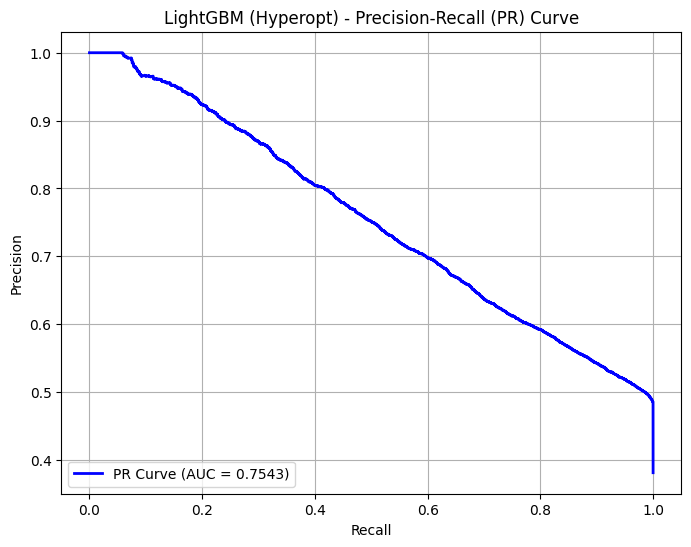

XGBoost - Accuracy: 0.7370, ROC AUC: 0.8266


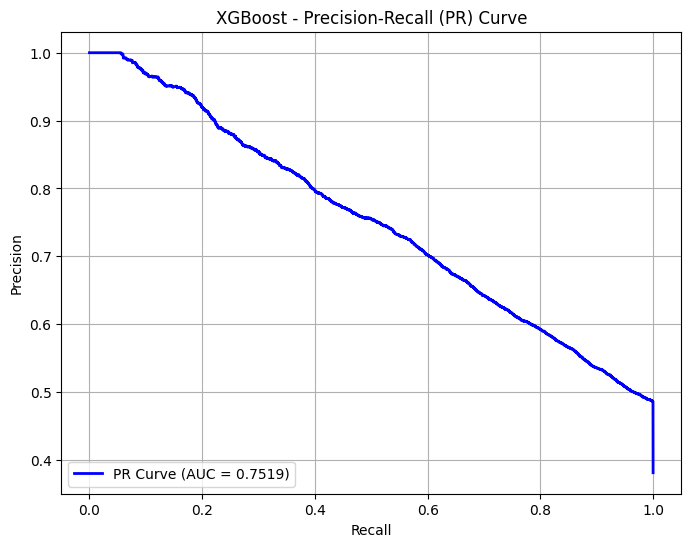

100%|██████████| 10/10 [00:21<00:00,  2.20s/trial, best loss: -0.860237039021873]


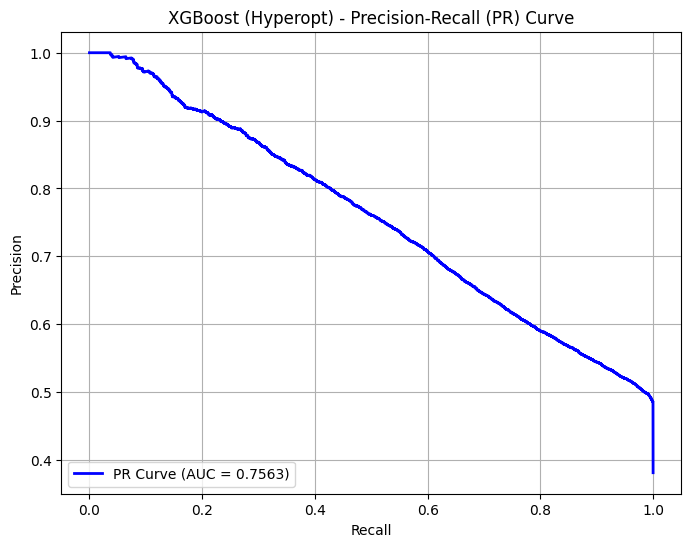

                        Model  Accuracy   ROC AUC  Test Precision    Recall        F1    PR AUC
0     Base_LogisticRegression  0.724492  0.799251        0.614038  0.745857  0.673559  0.670885
1           Base_DecisionTree  0.645858  0.597305        0.548706  0.398218  0.461504  0.581489
2        Base_LogReg_pipeline  0.724638  0.799321        0.614593  0.743941  0.673109  0.670848
3  Base_DecisionTree_pipeline  0.646041  0.598861        0.548429  0.403008  0.464605  0.584292
4               Base_CatBoost  0.733253  0.812935        0.802433  0.398027  0.532112  0.739253
5               Hard_CatBoost  0.743767  0.824111        0.669508  0.646997  0.658060  0.744751
6                    LightGBM  0.757310  0.829742        0.697427  0.641441  0.668263  0.755068
7         LightGBM (Hyperopt)  0.744314  0.828389        0.668597  0.652457  0.660429  0.754305
8                     XGBoost  0.736977  0.826577        0.778217  0.433279  0.556643  0.751875
9          XGBoost (Hyperopt)  0.747235 

Model             XGBoost (Hyperopt)
Accuracy                    0.747235
ROC AUC                     0.830765
Test Precision              0.675768
Recall                      0.647284
F1                          0.661219
PR AUC                      0.756285
Name: 9, dtype: object

Выбран ТТ: 6038ДС_Рублевское48
is_back
0    80869
1    58393
Name: count, dtype: int64
1.3849091500693576
Оценка моделей для DS: 6038


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


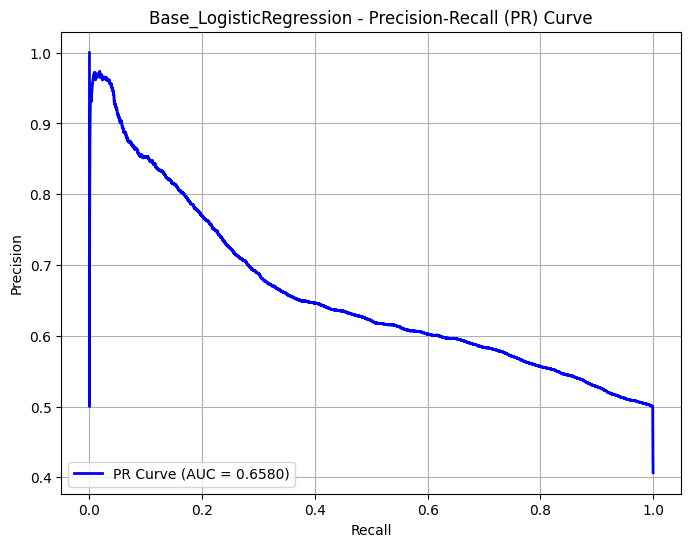

C:\Users\111\AppData\Local\Temp\ipykernel_22392\2544303988.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


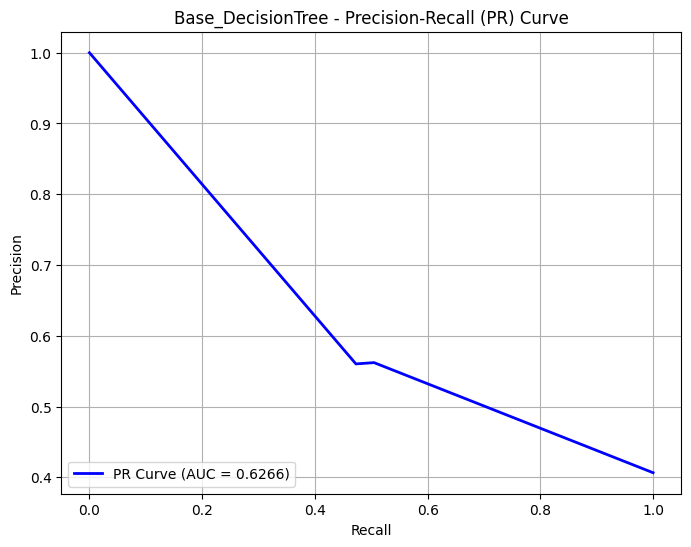

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


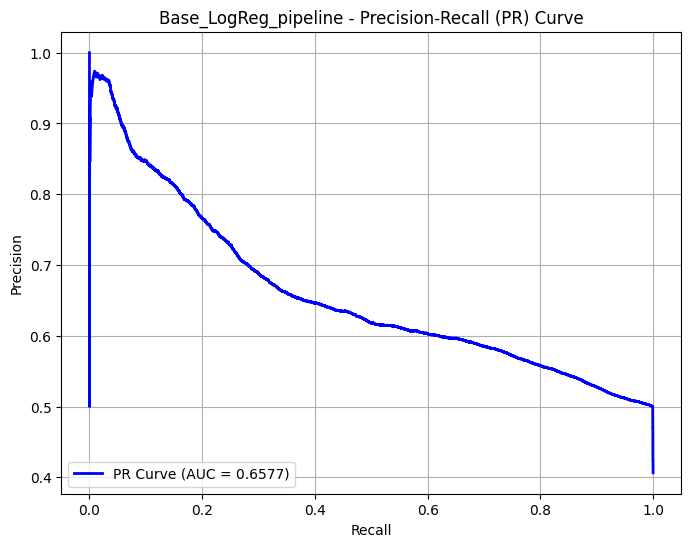

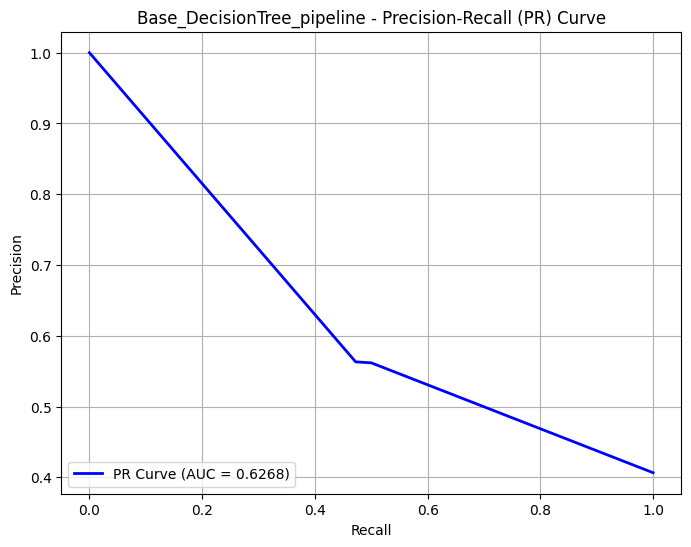

0:	learn: 0.6271113	total: 80ms	remaining: 1m 19s
100:	learn: 0.4552211	total: 8.91s	remaining: 1m 19s
200:	learn: 0.4415777	total: 17.9s	remaining: 1m 11s
300:	learn: 0.4340820	total: 27.5s	remaining: 1m 3s
400:	learn: 0.4280970	total: 36.8s	remaining: 54.9s
500:	learn: 0.4235821	total: 46.1s	remaining: 45.9s
600:	learn: 0.4198327	total: 55.7s	remaining: 37s
700:	learn: 0.4163368	total: 1m 5s	remaining: 27.9s
800:	learn: 0.4131534	total: 1m 14s	remaining: 18.6s
900:	learn: 0.4103701	total: 1m 23s	remaining: 9.2s
999:	learn: 0.4077667	total: 1m 33s	remaining: 0us


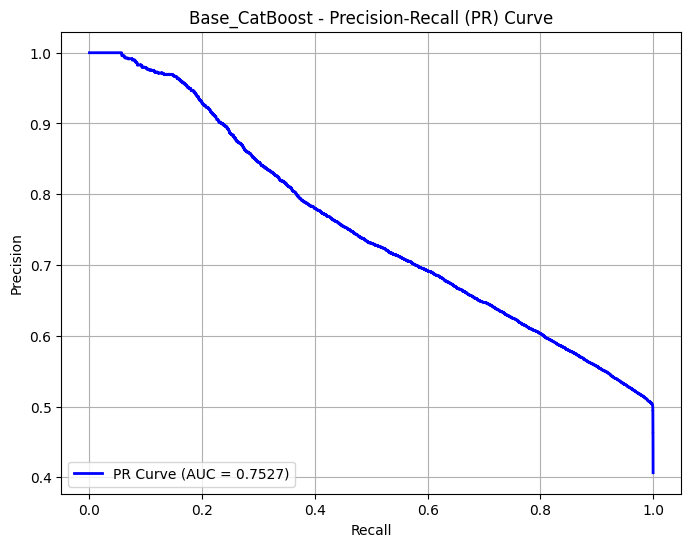

[I 2025-03-04 12:19:47,936] A new study created in memory with name: no-name-56ad8a69-f847-4e1d-95a3-18e7bb04bede
[I 2025-03-04 12:20:10,546] Trial 0 finished with value: 0.7999311193822137 and parameters: {'iterations': 450, 'learning_rate': 0.01804518828571018, 'depth': 4, 'l2_leaf_reg': 1.3094844736491322, 'border_count': 53, 'random_strength': 0.6966346150721648, 'bagging_temperature': 0.641951778951415, 'subsample': 0.8080351735181208}. Best is trial 0 with value: 0.7999311193822137.


0:	learn: 0.6813833	test: 0.6814322	best: 0.6814322 (0)	total: 72.9ms	remaining: 32.8s
1:	learn: 0.6706469	test: 0.6707075	best: 0.6707075 (1)	total: 133ms	remaining: 29.9s
2:	learn: 0.6607115	test: 0.6608376	best: 0.6608376 (2)	total: 202ms	remaining: 30.1s
3:	learn: 0.6516749	test: 0.6518276	best: 0.6518276 (3)	total: 276ms	remaining: 30.8s
4:	learn: 0.6429827	test: 0.6432823	best: 0.6432823 (4)	total: 363ms	remaining: 32.3s
5:	learn: 0.6347939	test: 0.6352599	best: 0.6352599 (5)	total: 433ms	remaining: 32s
6:	learn: 0.6273141	test: 0.6279479	best: 0.6279479 (6)	total: 499ms	remaining: 31.6s
7:	learn: 0.6201445	test: 0.6209166	best: 0.6209166 (7)	total: 566ms	remaining: 31.3s
8:	learn: 0.6137450	test: 0.6146749	best: 0.6146749 (8)	total: 629ms	remaining: 30.8s
9:	learn: 0.6076810	test: 0.6087407	best: 0.6087407 (9)	total: 698ms	remaining: 30.7s
10:	learn: 0.6022828	test: 0.6038929	best: 0.6038929 (10)	total: 767ms	remaining: 30.6s
11:	learn: 0.5972489	test: 0.5990769	best: 0.5990769 

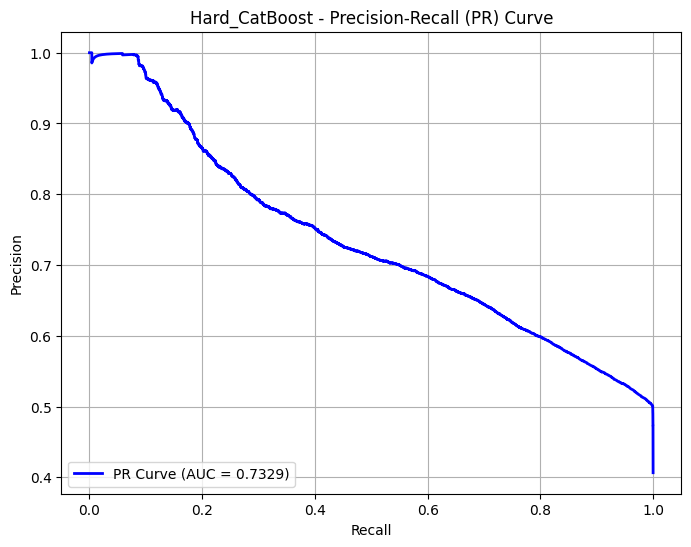

Fitting 2 folds for each of 24 candidates, totalling 48 fits


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in D

LightGBM - Accuracy: 0.7057, ROC AUC: 0.7977
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 50}


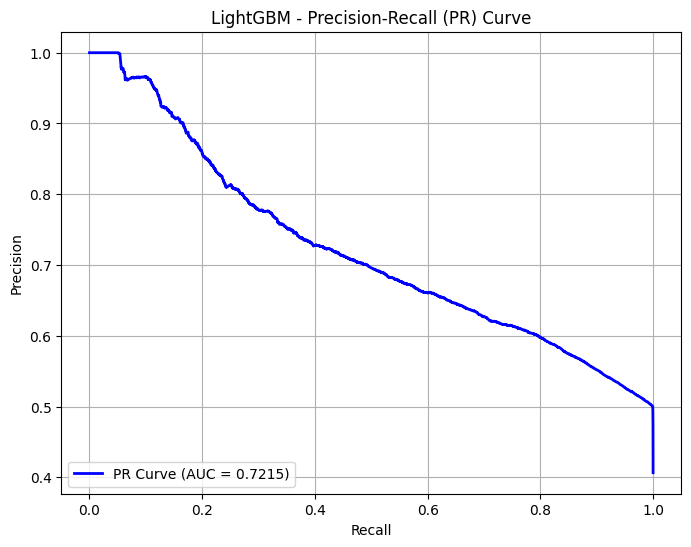

[LightGBM] [Warning] lambda_l1 is set=0.9116607244578034, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9116607244578034
[LightGBM] [Warning] lambda_l2 is set=1.8755626246694916, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8755626246694916
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.6807296788281914, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6807296788281914
[LightGBM] [Warning] lambda_l2 is set=4.642255265351622, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.642255265351622
 10%|█         | 1/10 [00:00<00:05,  1.67trial/s, best loss: -0.8182135406972044]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.9915609439659017, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9915609439659017
[LightGBM] [Warning] lambda_l2 is set=1.0679192346252298, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0679192346252298
 20%|██        | 2/10 [00:02<00:08,  1.12s/trial, best loss: -0.8210133477918352]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.9955673174747393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9955673174747393
[LightGBM] [Warning] lambda_l2 is set=0.7734832568718203, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7734832568718203
 30%|███       | 3/10 [00:03<00:08,  1.14s/trial, best loss: -0.8210133477918352]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.1953520320876203, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1953520320876203
[LightGBM] [Warning] lambda_l2 is set=4.4116669388355705, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.4116669388355705
 40%|████      | 4/10 [00:04<00:07,  1.23s/trial, best loss: -0.8222477964415916]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.8713513804199824, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.8713513804199824
[LightGBM] [Warning] lambda_l2 is set=1.8970846375927346, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8970846375927346
 50%|█████     | 5/10 [00:05<00:06,  1.22s/trial, best loss: -0.8222477964415916]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.997128213456533, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.997128213456533
[LightGBM] [Warning] lambda_l2 is set=3.0169327031650504, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0169327031650504
 60%|██████    | 6/10 [00:06<00:04,  1.11s/trial, best loss: -0.8222477964415916]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=1.6028706670991189, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6028706670991189
[LightGBM] [Warning] lambda_l2 is set=2.619819734764002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.619819734764002
 70%|███████   | 7/10 [00:07<00:02,  1.09trial/s, best loss: -0.8222477964415916]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.2163998489809105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.2163998489809105
[LightGBM] [Warning] lambda_l2 is set=3.247435667382859, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.247435667382859
 80%|████████  | 8/10 [00:09<00:02,  1.34s/trial, best loss: -0.8222477964415916]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.923062220282577, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.923062220282577
[LightGBM] [Warning] lambda_l2 is set=4.250121099976097, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.250121099976097
 90%|█████████ | 9/10 [00:10<00:01,  1.21s/trial, best loss: -0.8222477964415916]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



100%|██████████| 10/10 [00:10<00:00,  1.09s/trial, best loss: -0.8222477964415916]
[LightGBM] [Warning] lambda_l1 is set=0.9955673174747393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9955673174747393
[LightGBM] [Warning] lambda_l2 is set=0.7734832568718203, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7734832568718203


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


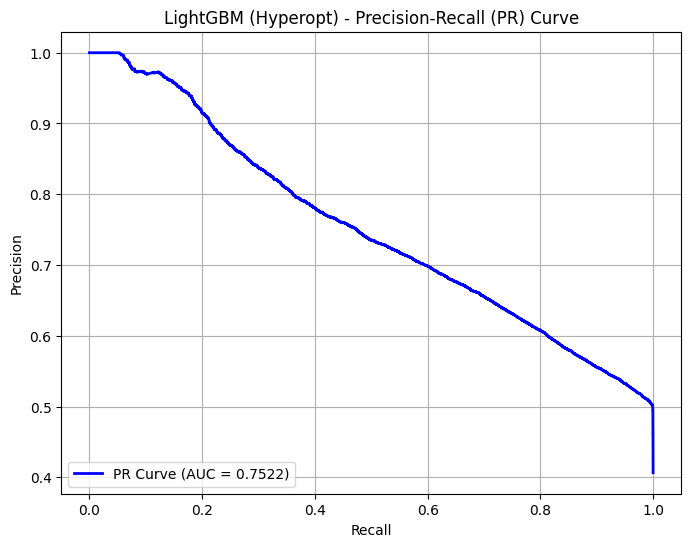

XGBoost - Accuracy: 0.7268, ROC AUC: 0.8075


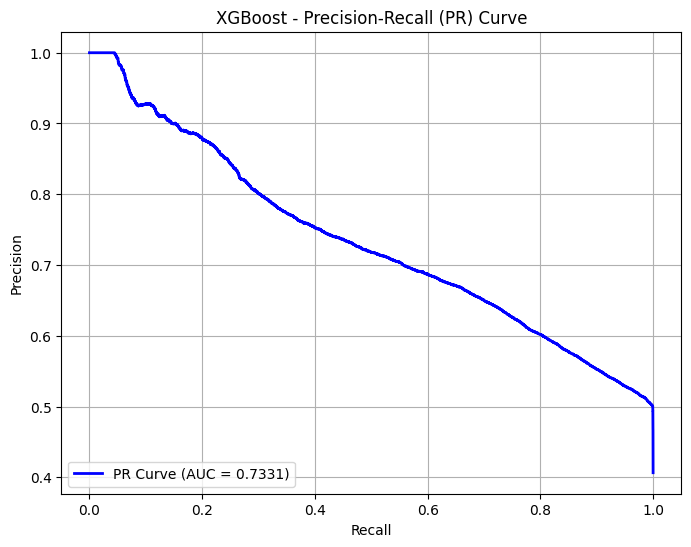

100%|██████████| 10/10 [00:31<00:00,  3.13s/trial, best loss: -0.8198175013678232]


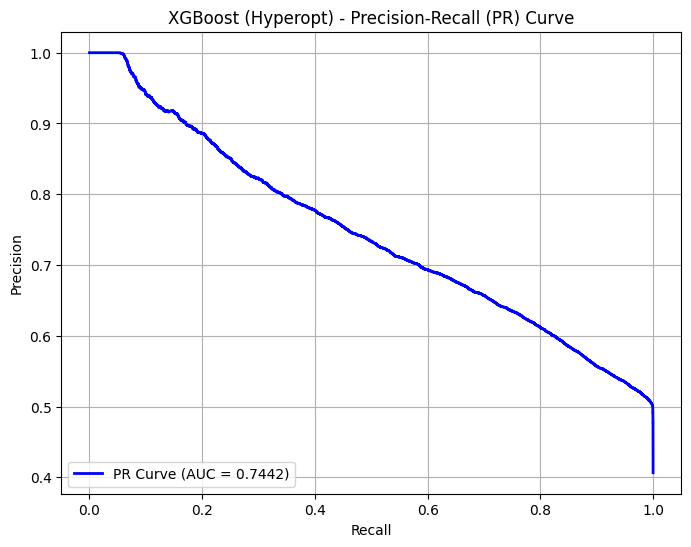

                        Model  Accuracy   ROC AUC  Test Precision    Recall        F1    PR AUC
0     Base_LogisticRegression  0.667035  0.756378        0.567268  0.762320  0.650487  0.658002
1           Base_DecisionTree  0.638863  0.617279        0.562048  0.504916  0.531952  0.626595
2        Base_LogReg_pipeline  0.667488  0.756552        0.567273  0.766957  0.652173  0.657703
3  Base_DecisionTree_pipeline  0.638210  0.616834        0.561689  0.500216  0.529173  0.626761
4               Base_CatBoost  0.728054  0.813214        0.699078  0.581030  0.634611  0.752690
5               Hard_CatBoost  0.710764  0.805127        0.619125  0.749397  0.678061  0.732915
6                    LightGBM  0.705712  0.797686        0.610476  0.762444  0.678049  0.721503
7         LightGBM (Hyperopt)  0.727753  0.815058        0.652694  0.705682  0.678154  0.752169
8                     XGBoost  0.726848  0.807496        0.679359  0.621097  0.648923  0.733116
9          XGBoost (Hyperopt)  0.727426 

Model             Base_CatBoost
Accuracy               0.728054
ROC AUC                0.813214
Test Precision         0.699078
Recall                  0.58103
F1                     0.634611
PR AUC                  0.75269
Name: 4, dtype: object

Выбран ТТ: 4835ДС_ЛефортовскийВал26
is_back
0    95815
1    47726
Name: count, dtype: int64
2.0076059171101703
Оценка моделей для DS: 4835


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


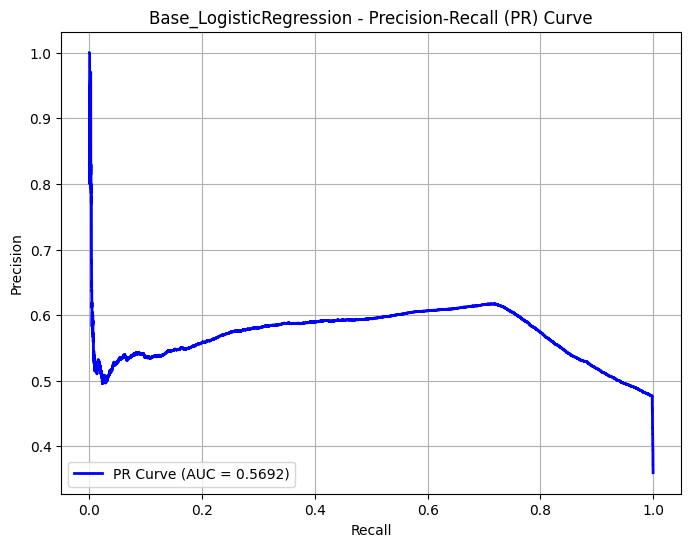

C:\Users\111\AppData\Local\Temp\ipykernel_22392\2544303988.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


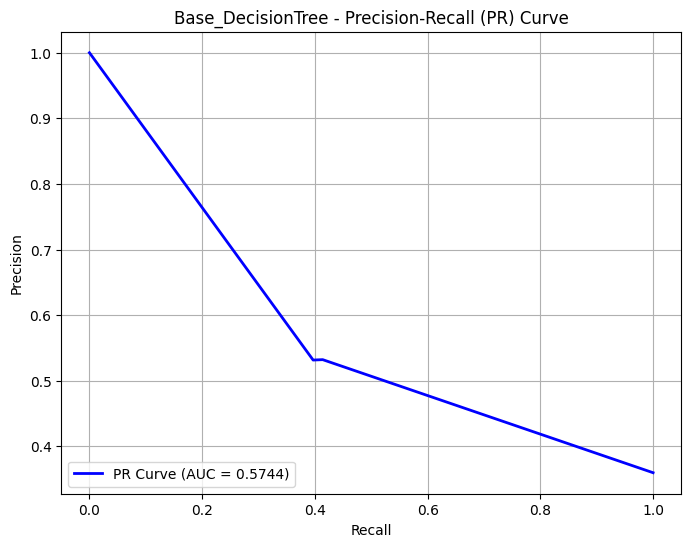

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


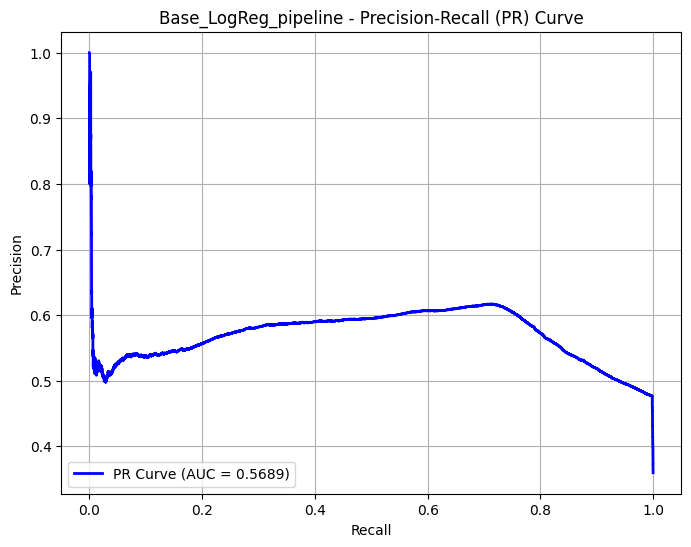

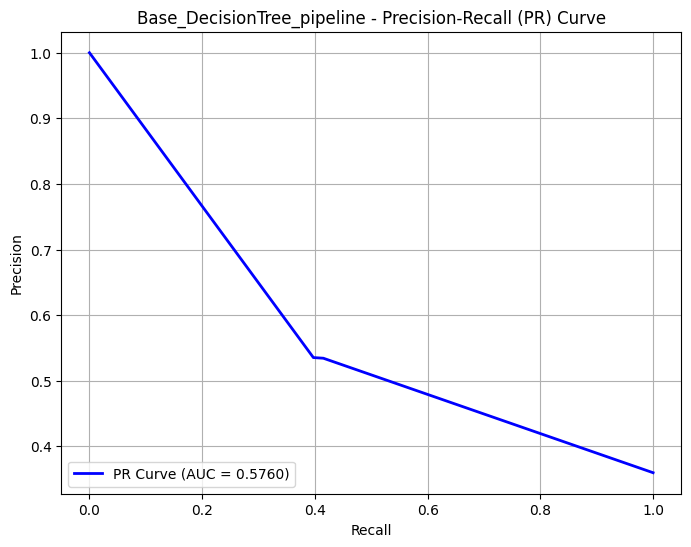

0:	learn: 0.6134851	total: 85ms	remaining: 1m 24s
100:	learn: 0.4292383	total: 9.87s	remaining: 1m 27s
200:	learn: 0.4166789	total: 20s	remaining: 1m 19s
300:	learn: 0.4090709	total: 29.6s	remaining: 1m 8s
400:	learn: 0.4038302	total: 39.9s	remaining: 59.6s
500:	learn: 0.3997698	total: 49.8s	remaining: 49.6s
600:	learn: 0.3964235	total: 59.7s	remaining: 39.6s
700:	learn: 0.3930569	total: 1m 9s	remaining: 29.6s
800:	learn: 0.3898693	total: 1m 18s	remaining: 19.6s
900:	learn: 0.3871835	total: 1m 29s	remaining: 9.79s
999:	learn: 0.3846654	total: 1m 38s	remaining: 0us


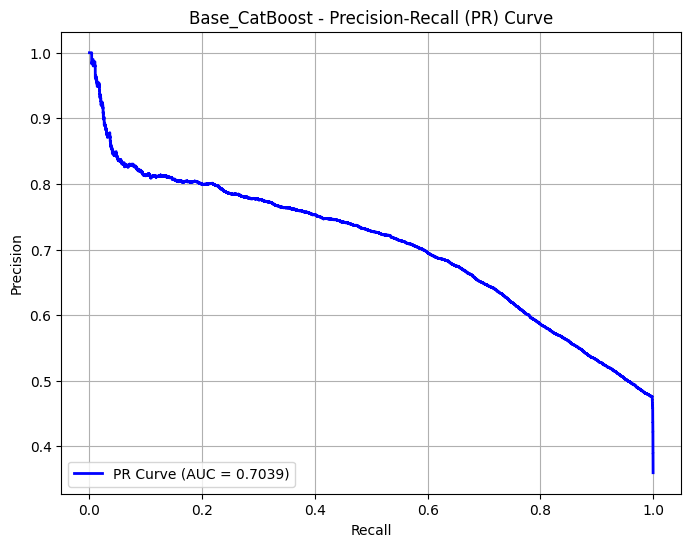

[I 2025-03-04 12:24:50,683] A new study created in memory with name: no-name-5eb09d25-a0f3-4c06-bf53-d0443469db31
[I 2025-03-04 12:25:01,211] Trial 0 finished with value: 0.8269728960694234 and parameters: {'iterations': 300, 'learning_rate': 0.15543353298799947, 'depth': 4, 'l2_leaf_reg': 1.2776621322332367, 'border_count': 48, 'random_strength': 0.6740056943459094, 'bagging_temperature': 0.17228726866797237, 'subsample': 0.7048183798364352}. Best is trial 0 with value: 0.8269728960694234.


0:	learn: 0.6091284	test: 0.6151207	best: 0.6151207 (0)	total: 70.6ms	remaining: 21.1s
1:	learn: 0.5624144	test: 0.5736300	best: 0.5736300 (1)	total: 140ms	remaining: 20.9s
2:	learn: 0.5398189	test: 0.5506864	best: 0.5506864 (2)	total: 198ms	remaining: 19.6s
3:	learn: 0.5270988	test: 0.5429482	best: 0.5429482 (3)	total: 264ms	remaining: 19.5s
4:	learn: 0.5142432	test: 0.5301303	best: 0.5301303 (4)	total: 336ms	remaining: 19.8s
5:	learn: 0.5091358	test: 0.5245062	best: 0.5245062 (5)	total: 405ms	remaining: 19.9s
6:	learn: 0.5057554	test: 0.5214074	best: 0.5214074 (6)	total: 478ms	remaining: 20s
7:	learn: 0.5001655	test: 0.5163843	best: 0.5163843 (7)	total: 543ms	remaining: 19.8s
8:	learn: 0.4965209	test: 0.5146770	best: 0.5146770 (8)	total: 626ms	remaining: 20.3s
9:	learn: 0.4950339	test: 0.5128603	best: 0.5128603 (9)	total: 697ms	remaining: 20.2s
10:	learn: 0.4931931	test: 0.5108701	best: 0.5108701 (10)	total: 761ms	remaining: 20s
11:	learn: 0.4919985	test: 0.5094695	best: 0.5094695 (1

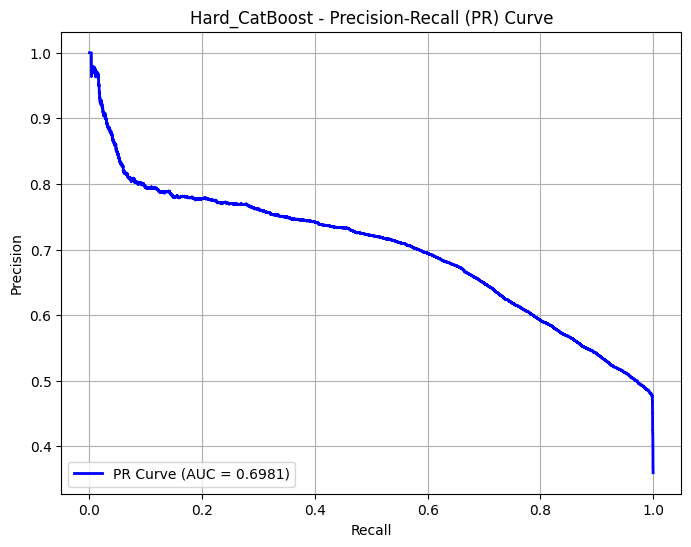

Fitting 2 folds for each of 24 candidates, totalling 48 fits


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in D

LightGBM - Accuracy: 0.7381, ROC AUC: 0.8216
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 31}


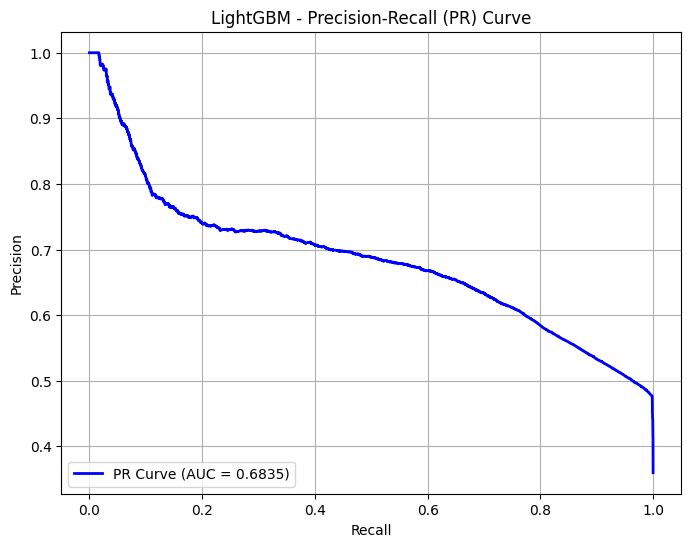

[LightGBM] [Warning] lambda_l1 is set=1.7072033624701655, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7072033624701655
[LightGBM] [Warning] lambda_l2 is set=0.253518431136609, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.253518431136609
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.057295778678516096, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.057295778678516096
[LightGBM] [Warning] lambda_l2 is set=4.781402540415042, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.781402540415042
 10%|█         | 1/10 [00:00<00:05,  1.70trial/s, best loss: -0.8087245370024415]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.847860588622758, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.847860588622758
[LightGBM] [Warning] lambda_l2 is set=4.133535387800859, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.133535387800859
 30%|███       | 3/10 [00:01<00:03,  1.82trial/s, best loss: -0.8165531392531986]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.8083515348092951, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8083515348092951
[LightGBM] [Warning] lambda_l2 is set=0.13667422734341794, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13667422734341794
 30%|███       | 3/10 [00:01<00:03,  1.82trial/s, best loss: -0.8165531392531986]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.8857590950002553, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8857590950002553
[LightGBM] [Warning] lambda_l2 is set=2.432141683448239, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.432141683448239
 40%|████      | 4/10 [00:02<00:03,  1.60trial/s, best loss: -0.8189340220836689]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.01255481888189, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.01255481888189
[LightGBM] [Warning] lambda_l2 is set=0.1745273522444657, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1745273522444657
 50%|█████     | 5/10 [00:03<00:04,  1.12trial/s, best loss: -0.8189340220836689]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.171434556744148, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.171434556744148
[LightGBM] [Warning] lambda_l2 is set=4.872069452095063, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.872069452095063
 60%|██████    | 6/10 [00:06<00:05,  1.29s/trial, best loss: -0.8241834902812745]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.4722884459175996, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.4722884459175996
[LightGBM] [Warning] lambda_l2 is set=0.19394185464746305, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19394185464746305
 70%|███████   | 7/10 [00:07<00:04,  1.49s/trial, best loss: -0.8241834902812745]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.508465513387666, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.508465513387666
[LightGBM] [Warning] lambda_l2 is set=3.7923379690719434, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7923379690719434
 80%|████████  | 8/10 [00:08<00:02,  1.26s/trial, best loss: -0.8241834902812745]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.200529441418634, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.200529441418634
[LightGBM] [Warning] lambda_l2 is set=4.457504167261035, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.457504167261035
 90%|█████████ | 9/10 [00:09<00:01,  1.16s/trial, best loss: -0.8241834902812745]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



100%|██████████| 10/10 [00:10<00:00,  1.08s/trial, best loss: -0.8241834902812745]
[LightGBM] [Warning] lambda_l1 is set=2.01255481888189, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.01255481888189
[LightGBM] [Warning] lambda_l2 is set=0.1745273522444657, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1745273522444657


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


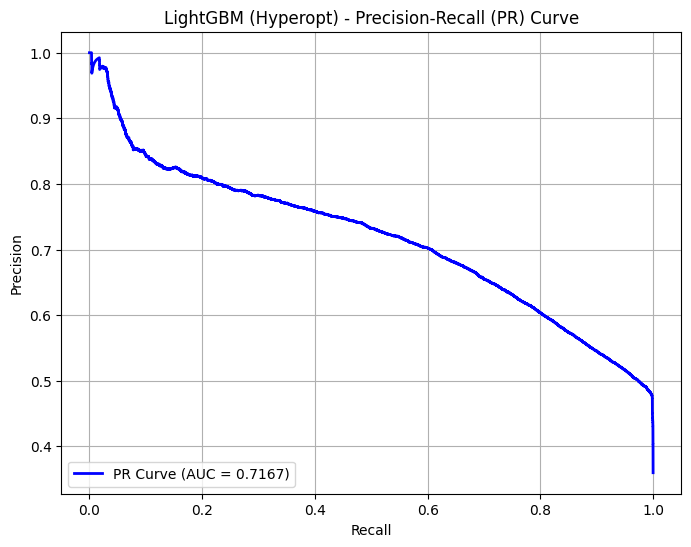

XGBoost - Accuracy: 0.7584, ROC AUC: 0.8341


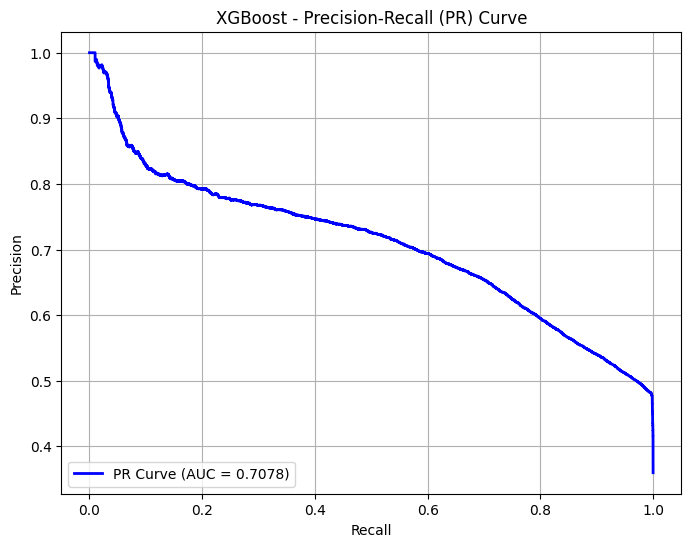

100%|██████████| 10/10 [00:32<00:00,  3.22s/trial, best loss: -0.8215921282829202]


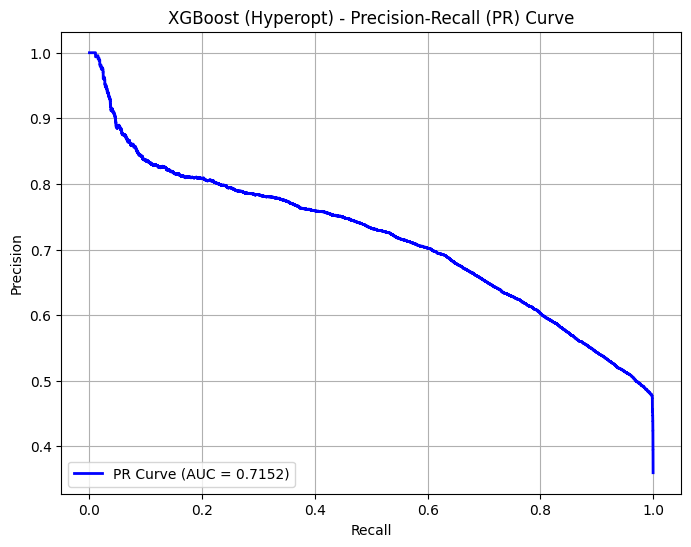

                        Model  Accuracy   ROC AUC  Test Precision    Recall        F1    PR AUC
0     Base_LogisticRegression  0.733475  0.782149        0.604579  0.749712  0.669369  0.569160
1           Base_DecisionTree  0.658157  0.604558        0.532200  0.413781  0.465579  0.574380
2        Base_LogReg_pipeline  0.733719  0.781981        0.604875  0.749915  0.669631  0.568937
3  Base_DecisionTree_pipeline  0.659352  0.606007        0.534380  0.414933  0.467142  0.576020
4               Base_CatBoost  0.758491  0.831461        0.714589  0.547598  0.620047  0.703854
5               Hard_CatBoost  0.742082  0.832311        0.614831  0.758385  0.679104  0.698126
6                    LightGBM  0.738059  0.821633        0.610064  0.754116  0.674484  0.683465
7         LightGBM (Hyperopt)  0.753078  0.838954        0.632783  0.747815  0.685507  0.716735
8                     XGBoost  0.758418  0.834131        0.704115  0.566908  0.628106  0.707783
9          XGBoost (Hyperopt)  0.750689 

Model             LightGBM (Hyperopt)
Accuracy                     0.753078
ROC AUC                      0.838954
Test Precision               0.632783
Recall                       0.747815
F1                           0.685507
PR AUC                       0.716735
Name: 7, dtype: object

Выбран ТТ: 7498ДС_Фабрициуса18
is_back
0    46674
1    32121
Name: count, dtype: int64
1.4530680862986831
Оценка моделей для DS: 7498


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


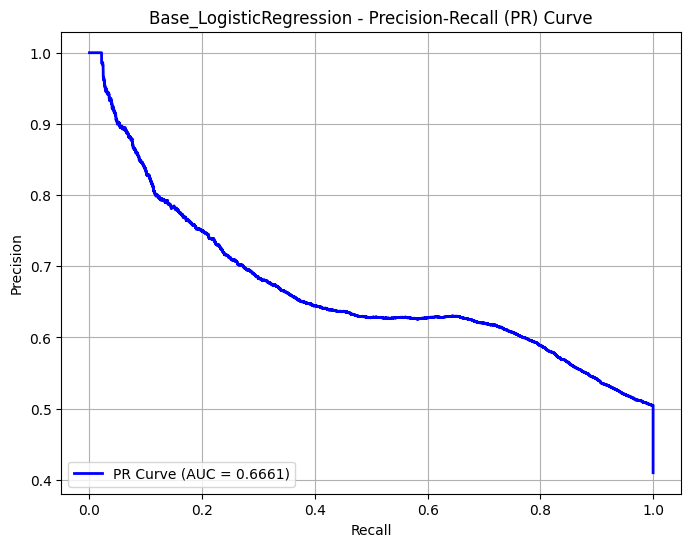

C:\Users\111\AppData\Local\Temp\ipykernel_22392\2544303988.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


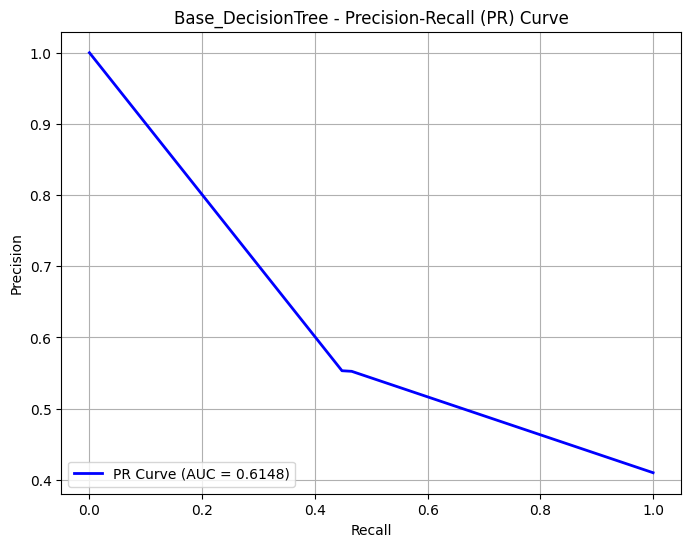

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categorie

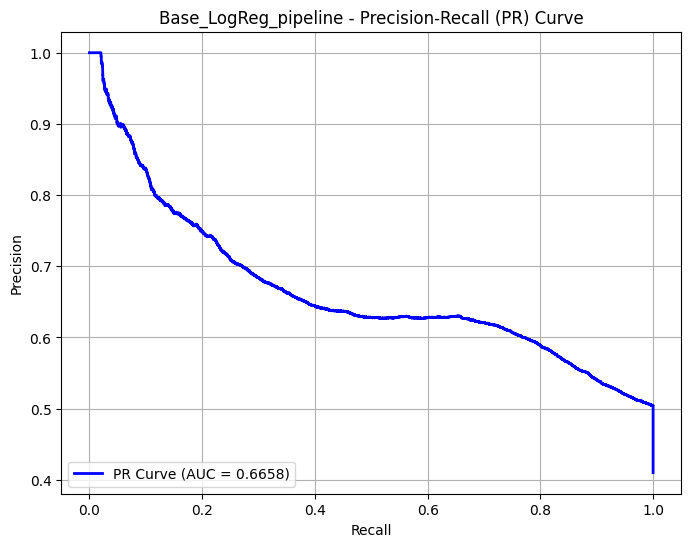

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


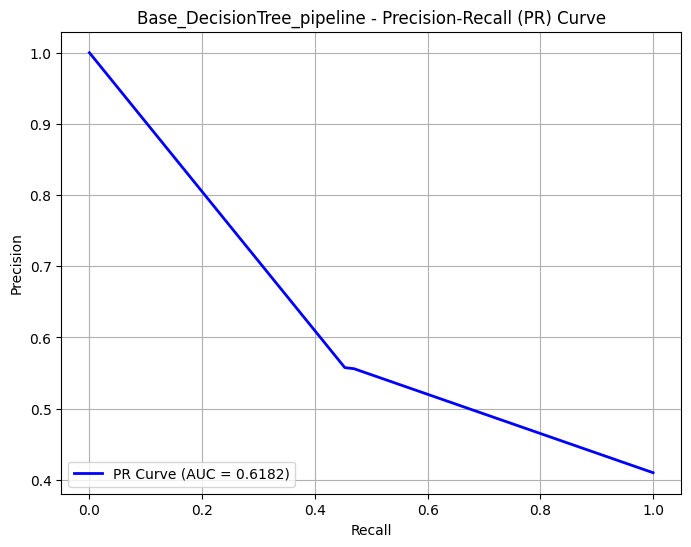

0:	learn: 0.6377572	total: 67ms	remaining: 1m 6s
100:	learn: 0.4729658	total: 6.66s	remaining: 59.2s
200:	learn: 0.4566434	total: 13.1s	remaining: 52.1s
300:	learn: 0.4463918	total: 19.7s	remaining: 45.8s
400:	learn: 0.4392320	total: 26.5s	remaining: 39.7s
500:	learn: 0.4330913	total: 33.9s	remaining: 33.7s
600:	learn: 0.4279350	total: 40.9s	remaining: 27.1s
700:	learn: 0.4234578	total: 48s	remaining: 20.5s
800:	learn: 0.4192599	total: 55.1s	remaining: 13.7s
900:	learn: 0.4152311	total: 1m 2s	remaining: 6.87s
999:	learn: 0.4116006	total: 1m 9s	remaining: 0us


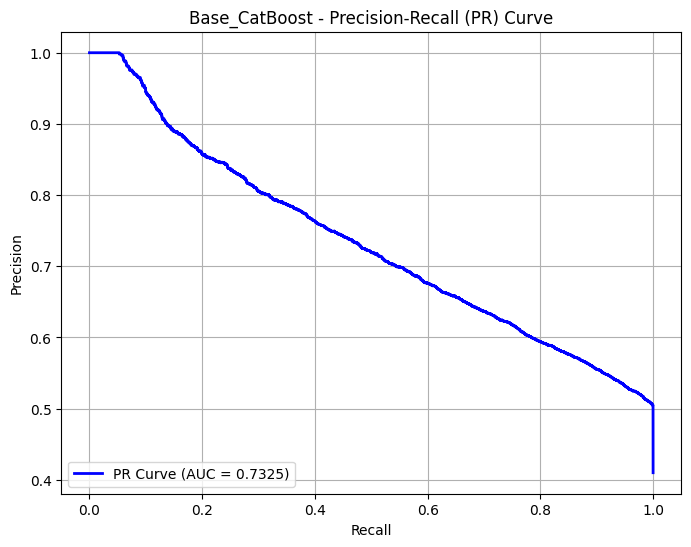

[I 2025-03-04 12:29:10,993] A new study created in memory with name: no-name-834125a4-7b25-4d58-98e3-0578874121d7
[I 2025-03-04 12:29:22,438] Trial 0 finished with value: 0.7820498333134438 and parameters: {'iterations': 300, 'learning_rate': 0.03520288132916294, 'depth': 4, 'l2_leaf_reg': 1.2976383191086844, 'border_count': 42, 'random_strength': 0.47444872405346716, 'bagging_temperature': 0.46264183752170407, 'subsample': 0.7272762718448201}. Best is trial 0 with value: 0.7820498333134438.


0:	learn: 0.6711011	test: 0.6716289	best: 0.6716289 (0)	total: 53.4ms	remaining: 16s
1:	learn: 0.6523845	test: 0.6534147	best: 0.6534147 (1)	total: 96.2ms	remaining: 14.3s
2:	learn: 0.6358800	test: 0.6375276	best: 0.6375276 (2)	total: 146ms	remaining: 14.5s
3:	learn: 0.6219041	test: 0.6240847	best: 0.6240847 (3)	total: 197ms	remaining: 14.6s
4:	learn: 0.6098755	test: 0.6126971	best: 0.6126971 (4)	total: 250ms	remaining: 14.7s
5:	learn: 0.5999325	test: 0.6034375	best: 0.6034375 (5)	total: 301ms	remaining: 14.8s
6:	learn: 0.5910471	test: 0.5951518	best: 0.5951518 (6)	total: 353ms	remaining: 14.8s
7:	learn: 0.5836187	test: 0.5884078	best: 0.5884078 (7)	total: 410ms	remaining: 15s
8:	learn: 0.5780865	test: 0.5835837	best: 0.5835837 (8)	total: 456ms	remaining: 14.7s
9:	learn: 0.5724026	test: 0.5784514	best: 0.5784514 (9)	total: 499ms	remaining: 14.5s
10:	learn: 0.5688634	test: 0.5763868	best: 0.5763868 (10)	total: 551ms	remaining: 14.5s
11:	learn: 0.5637325	test: 0.5717974	best: 0.5717974 (

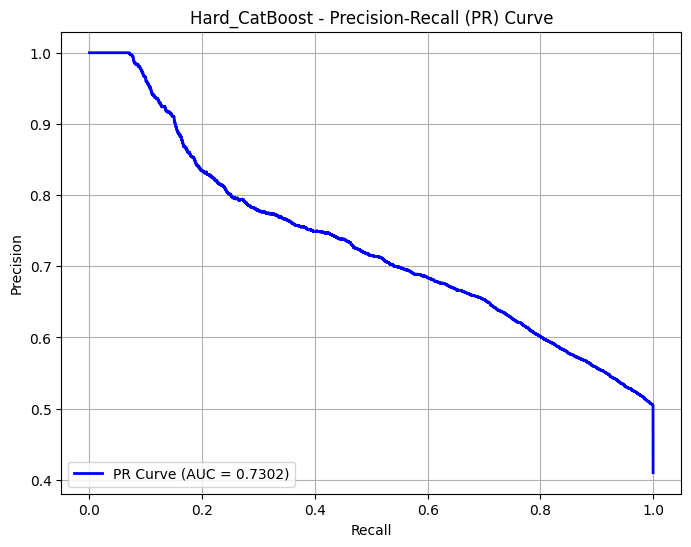

Fitting 2 folds for each of 24 candidates, totalling 48 fits


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in D

LightGBM - Accuracy: 0.7332, ROC AUC: 0.8181
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 50}


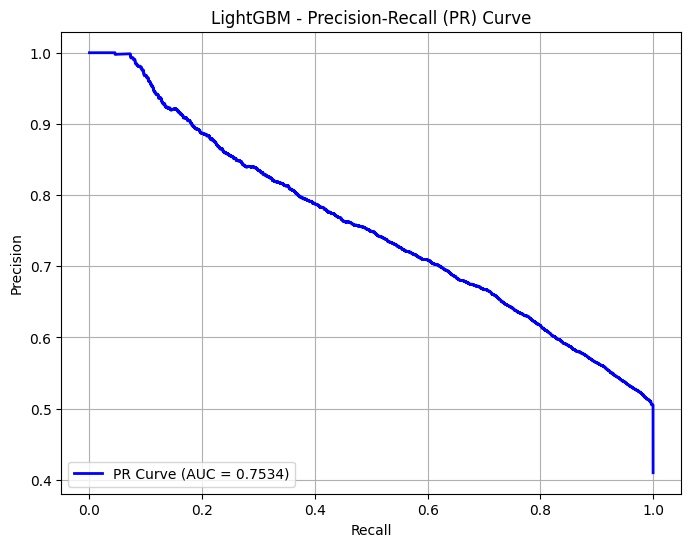

[LightGBM] [Warning] lambda_l1 is set=3.7080847157964736, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7080847157964736
[LightGBM] [Warning] lambda_l2 is set=1.6131603688308367, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6131603688308367
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.09219922329500085, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09219922329500085
[LightGBM] [Warning] lambda_l2 is set=1.2764708088455745, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2764708088455745
 10%|█         | 1/10 [00:00<00:05,  1.54trial/s, best loss: -0.7938020308903913]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.1351859926300083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1351859926300083
[LightGBM] [Warning] lambda_l2 is set=4.029942818054088, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.029942818054088
 20%|██        | 2/10 [00:02<00:08,  1.09s/trial, best loss: -0.7973958707925777]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.61406364391216, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.61406364391216
[LightGBM] [Warning] lambda_l2 is set=0.7843666915479547, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7843666915479547
 30%|███       | 3/10 [00:02<00:06,  1.11trial/s, best loss: -0.7973958707925777]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.9840302062924489, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9840302062924489
[LightGBM] [Warning] lambda_l2 is set=1.8834605605813488, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8834605605813488
 40%|████      | 4/10 [00:03<00:04,  1.44trial/s, best loss: -0.7973958707925777]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.9865166448004583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9865166448004583
[LightGBM] [Warning] lambda_l2 is set=4.861588087063511, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.861588087063511
 60%|██████    | 6/10 [00:03<00:02,  1.98trial/s, best loss: -0.7973958707925777]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.3234210346561177, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3234210346561177
[LightGBM] [Warning] lambda_l2 is set=1.8518189724674583, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8518189724674583
 60%|██████    | 6/10 [00:03<00:02,  1.98trial/s, best loss: -0.7973958707925777]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.98427421965552, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.98427421965552
[LightGBM] [Warning] lambda_l2 is set=3.9260202395949797, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9260202395949797
 70%|███████   | 7/10 [00:04<00:01,  1.79trial/s, best loss: -0.7973958707925777]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.053696841300553, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.053696841300553
[LightGBM] [Warning] lambda_l2 is set=3.927743826153317, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.927743826153317
 80%|████████  | 8/10 [00:05<00:01,  1.69trial/s, best loss: -0.7973958707925777]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.1748175224387205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1748175224387205
[LightGBM] [Warning] lambda_l2 is set=4.342969915483402, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.342969915483402
 90%|█████████ | 9/10 [00:05<00:00,  1.81trial/s, best loss: -0.7973958707925777]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



100%|██████████| 10/10 [00:06<00:00,  1.48trial/s, best loss: -0.7975378413286344]
[LightGBM] [Warning] lambda_l1 is set=0.1748175224387205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1748175224387205
[LightGBM] [Warning] lambda_l2 is set=4.342969915483402, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.342969915483402


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


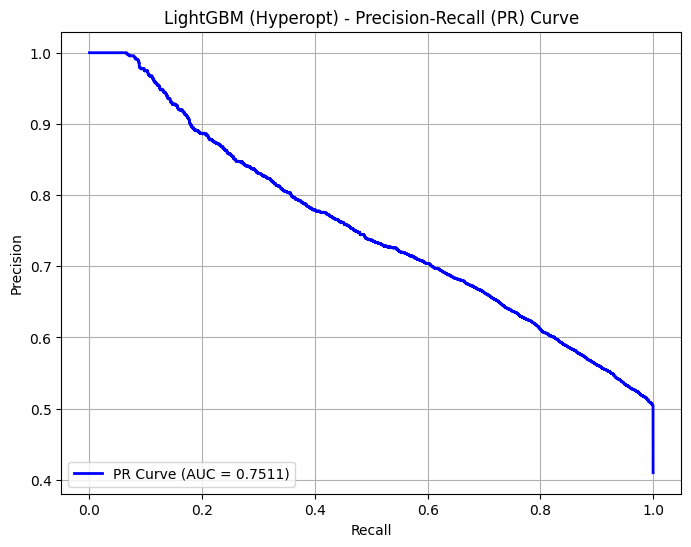

XGBoost - Accuracy: 0.7357, ROC AUC: 0.8146


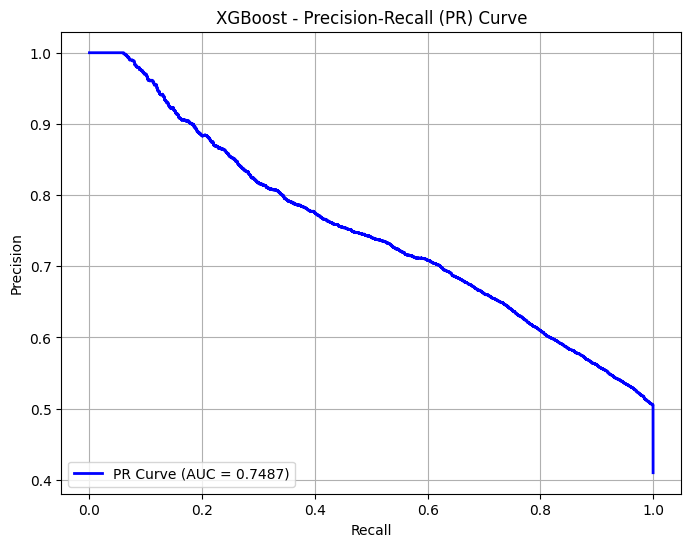

100%|██████████| 10/10 [00:18<00:00,  1.84s/trial, best loss: -0.7980214401730917]


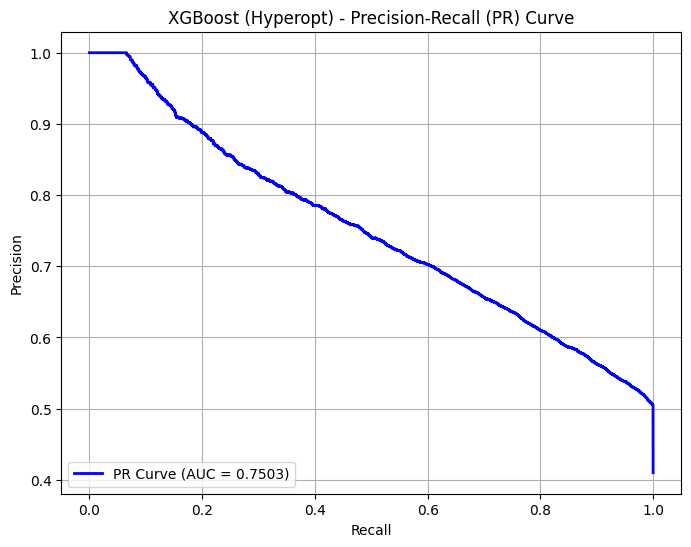

                        Model  Accuracy   ROC AUC  Test Precision    Recall        F1    PR AUC
0     Base_LogisticRegression  0.698143  0.769175        0.605863  0.754605  0.672103  0.666111
1           Base_DecisionTree  0.626233  0.601860        0.552425  0.465222  0.505087  0.614781
2        Base_LogReg_pipeline  0.698099  0.769253        0.606217  0.752221  0.671373  0.665782
3  Base_DecisionTree_pipeline  0.628853  0.604871        0.556098  0.469339  0.509048  0.618241
4               Base_CatBoost  0.719463  0.802871        0.685275  0.583857  0.630514  0.732543
5               Hard_CatBoost  0.713290  0.804203        0.624540  0.753846  0.683128  0.730212
6                    LightGBM  0.733233  0.818051        0.662108  0.713326  0.686763  0.753363
7         LightGBM (Hyperopt)  0.728214  0.815424        0.652216  0.722102  0.685382  0.751129
8                     XGBoost  0.735720  0.814576        0.702020  0.617443  0.657021  0.748725
9          XGBoost (Hyperopt)  0.726348 

Model             LightGBM
Accuracy          0.733233
ROC AUC           0.818051
Test Precision    0.662108
Recall            0.713326
F1                0.686763
PR AUC            0.753363
Name: 6, dtype: object

Выбран ТТ: 8578ДС_Малыгина9
is_back
0    45810
1    27816
Name: count, dtype: int64
1.6468938740293357
Оценка моделей для DS: 8578


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


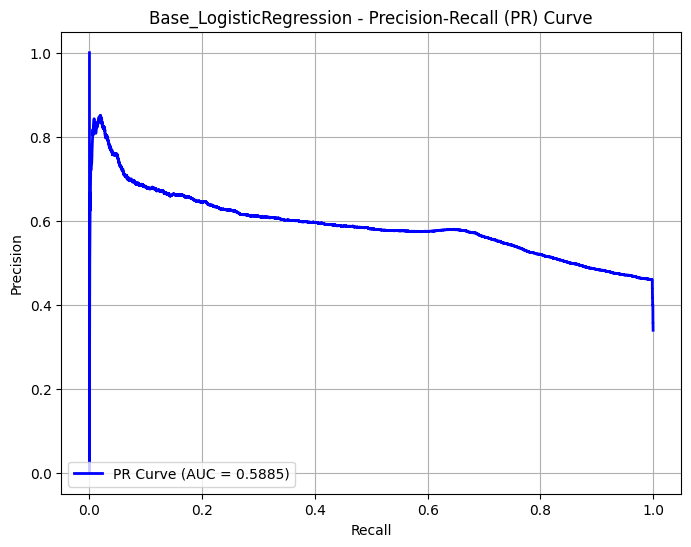

C:\Users\111\AppData\Local\Temp\ipykernel_22392\2544303988.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


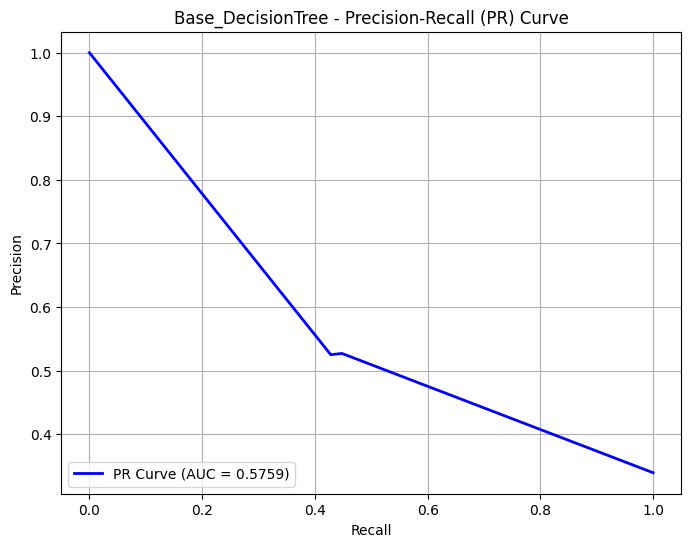

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


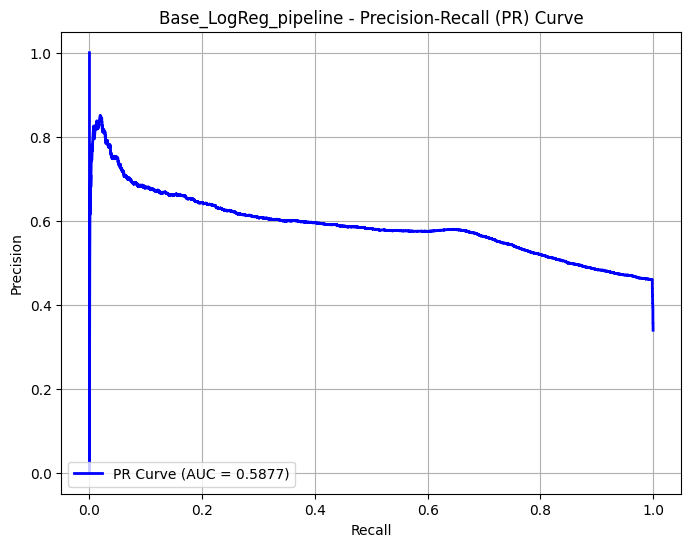

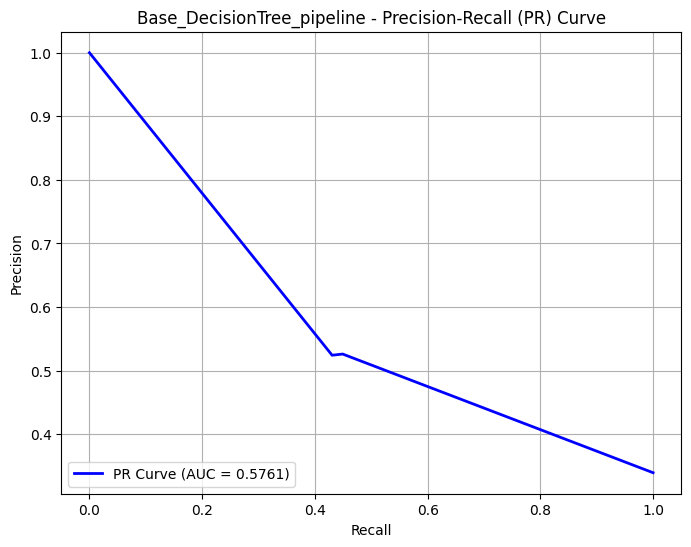

0:	learn: 0.6187718	total: 58.7ms	remaining: 58.6s
100:	learn: 0.4462980	total: 7.35s	remaining: 1m 5s
200:	learn: 0.4318465	total: 14.8s	remaining: 58.8s
300:	learn: 0.4232465	total: 22.1s	remaining: 51.4s
400:	learn: 0.4163551	total: 28.4s	remaining: 42.4s
500:	learn: 0.4106117	total: 34.8s	remaining: 34.6s
600:	learn: 0.4052439	total: 41.6s	remaining: 27.7s
700:	learn: 0.4004371	total: 48.1s	remaining: 20.5s
800:	learn: 0.3960933	total: 54.7s	remaining: 13.6s
900:	learn: 0.3921186	total: 1m 1s	remaining: 6.75s
999:	learn: 0.3885336	total: 1m 8s	remaining: 0us


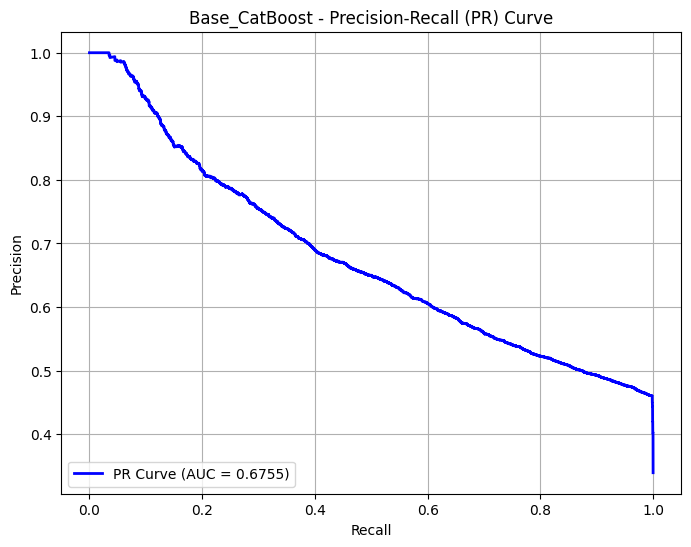

[I 2025-03-04 12:32:24,378] A new study created in memory with name: no-name-d835c5d0-c4fd-4071-9216-ac828209deeb
[I 2025-03-04 12:32:30,993] Trial 0 finished with value: 0.8005492669201744 and parameters: {'iterations': 750, 'learning_rate': 0.12810555095547302, 'depth': 5, 'l2_leaf_reg': 3.683954205653572, 'border_count': 36, 'random_strength': 0.30029275830024327, 'bagging_temperature': 0.37456367224939113, 'subsample': 0.9745099111927905}. Best is trial 0 with value: 0.8005492669201744.


0:	learn: 0.6157552	test: 0.6165048	best: 0.6165048 (0)	total: 59.8ms	remaining: 44.8s
1:	learn: 0.5705158	test: 0.5728705	best: 0.5728705 (1)	total: 117ms	remaining: 43.8s
2:	learn: 0.5431273	test: 0.5474271	best: 0.5474271 (2)	total: 178ms	remaining: 44.2s
3:	learn: 0.5266618	test: 0.5335076	best: 0.5335076 (3)	total: 230ms	remaining: 42.9s
4:	learn: 0.5196058	test: 0.5289585	best: 0.5289585 (4)	total: 287ms	remaining: 42.8s
5:	learn: 0.5111861	test: 0.5220849	best: 0.5220849 (5)	total: 350ms	remaining: 43.4s
6:	learn: 0.5062867	test: 0.5193590	best: 0.5193590 (6)	total: 414ms	remaining: 43.9s
7:	learn: 0.5031247	test: 0.5183463	best: 0.5183463 (7)	total: 473ms	remaining: 43.9s
8:	learn: 0.5000677	test: 0.5172639	best: 0.5172639 (8)	total: 534ms	remaining: 43.9s
9:	learn: 0.4981514	test: 0.5169594	best: 0.5169594 (9)	total: 591ms	remaining: 43.8s
10:	learn: 0.4946352	test: 0.5142662	best: 0.5142662 (10)	total: 650ms	remaining: 43.6s
11:	learn: 0.4930253	test: 0.5134952	best: 0.513495

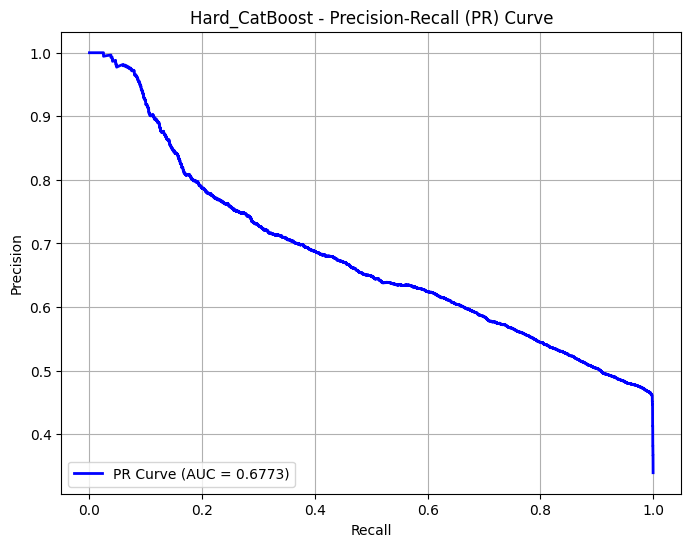

Fitting 2 folds for each of 24 candidates, totalling 48 fits


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in D

LightGBM - Accuracy: 0.7187, ROC AUC: 0.8024
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 50}


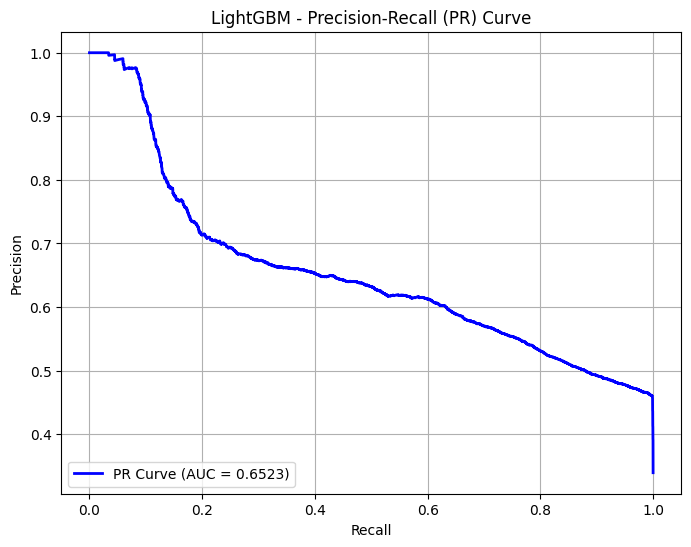

[LightGBM] [Warning] lambda_l1 is set=1.8610707153794381, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8610707153794381
[LightGBM] [Warning] lambda_l2 is set=2.56892320087009, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.56892320087009
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.3246920566758399, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3246920566758399
[LightGBM] [Warning] lambda_l2 is set=2.6788393127041954, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6788393127041954
 20%|██        | 2/10 [00:00<00:03,  2.26trial/s, best loss: -0.7973686660460167]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.5096100942533255, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.5096100942533255
[LightGBM] [Warning] lambda_l2 is set=2.9465712717217936, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9465712717217936
[LightGBM] [Warning] lambda_l1 is set=0.700988992942585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.700988992942585
[LightGBM] [Warning] lambda_l2 is set=3.584720449380876, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.584720449380876
 30%|███       | 3/10 [00:01<00:02,  2.91trial/s, best loss: -0.7973686660460167]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.7862068471352237, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7862068471352237
[LightGBM] [Warning] lambda_l2 is set=2.597688402517693, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.597688402517693
 40%|████      | 4/10 [00:01<00:02,  2.60trial/s, best loss: -0.7973686660460167]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.9453256211121603, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9453256211121603
[LightGBM] [Warning] lambda_l2 is set=4.670363257570927, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.670363257570927
 50%|█████     | 5/10 [00:02<00:02,  2.16trial/s, best loss: -0.7991337500554152]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.442876423422761, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.442876423422761
[LightGBM] [Warning] lambda_l2 is set=2.4738711410360485, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4738711410360485
 70%|███████   | 7/10 [00:02<00:01,  2.46trial/s, best loss: -0.7991337500554152]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.8512195599088584, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8512195599088584
[LightGBM] [Warning] lambda_l2 is set=4.450806954019934, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.450806954019934
 70%|███████   | 7/10 [00:03<00:01,  2.46trial/s, best loss: -0.7991337500554152]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.6897130099585898, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6897130099585898
[LightGBM] [Warning] lambda_l2 is set=2.8771459766561054, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8771459766561054
[LightGBM] [Warning] lambda_l1 is set=4.3380241233099825, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.3380241233099825
[LightGBM] [Warning] lambda_l2 is set=3.8842389503779557, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8842389503779557
 90%|█████████ | 9/10 [00:03<00:00,  2.89trial/s, best loss: -0.7991337500554152]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



100%|██████████| 10/10 [00:03<00:00,  2.57trial/s, best loss: -0.7991337500554152]
[LightGBM] [Warning] lambda_l1 is set=2.7862068471352237, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7862068471352237
[LightGBM] [Warning] lambda_l2 is set=2.597688402517693, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.597688402517693


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


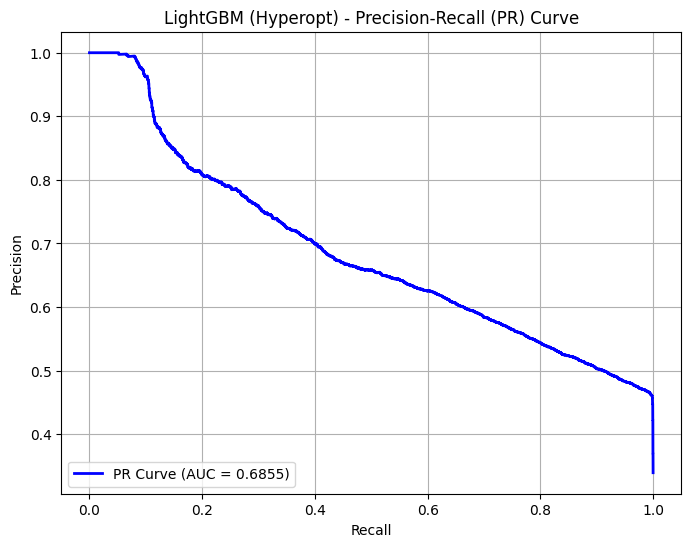

XGBoost - Accuracy: 0.7366, ROC AUC: 0.8109


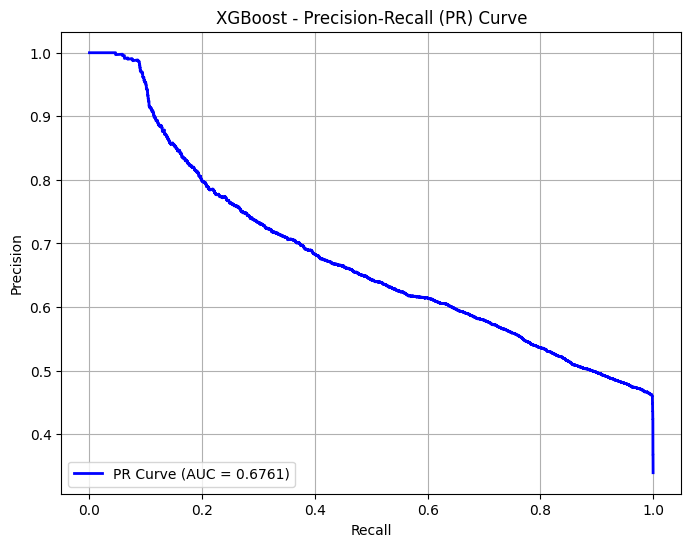

100%|██████████| 10/10 [00:21<00:00,  2.13s/trial, best loss: -0.8009872766768631]


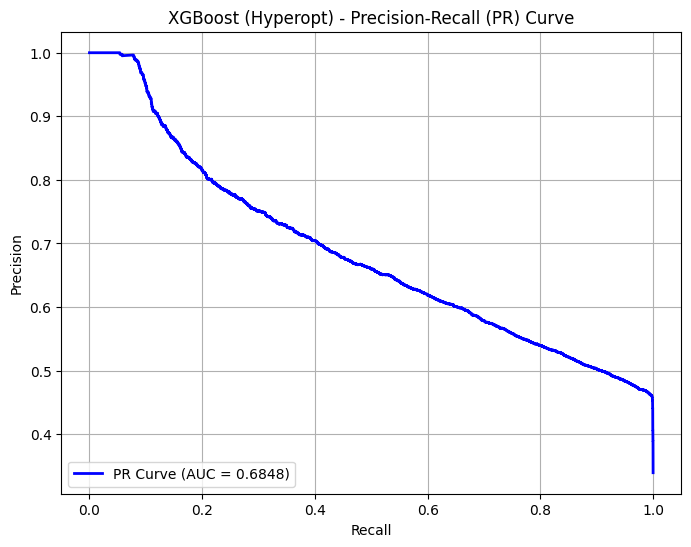

                        Model  Accuracy   ROC AUC  Test Precision    Recall        F1    PR AUC
0     Base_LogisticRegression  0.718876  0.782333        0.572617  0.675168  0.619678  0.588511
1           Base_DecisionTree  0.676285  0.620392        0.526862  0.448010  0.484247  0.575913
2        Base_LogReg_pipeline  0.719019  0.782146        0.572995  0.673767  0.619308  0.587705
3  Base_DecisionTree_pipeline  0.675809  0.620350        0.525919  0.449271  0.484583  0.576132
4               Base_CatBoost  0.735133  0.806638        0.686546  0.403307  0.508121  0.675528
5               Hard_CatBoost  0.733470  0.815207        0.593792  0.678251  0.633218  0.677275
6                    LightGBM  0.718686  0.802383        0.568689  0.706558  0.630171  0.652280
7         LightGBM (Hyperopt)  0.733802  0.817328        0.593910  0.680633  0.634322  0.685491
8                     XGBoost  0.736559  0.810864        0.642118  0.504624  0.565129  0.676114
9          XGBoost (Hyperopt)  0.733470 

Model             LightGBM (Hyperopt)
Accuracy                     0.733802
ROC AUC                      0.817328
Test Precision                0.59391
Recall                       0.680633
F1                           0.634322
PR AUC                       0.685491
Name: 7, dtype: object

Выбран ТТ: 8443ДС_Зеленый3
is_back
0    71830
1    55439
Name: count, dtype: int64
1.2956582910947168
Оценка моделей для DS: 8443


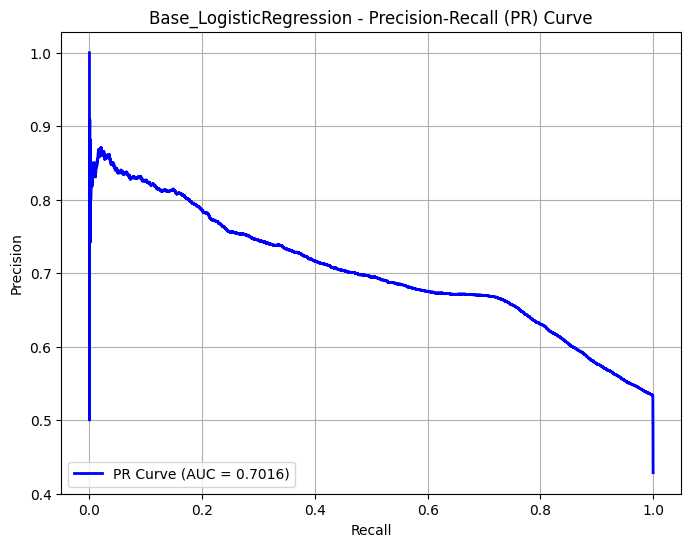

C:\Users\111\AppData\Local\Temp\ipykernel_22392\2544303988.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


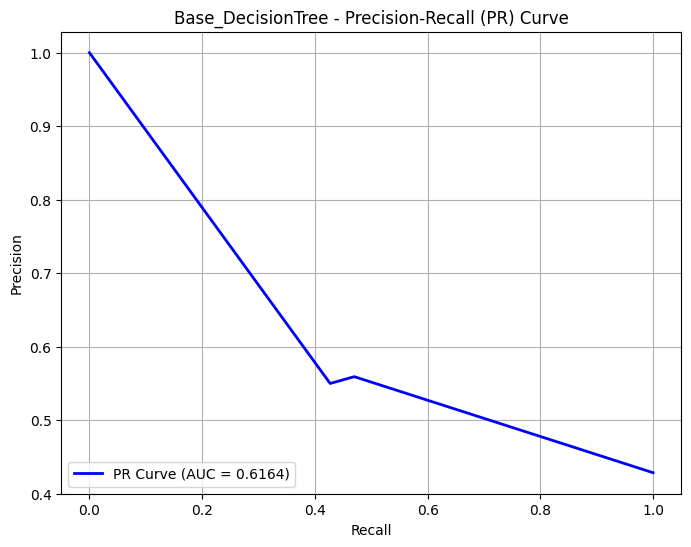

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


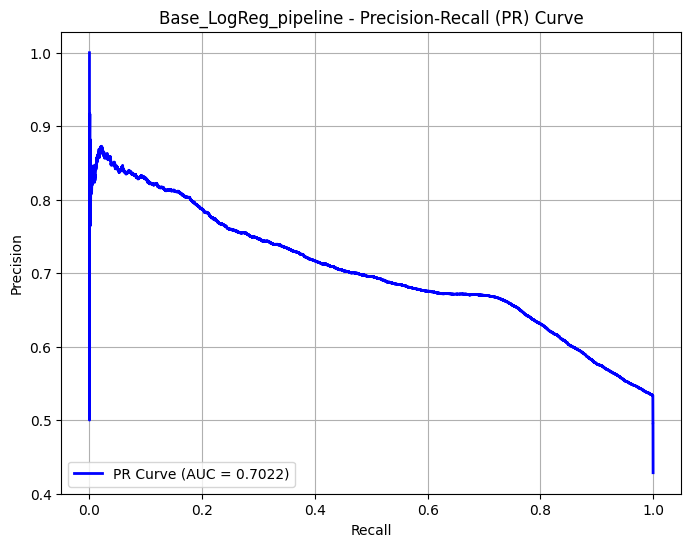

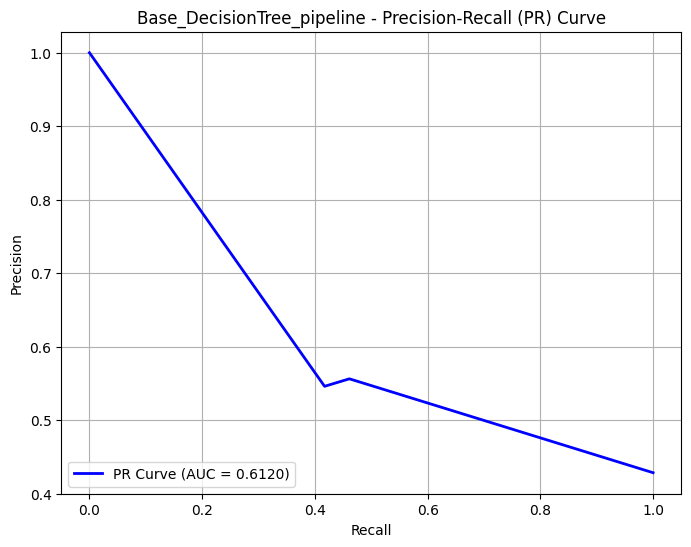

0:	learn: 0.6254152	total: 98ms	remaining: 1m 37s
100:	learn: 0.4571472	total: 9.42s	remaining: 1m 23s
200:	learn: 0.4430087	total: 18.2s	remaining: 1m 12s
300:	learn: 0.4341881	total: 26.9s	remaining: 1m 2s
400:	learn: 0.4274422	total: 35.8s	remaining: 53.4s
500:	learn: 0.4227644	total: 45.1s	remaining: 45s
600:	learn: 0.4183469	total: 54.3s	remaining: 36.1s
700:	learn: 0.4146328	total: 1m 3s	remaining: 26.9s
800:	learn: 0.4113292	total: 1m 12s	remaining: 18.1s
900:	learn: 0.4086162	total: 1m 21s	remaining: 8.99s
999:	learn: 0.4061640	total: 1m 30s	remaining: 0us


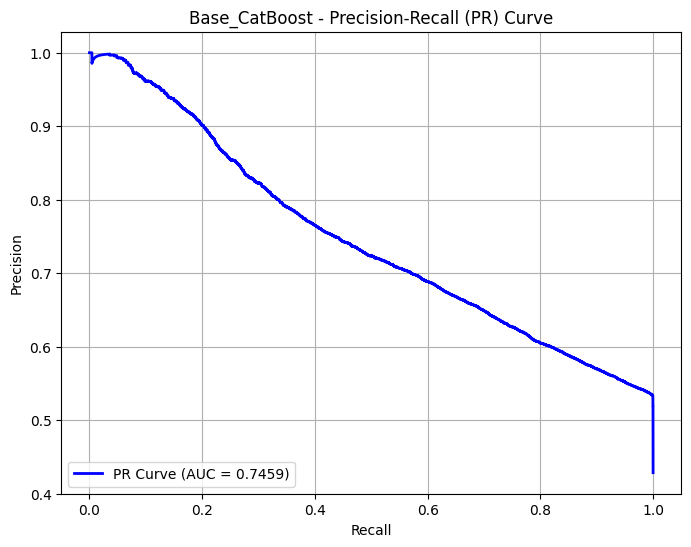

[I 2025-03-04 12:35:57,308] A new study created in memory with name: no-name-b8b2e081-8165-42b7-9857-0eaf42521fb1
[I 2025-03-04 12:36:05,990] Trial 0 finished with value: 0.795797859831852 and parameters: {'iterations': 450, 'learning_rate': 0.0709993988242458, 'depth': 6, 'l2_leaf_reg': 2.8513351353522416, 'border_count': 45, 'random_strength': 0.6495555944569923, 'bagging_temperature': 0.7822326498271196, 'subsample': 0.7386146670865982}. Best is trial 0 with value: 0.795797859831852.


0:	learn: 0.6454090	test: 0.6482090	best: 0.6482090 (0)	total: 87.2ms	remaining: 39.1s
1:	learn: 0.6086983	test: 0.6146787	best: 0.6146787 (1)	total: 171ms	remaining: 38.2s
2:	learn: 0.5833816	test: 0.5905387	best: 0.5905387 (2)	total: 246ms	remaining: 36.7s
3:	learn: 0.5641874	test: 0.5730552	best: 0.5730552 (3)	total: 341ms	remaining: 38s
4:	learn: 0.5501207	test: 0.5603311	best: 0.5603311 (4)	total: 443ms	remaining: 39.4s
5:	learn: 0.5419303	test: 0.5558304	best: 0.5558304 (5)	total: 533ms	remaining: 39.5s
6:	learn: 0.5350307	test: 0.5523434	best: 0.5523434 (6)	total: 624ms	remaining: 39.5s
7:	learn: 0.5299572	test: 0.5490619	best: 0.5490619 (7)	total: 720ms	remaining: 39.8s
8:	learn: 0.5256737	test: 0.5470488	best: 0.5470488 (8)	total: 809ms	remaining: 39.6s
9:	learn: 0.5189052	test: 0.5410295	best: 0.5410295 (9)	total: 907ms	remaining: 39.9s
10:	learn: 0.5158421	test: 0.5402115	best: 0.5402115 (10)	total: 1.02s	remaining: 40.7s
11:	learn: 0.5128018	test: 0.5392589	best: 0.5392589 

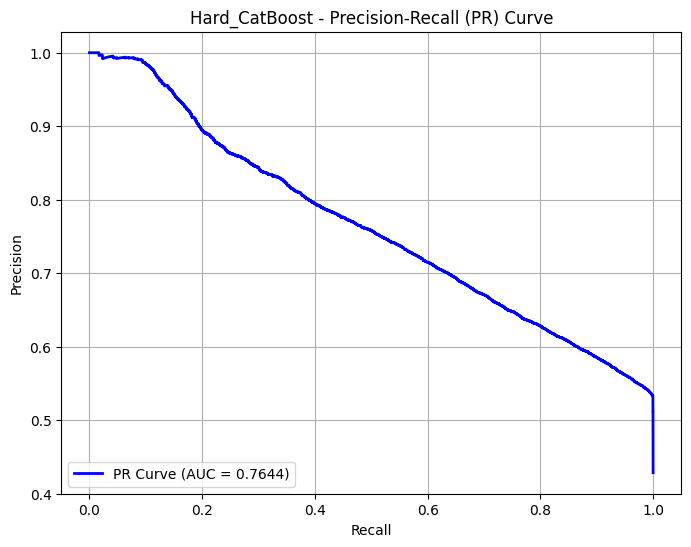

Fitting 2 folds for each of 24 candidates, totalling 48 fits


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in D

LightGBM - Accuracy: 0.7412, ROC AUC: 0.8250
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31}


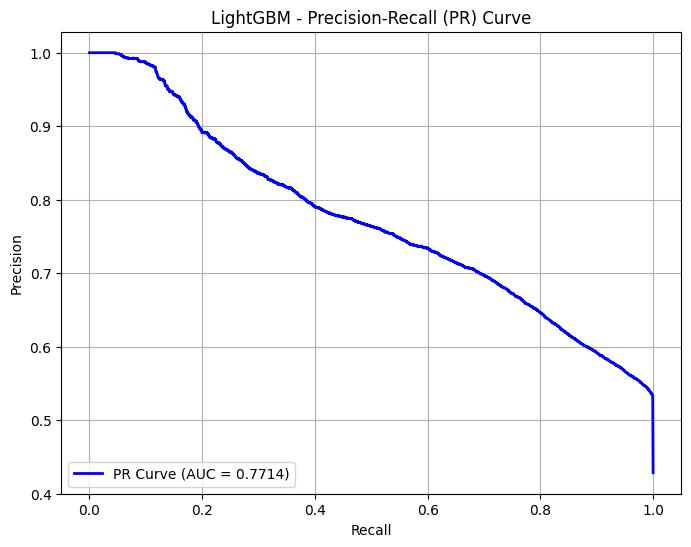

[LightGBM] [Warning] lambda_l1 is set=2.1918567616914113, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1918567616914113
[LightGBM] [Warning] lambda_l2 is set=0.1958110481815012, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1958110481815012
 10%|█         | 1/10 [00:00<00:02,  3.11trial/s, best loss: -0.7836597110305309]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.01551516895918148, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01551516895918148
[LightGBM] [Warning] lambda_l2 is set=2.9020787302860858, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9020787302860858
 20%|██        | 2/10 [00:00<00:02,  3.35trial/s, best loss: -0.7872880573462262]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.56735150676772, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.56735150676772
[LightGBM] [Warning] lambda_l2 is set=3.641737757377612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.641737757377612
 20%|██        | 2/10 [00:00<00:02,  3.35trial/s, best loss: -0.7872880573462262]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.1405799337732008, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1405799337732008
[LightGBM] [Warning] lambda_l2 is set=4.12514220082712, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.12514220082712
 30%|███       | 3/10 [00:01<00:03,  2.21trial/s, best loss: -0.7872880573462262]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.399418795860076, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.399418795860076
[LightGBM] [Warning] lambda_l2 is set=1.2231885571512073, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2231885571512073
 40%|████      | 4/10 [00:02<00:03,  1.77trial/s, best loss: -0.8026187858134122]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.39952854467133, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.39952854467133
[LightGBM] [Warning] lambda_l2 is set=4.385691651312705, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.385691651312705
 50%|█████     | 5/10 [00:04<00:06,  1.37s/trial, best loss: -0.8026187858134122]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=1.7015457362487036, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7015457362487036
[LightGBM] [Warning] lambda_l2 is set=4.816140563355669, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.816140563355669
 60%|██████    | 6/10 [00:05<00:04,  1.14s/trial, best loss: -0.8026187858134122]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.761995454748613, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.761995454748613
[LightGBM] [Warning] lambda_l2 is set=2.6623386683113064, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6623386683113064
 70%|███████   | 7/10 [00:07<00:03,  1.25s/trial, best loss: -0.8026187858134122]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.070550476597306, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.070550476597306
[LightGBM] [Warning] lambda_l2 is set=1.1911580471035077, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1911580471035077
 80%|████████  | 8/10 [00:07<00:02,  1.07s/trial, best loss: -0.8026187858134122]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.9467842671539323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9467842671539323
[LightGBM] [Warning] lambda_l2 is set=0.969510357315666, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.969510357315666
 90%|█████████ | 9/10 [00:08<00:00,  1.11trial/s, best loss: -0.8026187858134122]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



100%|██████████| 10/10 [00:08<00:00,  1.13trial/s, best loss: -0.8026187858134122]
[LightGBM] [Warning] lambda_l1 is set=2.1405799337732008, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1405799337732008
[LightGBM] [Warning] lambda_l2 is set=4.12514220082712, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.12514220082712


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


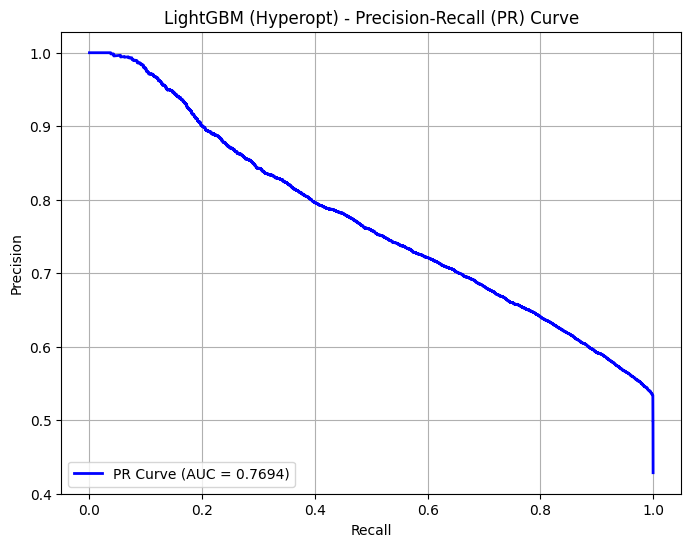

XGBoost - Accuracy: 0.7200, ROC AUC: 0.8215


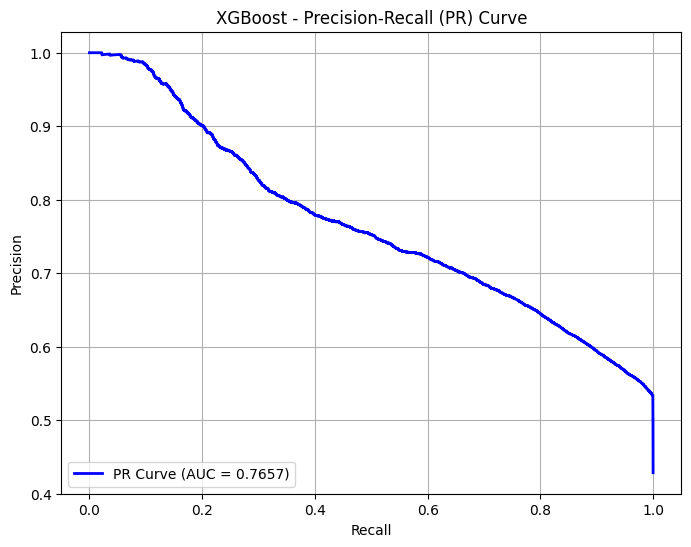

100%|██████████| 10/10 [00:25<00:00,  2.57s/trial, best loss: -0.8012864149655297]


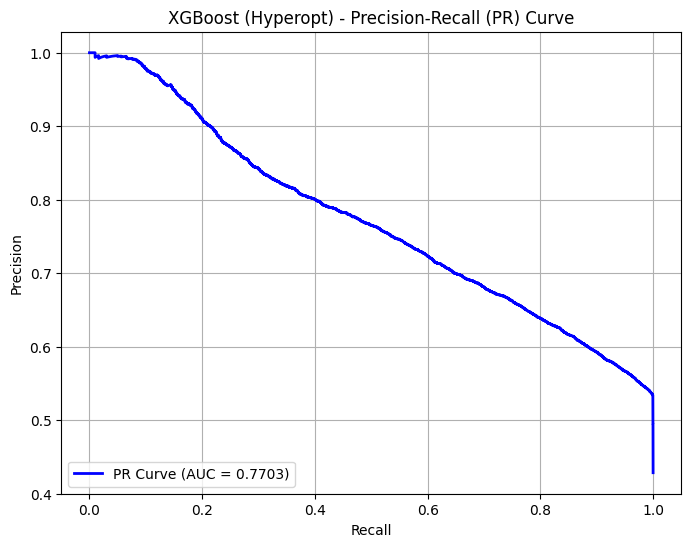

                        Model  Accuracy   ROC AUC  Test Precision    Recall        F1    PR AUC
0     Base_LogisticRegression  0.726398  0.794930        0.665744  0.725703  0.694432  0.701594
1           Base_DecisionTree  0.614168  0.593829        0.559129  0.469829  0.510604  0.616433
2        Base_LogReg_pipeline  0.726480  0.795113        0.665959  0.725382  0.694402  0.702233
3  Base_DecisionTree_pipeline  0.611528  0.590271        0.556209  0.461163  0.504247  0.611981
4               Base_CatBoost  0.706075  0.799642        0.719086  0.515150  0.600269  0.745854
5               Hard_CatBoost  0.726948  0.816183        0.702111  0.629863  0.664027  0.764363
6                    LightGBM  0.741220  0.825007        0.694158  0.707793  0.700909  0.771369
7         LightGBM (Hyperopt)  0.732090  0.822205        0.695158  0.667223  0.680904  0.769356
8                     XGBoost  0.720045  0.821464        0.735064  0.541790  0.623799  0.765722
9          XGBoost (Hyperopt)  0.731458 

Model             LightGBM
Accuracy           0.74122
ROC AUC           0.825007
Test Precision    0.694158
Recall            0.707793
F1                0.700909
PR AUC            0.771369
Name: 6, dtype: object

Выбран ТТ: 8317ДС_Волгоградский73
is_back
0    68461
1    43119
Name: count, dtype: int64
1.5877223497762007
Оценка моделей для DS: 8317


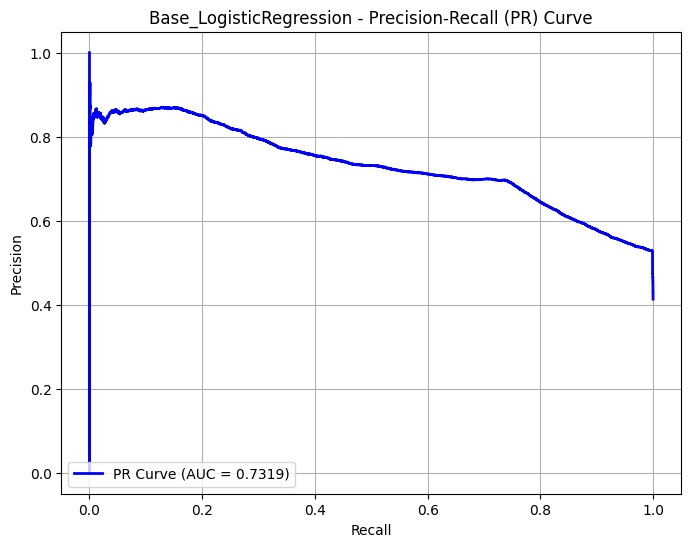

C:\Users\111\AppData\Local\Temp\ipykernel_22392\2544303988.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


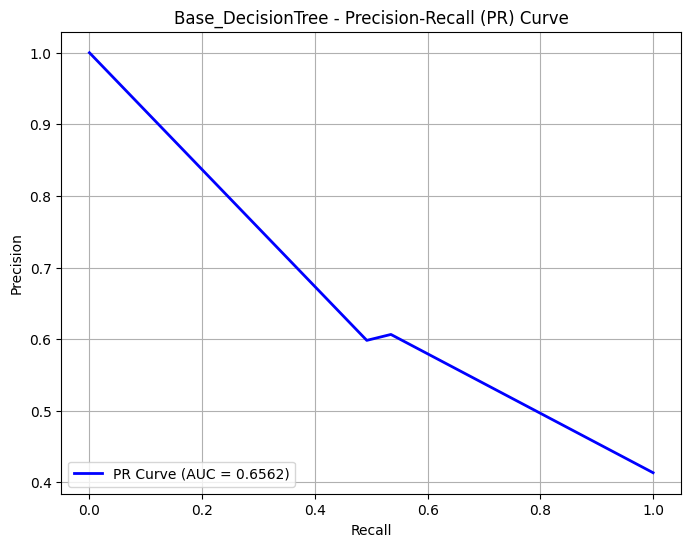

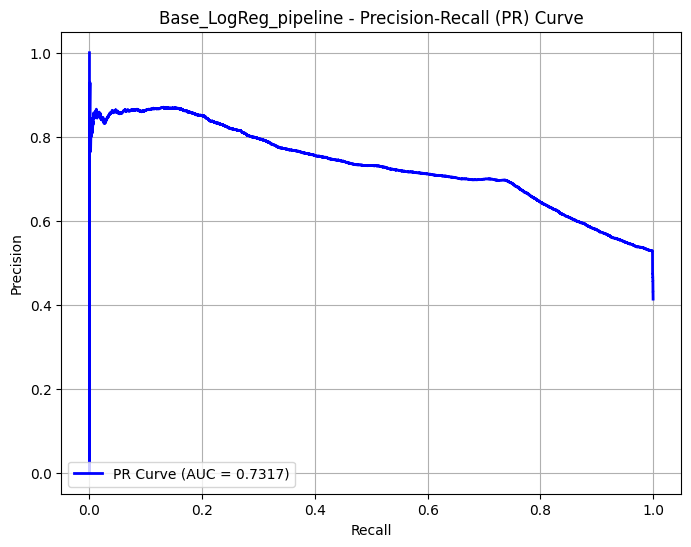

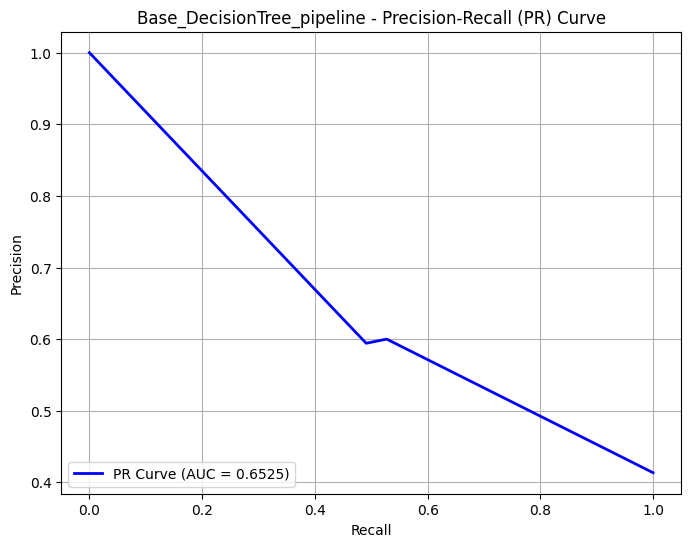

0:	learn: 0.6246155	total: 108ms	remaining: 1m 47s
100:	learn: 0.4367190	total: 8.07s	remaining: 1m 11s
200:	learn: 0.4212120	total: 16.2s	remaining: 1m 4s
300:	learn: 0.4123368	total: 24.3s	remaining: 56.4s
400:	learn: 0.4055682	total: 32.7s	remaining: 48.9s
500:	learn: 0.4003378	total: 41.5s	remaining: 41.3s
600:	learn: 0.3956991	total: 49.7s	remaining: 33s
700:	learn: 0.3916048	total: 57.9s	remaining: 24.7s
800:	learn: 0.3881264	total: 1m 7s	remaining: 16.7s
900:	learn: 0.3849571	total: 1m 15s	remaining: 8.32s
999:	learn: 0.3818592	total: 1m 24s	remaining: 0us


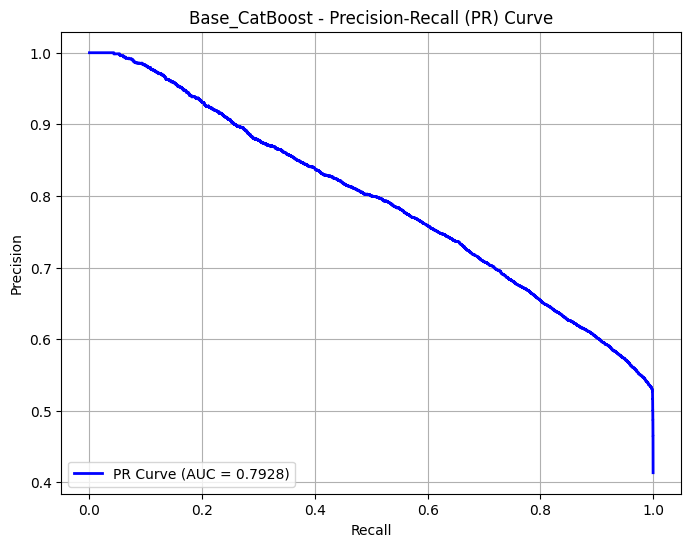

[I 2025-03-04 12:40:25,397] A new study created in memory with name: no-name-7c279322-2b97-4d22-a0c6-8f8bed20abd2
[I 2025-03-04 12:40:39,184] Trial 0 finished with value: 0.8522612495098472 and parameters: {'iterations': 750, 'learning_rate': 0.06532267541969715, 'depth': 6, 'l2_leaf_reg': 1.6782244617652888, 'border_count': 60, 'random_strength': 0.7993339779466454, 'bagging_temperature': 0.08073799960895062, 'subsample': 0.7413885650390735}. Best is trial 0 with value: 0.8522612495098472.


0:	learn: 0.6492057	test: 0.6493599	best: 0.6493599 (0)	total: 82.7ms	remaining: 1m 1s
1:	learn: 0.6146504	test: 0.6154085	best: 0.6154085 (1)	total: 160ms	remaining: 59.9s
2:	learn: 0.5867455	test: 0.5880184	best: 0.5880184 (2)	total: 231ms	remaining: 57.6s
3:	learn: 0.5660045	test: 0.5665555	best: 0.5665555 (3)	total: 304ms	remaining: 56.7s
4:	learn: 0.5516579	test: 0.5524133	best: 0.5524133 (4)	total: 391ms	remaining: 58.3s
5:	learn: 0.5386496	test: 0.5392343	best: 0.5392343 (5)	total: 474ms	remaining: 58.8s
6:	learn: 0.5285272	test: 0.5284381	best: 0.5284381 (6)	total: 557ms	remaining: 59.1s
7:	learn: 0.5218567	test: 0.5209036	best: 0.5209036 (7)	total: 638ms	remaining: 59.2s
8:	learn: 0.5152729	test: 0.5141356	best: 0.5141356 (8)	total: 715ms	remaining: 58.9s
9:	learn: 0.5118787	test: 0.5105088	best: 0.5105088 (9)	total: 794ms	remaining: 58.7s
10:	learn: 0.5064987	test: 0.5050075	best: 0.5050075 (10)	total: 925ms	remaining: 1m 2s
11:	learn: 0.5037423	test: 0.5027859	best: 0.502785

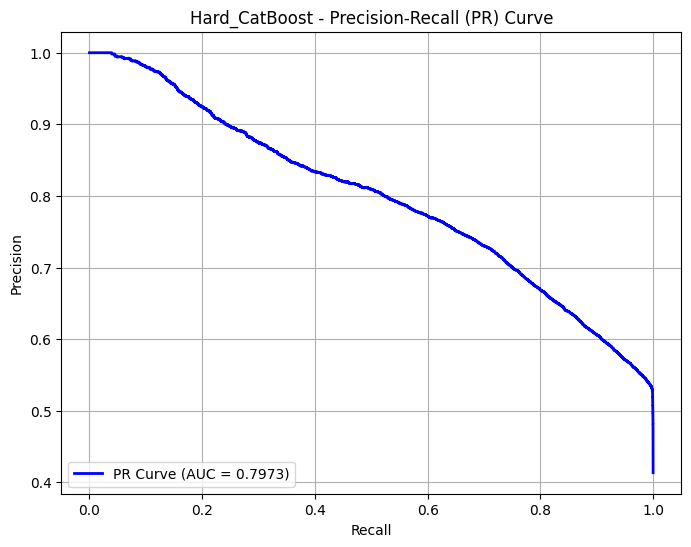

Fitting 2 folds for each of 24 candidates, totalling 48 fits


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in D

LightGBM - Accuracy: 0.7647, ROC AUC: 0.8518
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}


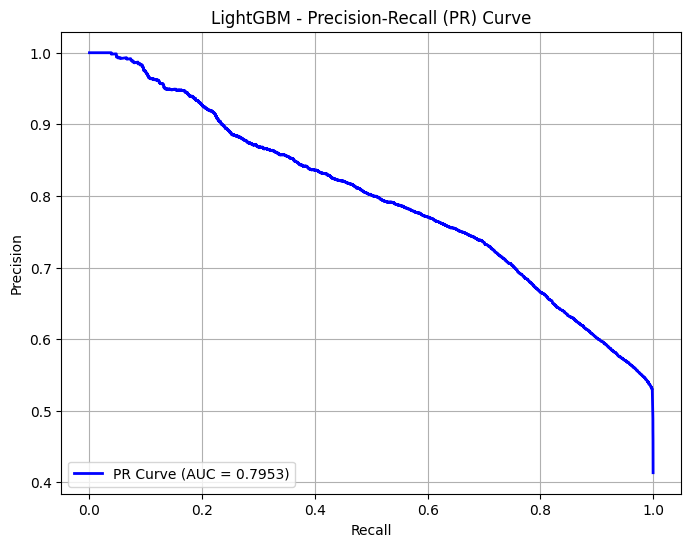

[LightGBM] [Warning] lambda_l1 is set=3.2570096998715803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2570096998715803
[LightGBM] [Warning] lambda_l2 is set=1.120673323082938, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.120673323082938
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.806107112187682, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.806107112187682
[LightGBM] [Warning] lambda_l2 is set=3.539903441385815, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.539903441385815
 20%|██        | 2/10 [00:01<00:05,  1.40trial/s, best loss: -0.8555199889032045]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.5690101531238201, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5690101531238201
[LightGBM] [Warning] lambda_l2 is set=1.186429987691207, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.186429987691207
 20%|██        | 2/10 [00:01<00:05,  1.40trial/s, best loss: -0.8555199889032045]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.958272365344883, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.958272365344883
[LightGBM] [Warning] lambda_l2 is set=0.04871647266372181, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04871647266372181
 30%|███       | 3/10 [00:02<00:04,  1.59trial/s, best loss: -0.8555199889032045]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=0.0335579838673461, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0335579838673461
[LightGBM] [Warning] lambda_l2 is set=1.4476584821391008, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4476584821391008
 40%|████      | 4/10 [00:02<00:03,  1.53trial/s, best loss: -0.8555199889032045]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.821507019252033, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.821507019252033
[LightGBM] [Warning] lambda_l2 is set=0.5178742718855678, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5178742718855678
 50%|█████     | 5/10 [00:04<00:04,  1.13trial/s, best loss: -0.8555199889032045]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.986572492981906, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.986572492981906
[LightGBM] [Warning] lambda_l2 is set=1.2183053060380633, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2183053060380633
 70%|███████   | 7/10 [00:05<00:02,  1.33trial/s, best loss: -0.8555199889032045]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.253553326377053, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.253553326377053
[LightGBM] [Warning] lambda_l2 is set=1.4453859390438395, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4453859390438395
 70%|███████   | 7/10 [00:05<00:02,  1.33trial/s, best loss: -0.8555199889032045]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.014154061976595, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.014154061976595
[LightGBM] [Warning] lambda_l2 is set=0.6555342793275892, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6555342793275892
 80%|████████  | 8/10 [00:06<00:01,  1.28trial/s, best loss: -0.8555199889032045]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=1.9914216719864135, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9914216719864135
[LightGBM] [Warning] lambda_l2 is set=1.6601203524347619, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6601203524347619
 90%|█████████ | 9/10 [00:07<00:00,  1.40trial/s, best loss: -0.8555199889032045]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



100%|██████████| 10/10 [00:07<00:00,  1.32trial/s, best loss: -0.8555199889032045]
[LightGBM] [Warning] lambda_l1 is set=3.2570096998715803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2570096998715803
[LightGBM] [Warning] lambda_l2 is set=1.120673323082938, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.120673323082938


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


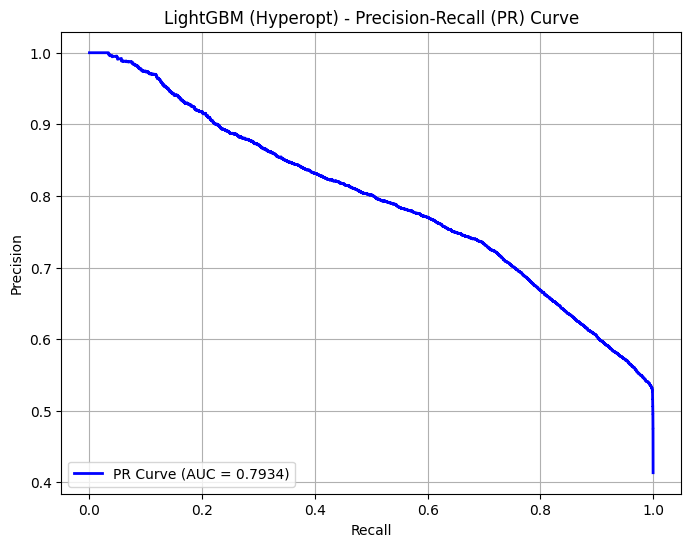

XGBoost - Accuracy: 0.7670, ROC AUC: 0.8507


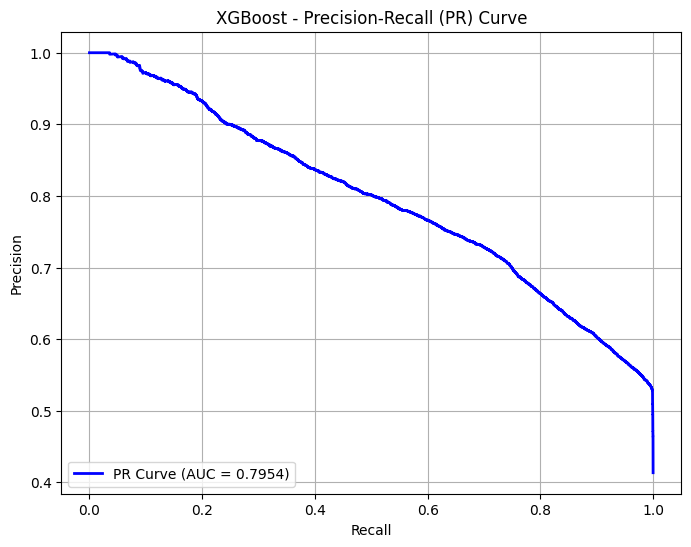

100%|██████████| 10/10 [00:25<00:00,  2.55s/trial, best loss: -0.8550741609159835]


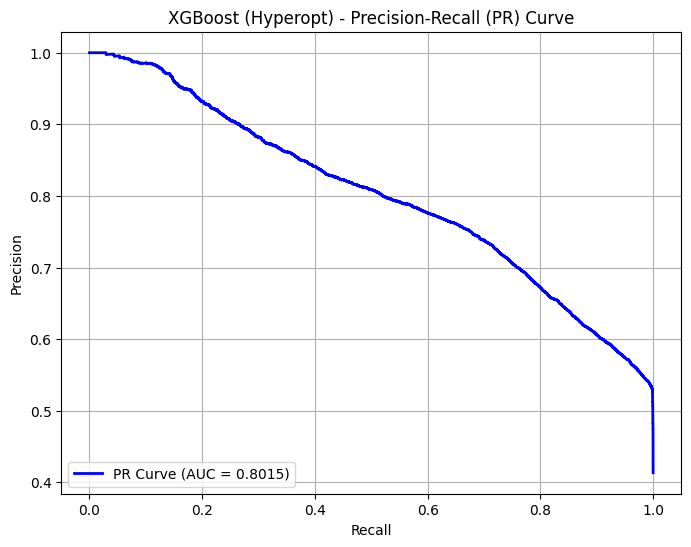

                        Model  Accuracy   ROC AUC  Test Precision    Recall        F1    PR AUC
0     Base_LogisticRegression  0.753835  0.822613        0.682609  0.755957  0.717413  0.731862
1           Base_DecisionTree  0.664283  0.643047        0.606488  0.534831  0.568410  0.656164
2        Base_LogReg_pipeline  0.753803  0.822597        0.682588  0.755881  0.717367  0.731687
3  Base_DecisionTree_pipeline  0.659296  0.638332        0.599965  0.527394  0.561344  0.652544
4               Base_CatBoost  0.755340  0.847442        0.760512  0.595690  0.668085  0.792792
5               Hard_CatBoost  0.760610  0.853142        0.688153  0.769616  0.726608  0.797277
6                    LightGBM  0.764656  0.851829        0.699922  0.753832  0.725878  0.795286
7         LightGBM (Hyperopt)  0.759732  0.851535        0.684007  0.778267  0.728099  0.793437
8                     XGBoost  0.766977  0.850743        0.735557  0.681135  0.707301  0.795424
9          XGBoost (Hyperopt)  0.762900 

Model             XGBoost (Hyperopt)
Accuracy                      0.7629
ROC AUC                     0.855399
Test Precision              0.689307
Recall                      0.776294
F1                          0.730219
PR AUC                      0.801517
Name: 9, dtype: object

Выбран ТТ: 6694ДС_Наметкина3
is_back
0    82138
1    74750
Name: count, dtype: int64
1.0988361204013377
Оценка моделей для DS: 6694


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


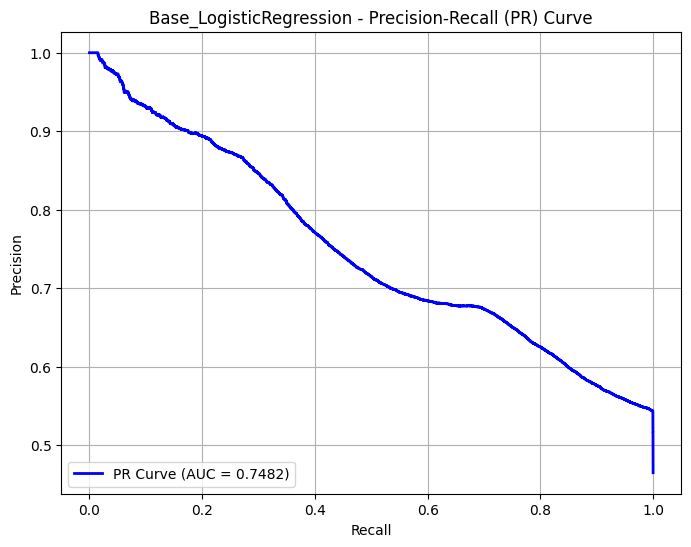

C:\Users\111\AppData\Local\Temp\ipykernel_22392\2544303988.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


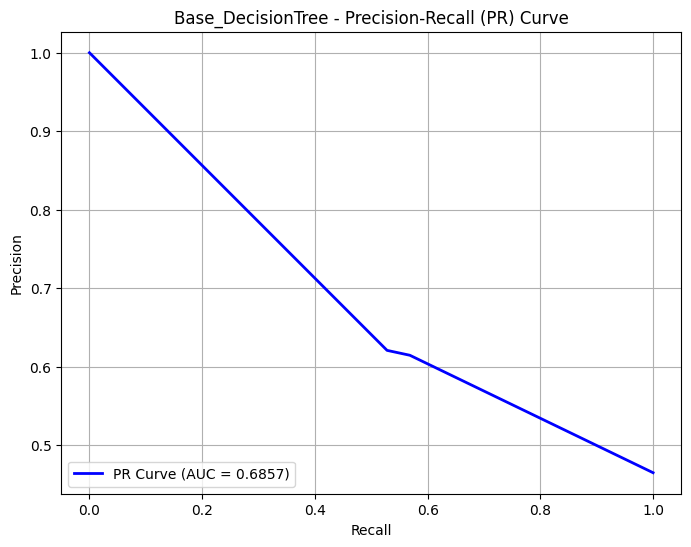

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


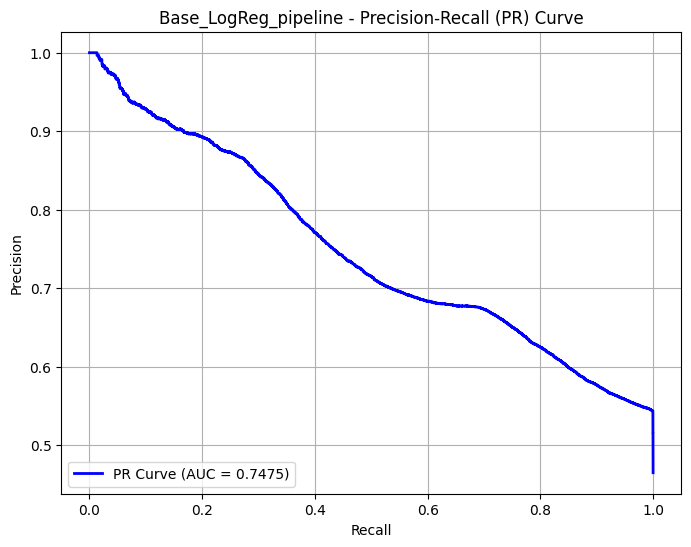

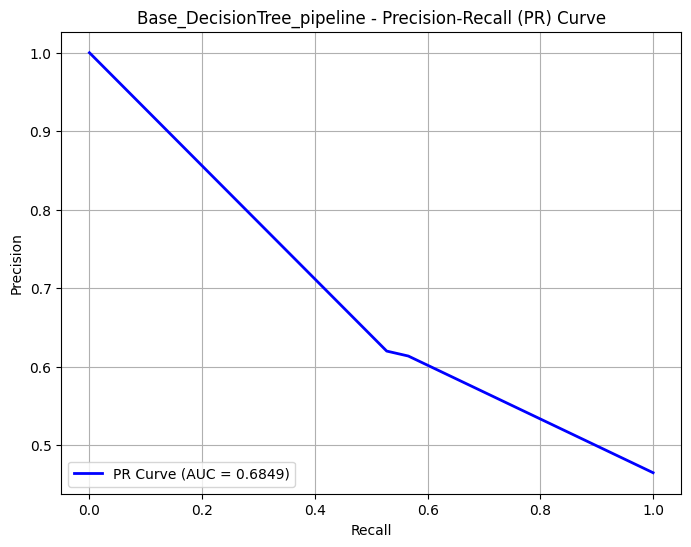

0:	learn: 0.6358902	total: 98.5ms	remaining: 1m 38s
100:	learn: 0.4601728	total: 10.6s	remaining: 1m 34s
200:	learn: 0.4490707	total: 21.5s	remaining: 1m 25s
300:	learn: 0.4424652	total: 32.4s	remaining: 1m 15s
400:	learn: 0.4374310	total: 42.8s	remaining: 1m 3s
500:	learn: 0.4331148	total: 53s	remaining: 52.8s
600:	learn: 0.4296709	total: 1m 4s	remaining: 42.8s
700:	learn: 0.4264942	total: 1m 14s	remaining: 32s
800:	learn: 0.4237184	total: 1m 25s	remaining: 21.2s
900:	learn: 0.4212238	total: 1m 36s	remaining: 10.6s
999:	learn: 0.4190396	total: 1m 46s	remaining: 0us


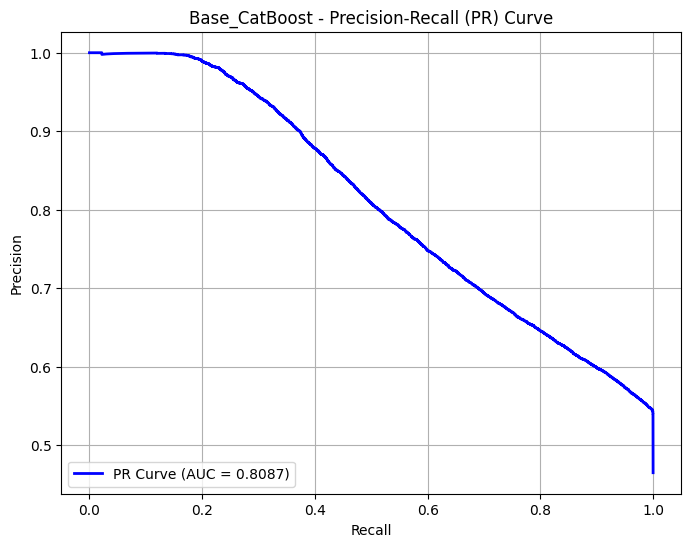

[I 2025-03-04 12:45:17,800] A new study created in memory with name: no-name-e0c7c624-dba9-4b84-96b4-dfb0ce01029e
[I 2025-03-04 12:45:27,645] Trial 0 finished with value: 0.8155778170116454 and parameters: {'iterations': 450, 'learning_rate': 0.12569611273133413, 'depth': 4, 'l2_leaf_reg': 4.979227229509891, 'border_count': 37, 'random_strength': 1.1632738147884947, 'bagging_temperature': 0.06601064225574707, 'subsample': 0.9847094989501269}. Best is trial 0 with value: 0.8155778170116454.


0:	learn: 0.6342637	test: 0.6363844	best: 0.6363844 (0)	total: 92.8ms	remaining: 41.7s
1:	learn: 0.5899527	test: 0.5935727	best: 0.5935727 (1)	total: 168ms	remaining: 37.6s
2:	learn: 0.5685188	test: 0.5754758	best: 0.5754758 (2)	total: 244ms	remaining: 36.3s
3:	learn: 0.5566381	test: 0.5654654	best: 0.5654654 (3)	total: 312ms	remaining: 34.8s
4:	learn: 0.5431252	test: 0.5520711	best: 0.5520711 (4)	total: 392ms	remaining: 34.9s
5:	learn: 0.5363262	test: 0.5461484	best: 0.5461484 (5)	total: 466ms	remaining: 34.5s
6:	learn: 0.5302308	test: 0.5411854	best: 0.5411854 (6)	total: 548ms	remaining: 34.7s
7:	learn: 0.5264274	test: 0.5380250	best: 0.5380250 (7)	total: 619ms	remaining: 34.2s
8:	learn: 0.5185235	test: 0.5304231	best: 0.5304231 (8)	total: 690ms	remaining: 33.8s
9:	learn: 0.5152902	test: 0.5280390	best: 0.5280390 (9)	total: 758ms	remaining: 33.4s
10:	learn: 0.5115472	test: 0.5249496	best: 0.5249496 (10)	total: 843ms	remaining: 33.6s
11:	learn: 0.5101110	test: 0.5235488	best: 0.523548

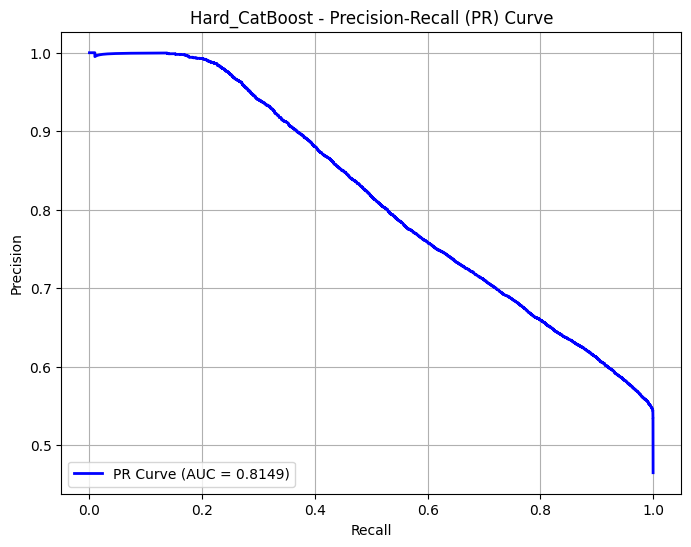

Fitting 2 folds for each of 24 candidates, totalling 48 fits


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in D

LightGBM - Accuracy: 0.7078, ROC AUC: 0.8126
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 50}


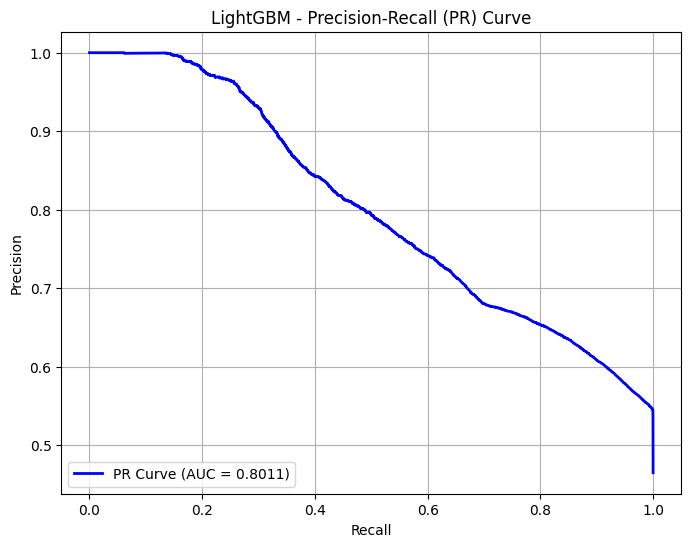

[LightGBM] [Warning] lambda_l1 is set=1.9083619572656634, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9083619572656634
[LightGBM] [Warning] lambda_l2 is set=0.2053485631304136, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2053485631304136
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=2.7155782318558304, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7155782318558304
[LightGBM] [Warning] lambda_l2 is set=3.537837749717136, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.537837749717136
 10%|█         | 1/10 [00:00<00:04,  2.07trial/s, best loss: -0.8166869935357883]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.400272371188164, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.400272371188164
[LightGBM] [Warning] lambda_l2 is set=0.07084279272947525, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07084279272947525
 20%|██        | 2/10 [00:02<00:08,  1.12s/trial, best loss: -0.8248916692205173]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=1.0080781457395531, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0080781457395531
[LightGBM] [Warning] lambda_l2 is set=0.5677954628451104, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5677954628451104
 40%|████      | 4/10 [00:05<00:07,  1.32s/trial, best loss: -0.8270067920547927]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.22226090641024, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.22226090641024
[LightGBM] [Warning] lambda_l2 is set=1.4591106402203424, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4591106402203424
 40%|████      | 4/10 [00:05<00:07,  1.32s/trial, best loss: -0.8270067920547927]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=1.4771719010794915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4771719010794915
[LightGBM] [Warning] lambda_l2 is set=3.289749874439795, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.289749874439795
 50%|█████     | 5/10 [00:06<00:05,  1.11s/trial, best loss: -0.8270067920547927]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=1.7860255144170811, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7860255144170811
[LightGBM] [Warning] lambda_l2 is set=2.8141670094281954, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8141670094281954
 60%|██████    | 6/10 [00:07<00:04,  1.01s/trial, best loss: -0.8270067920547927]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.360877711920612, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.360877711920612
[LightGBM] [Warning] lambda_l2 is set=1.150875182331272, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.150875182331272
 80%|████████  | 8/10 [00:07<00:01,  1.36trial/s, best loss: -0.8270067920547927]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=4.478251234860611, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.478251234860611
[LightGBM] [Warning] lambda_l2 is set=0.2272997196705806, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2272997196705806
 80%|████████  | 8/10 [00:08<00:01,  1.36trial/s, best loss: -0.8270067920547927]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] lambda_l1 is set=3.9787452616922927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9787452616922927
[LightGBM] [Warning] lambda_l2 is set=4.41180062106309, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.41180062106309
 90%|█████████ | 9/10 [00:08<00:00,  1.53trial/s, best loss: -0.8270067920547927]

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')

c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



100%|██████████| 10/10 [00:09<00:00,  1.03trial/s, best loss: -0.8283180755607187]
[LightGBM] [Warning] lambda_l1 is set=3.9787452616922927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9787452616922927
[LightGBM] [Warning] lambda_l2 is set=4.41180062106309, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.41180062106309


c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


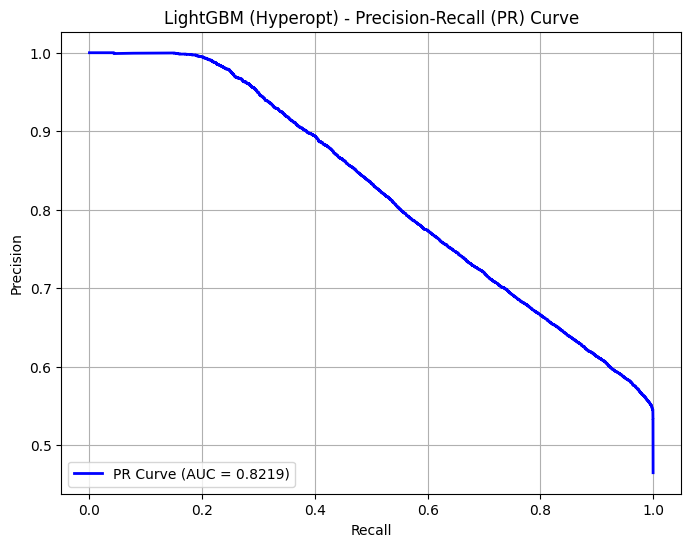

XGBoost - Accuracy: 0.7255, ROC AUC: 0.8210


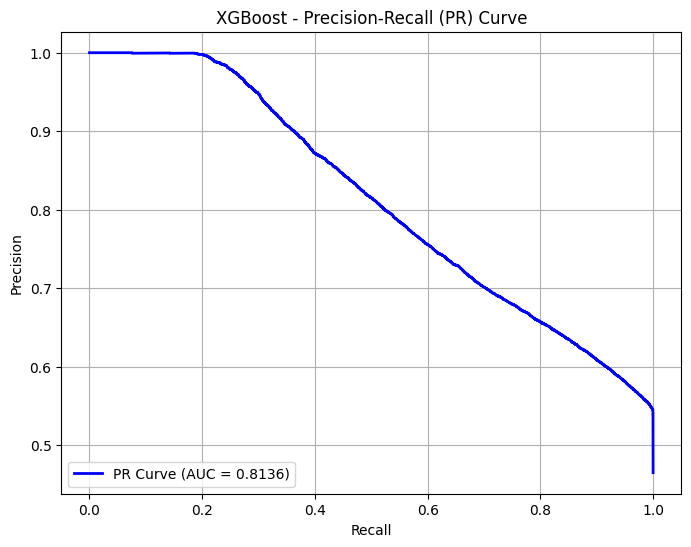

 10%|█         | 1/10 [00:04<00:39,  4.39s/trial, best loss: -0.8203694827917982]


KeyboardInterrupt: 

In [85]:
# Получение уникальных датасетов
DS_list = df['N'].unique()
print(DS_list)

top_ds = DS_list # Берем только первые 
print(top_ds)

for ds in top_ds:
    df_ds = df[df['N'] == ds]
    
    # Допустим, предполагается, что name_TT одинаковый для всех строк внутри ds
    tt_name = df_ds['name_TT'].iloc[0]
    print(f"Выбран ТТ: {tt_name}")

    # Подготовка данных
    features = [
        'courier_type', 'status', 'pools_count',
        'order_count', 'shift_num', 'delivery_time_shift', 'count_pool_shift', 'time_shift',
        'returned_time', 'count_shift', 'order_counts', 'order_weight',
        'hour', 'minute', 'weekday']

    # Разделение данных
    X_train, X_test, X_val, y_train, y_test, y_val, categorical_features, scale_pos_weight = first_step_for_models(df_ds, features)

    # Начальный пустой DataFrame для результатов
    results_df = None

    # Оценка различных моделей
    print(f"Оценка моделей для DS: {ds}")

    results_df = base_LogReg(X_train, X_test, y_train, y_test, categorical_features, results_df)
    results_df = base_DecisionTree(X_train, X_test, y_train, y_test, categorical_features, results_df)
    results_df = base_LogReg_pipeline(X_train, X_test, y_train, y_test, categorical_features, results_df)
    results_df = base_DecisionTree_pipeline(X_train, X_test, y_train, y_test, categorical_features, results_df)

    # CatBoost
    results_df = base_CatBoost(X_train, X_test, y_train, y_test, categorical_features,scale_pos_weight, results_df)
    results_df = hard_CatBoost(X_train, X_test, y_train, y_test, categorical_features, scale_pos_weight, X_val, y_val, results_df)

    # LightGBM
    results_df = base_LGBM(X_train, X_test, y_train, y_test, categorical_features, results_df)
    results_df = hard_LGBM(X_train, X_test, y_train, y_test, categorical_features, scale_pos_weight, X_val, y_val, results_df)

    # XGBoost
    results_df = base_XGBoost(X_train, X_test, y_train, y_test, categorical_features,scale_pos_weight,results_df)
    results_df = hard_XGBoost(X_train, X_test, y_train, y_test, categorical_features, scale_pos_weight, X_val, y_val, results_df)


    # Вывод лучших моделей по метрике ROC AUC
    print(results_df)
    best_model = results_df.sort_values("PR AUC", ascending=False).iloc[0]
    print(f"Лучшая модель: {best_model['Model']} с PR AUC = {best_model['PR AUC']:.4f}")
    display(best_model)

    # Создаем final_result_df при первом проходе
    if 'final_result_df' not in globals():
        final_result_df = pd.DataFrame(
            columns=[
                "DS Number",
                "DS Name",
                "Best Model",
                "Accuracy",
                "ROC AUC",
                "Test Precision",
                "Recall",
                "F1",
                "PR AUC",
            ]
        )
    
    # Формируем новую строку с результатами
    row_dict = {
        "DS Number": ds,
        "DS Name": tt_name,  # Или df_ds['name_TT'].unique()[0]
        "Best Model": best_model["Model"],
        "Accuracy": best_model["Accuracy"],
        "ROC AUC": best_model["ROC AUC"],
        "Test Precision": best_model["Test Precision"],
        "Recall": best_model["Recall"],
        "F1": best_model["F1"],
        "PR AUC": best_model["PR AUC"]
    }
    final_result_df = pd.concat([final_result_df, pd.DataFrame([row_dict])], ignore_index=True)

# Сохранение итогового датафрейма
final_result_df.to_excel('../data/result_classification_with_features.xlsx', index=False)


In [86]:
# Сохранение итогового датафрейма
final_result_df.to_excel('../data/result_classification_with_features.xlsx', index=False)

#### ЧТО МОЖНО УЛУЧШИТЬ?

Добавить удаленией дней, когда у большинства курьеров status - не работает, так как это может означать, что дс еще в полной мере не начала работать и тогда прогноз будет не совсем корректен



In [ ]:


# # Подготовка данных
# features = [ 'courier_type', 'status', 'pools_count',
#     'order_count', 'shift_num', 'delivery_time_shift', 'count_pool_shift', 'time_shift',
#     'returned_time', 'count_shift', 'order_counts', 'order_weight',
#     'hour', 'minute', 'weekday', 'time_since_last_tt',
#     'orders_last_hour', 'pools_last_hour'
# ]


# # Разделение данных на тренировочную, тестовую и валидационную выборки
# X_train, X_test, X_val, y_train, y_test, y_val, categorical_features, scale_pos_weight = first_step_for_models(df, features)

# # Начальный пустой DataFrame для результатов
# results_df = None

# # Оценка различных моделей
# print(f"Оценка моделей для DS: {ds}")


# results_df = base_LogReg(X_train, X_test, y_train, y_test, results_df)
# results_df = base_DecisionTree(X_train, X_test, y_train, y_test, results_df)

# # CatBoost
# results_df = base_CatBoost(X_train, X_test, y_train, y_test, categorical_features, results_df)
# results_df = hard_CatBoost(X_train, X_test, y_train, y_test, categorical_features, scale_pos_weight, X_val, y_val, results_df)

# # LightGBM
# results_df = base_LGBM(X_train, X_test, y_train, y_test, categorical_features, results_df)
# results_df = hard_LGBM(X_train, X_test, y_train, y_test, categorical_features, scale_pos_weight, X_val, y_val, results_df)

# # XGBoost
# results_df = base_XGBoost(X_train, X_test, y_train, y_test, categorical_features, results_df)
# results_df = hard_XGBoost(X_train, X_test, y_train, y_test, categorical_features, scale_pos_weight, X_val, y_val, results_df)


# # Вывод лучших моделей по метрике ROC AUC
# print(results_df)
# best_model = results_df.sort_values("ROC AUC", ascending=False).iloc[0]
# print(f"Лучшая модель: {best_model['Model']} с ROC AUC = {best_model['ROC AUC']:.4f}")

# # Отображение лучшей модели для текущего датасета
# display(best_model)
